# Taxi demand prediction in New York City


In [1]:
#Importing Libraries
# pip3 install graphviz
#pip3 install dask
#pip3 install toolz
#pip3 install cloudpickle
# https://www.youtube.com/watch?v=ieW3G7ZzRZ0
# https://github.com/dask/dask-tutorial
# please do go through this python notebook: https://github.com/dask/dask-tutorial/blob/master/07_dataframe.ipynb
#import dask.dataframe as dd#similar to pandas

import pandas as pd#pandas to create small dataframes 

# pip3 install foliun
# if this doesnt work refere install_folium.JPG in drive
import folium #open street map

# unix time: https://www.unixtimestamp.com/
import datetime #Convert to unix time

import time #Convert to unix time

# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays

# matplotlib: used to plot graphs
import matplotlib
# matplotlib.use('nbagg') : matplotlib uses this protocall which makes plots more user intractive like zoom in and zoom out
matplotlib.use('nbagg')
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  

# this lib is used while we calculate the stight line distance between two (lat,lon) pairs in miles
import gpxpy.geo #Get the haversine distance

from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os

# download migwin: https://mingw-w64.org/doku.php/download/mingw-builds
# install it in your system and keep the path, migw_path ='installed path'
#mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-5.3.0-posix-seh-rt_v4-rev0\\mingw64\\bin'
#os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

# to install xgboost: pip3 install xgboost
# if it didnt happen check install_xgboost.JPG
import xgboost as xgb

# to install sklearn: pip install -U scikit-learn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

# Data Information

<p>
Ge the data from : http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml (2016 data)
The data used in the attached datasets were collected and provided to the NYC Taxi and Limousine Commission (TLC) 
</p>

## Information on taxis:

<h5> Yellow Taxi: Yellow Medallion Taxicabs</h5>
<p> These are the famous NYC yellow taxis that provide transportation exclusively through street-hails. The number of taxicabs is limited by a finite number of medallions issued by the TLC. You access this mode of transportation by standing in the street and hailing an available taxi with your hand. The pickups are not pre-arranged.</p>

<h5> For Hire Vehicles (FHVs) </h5>
<p> FHV transportation is accessed by a pre-arrangement with a dispatcher or limo company. These FHVs are not permitted to pick up passengers via street hails, as those rides are not considered pre-arranged. </p>

<h5> Green Taxi: Street Hail Livery (SHL) </h5>
<p>  The SHL program will allow livery vehicle owners to license and outfit their vehicles with green borough taxi branding, meters, credit card machines, and ultimately the right to accept street hails in addition to pre-arranged rides. </p>
<p> Credits: Quora</p>

<h5>Footnote:</h5>
In this notebook we are considering only the yellow taxis for the time period between Jan - Mar 2015 & Jan - Mar 2016

# Data Collection
We Have collected all yellow taxi trips data from jan-2015 to dec-2016(Will be using only 2015 data)
<table>
<tr>
<th> file name </th>
<th> file name size</th>
<th> number of records </th>
<th> number of features </th>
</tr>
<tr>
<td> yellow_tripdata_2016-01 </td>
<td> 1. 59G </td>
<td> 10906858 </td>
<td> 19 </td>
</tr>

<tr>
<td> yellow_tripdata_2016-02 </td>
<td> 1. 66G </td>
<td> 11382049 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2016-03 </td>
<td> 1. 78G </td>
<td> 12210952 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2016-04 </td>
<td> 1. 74G </td>
<td> 11934338 </td>
<td> 19 </td>
</tr>

<tr>
<td> yellow_tripdata_2016-05 </td>
<td> 1. 73G </td>
<td> 11836853 </td>
<td> 19 </td>
</tr>

<tr>
<td> yellow_tripdata_2016-06 </td>
<td> 1. 62G </td>
<td> 11135470 </td>
<td> 19 </td>
</tr>

<tr>
<td> yellow_tripdata_2016-07 </td>
<td> 884Mb </td>
<td> 10294080 </td>
<td> 17 </td>
</tr>

<tr>
<td> yellow_tripdata_2016-08 </td>
<td> 854Mb </td>
<td> 9942263 </td>
<td> 17 </td>
</tr>

<tr>
<td> yellow_tripdata_2016-09 </td>
<td> 870Mb </td>
<td> 10116018 </td>
<td> 17 </td>
</tr>

<tr>
<td> yellow_tripdata_2016-10 </td>
<td> 933Mb </td>
<td> 10854626 </td>
<td> 17 </td>
</tr>
<tr>
<td> yellow_tripdata_2016-11 </td>
<td> 868Mb </td>
<td> 10102128 </td>
<td> 17 </td>
</tr>
<tr>
<td> yellow_tripdata_2016-12 </td>
<td> 897Mb </td>
<td> 10449408 </td>
<td> 17 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-01 </td>
<td> 1.84Gb </td>
<td> 12748986 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-02 </td>
<td> 1.81Gb </td>
<td> 12450521 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-03 </td>
<td> 1.94Gb </td>
<td> 13351609 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-04 </td>
<td> 1.90Gb </td>
<td> 13071789 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-05 </td>
<td> 1.91Gb </td>
<td> 13158262 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-06 </td>
<td> 1.79Gb </td>
<td> 12324935 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-07 </td>
<td> 1.68Gb </td>
<td> 11562783 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-08 </td>
<td> 1.62Gb </td>
<td> 11130304 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-09 </td>
<td> 1.63Gb </td>
<td> 11225063 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-10 </td>
<td> 1.79Gb </td>
<td> 12315488 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-11 </td>
<td> 1.65Gb </td>
<td> 11312676 </td>
<td> 19 </td>
</tr>
<tr>
<td> yellow_tripdata_2015-12 </td>
<td> 1.67Gb </td>
<td> 11460573 </td>
<td> 19 </td>
</tr>
</table>

In [2]:
#Looking at the features
month = pd.read_csv('yellow_tripdata_2015-01.csv')
print(month.columns)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RateCodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount'],
      dtype='object')


## Features in the dataset:
<table border="1">
	<tr>
		<th>Field Name</th>
		<th>Description</th>
	</tr>
	<tr>
		<td>VendorID</td>
		<td>
		A code indicating the TPEP provider that provided the record.
		<ol>
			<li>Creative Mobile Technologies</li>
			<li>VeriFone Inc.</li>
		</ol>
		</td>
	</tr>
	<tr>
		<td>tpep_pickup_datetime</td>
		<td>The date and time when the meter was engaged.</td>
	</tr>
	<tr>
		<td>tpep_dropoff_datetime</td>
		<td>The date and time when the meter was disengaged.</td>
	</tr>
	<tr>
		<td>Passenger_count</td>
		<td>The number of passengers in the vehicle. This is a driver-entered value.</td>
	</tr>
	<tr>
		<td>Trip_distance</td>
		<td>The elapsed trip distance in miles reported by the taximeter.</td>
	</tr>
	<tr>
		<td>Pickup_longitude</td>
		<td>Longitude where the meter was engaged.</td>
	</tr>
	<tr>
		<td>Pickup_latitude</td>
		<td>Latitude where the meter was engaged.</td>
	</tr>
	<tr>
		<td>RateCodeID</td>
		<td>The final rate code in effect at the end of the trip.
		<ol>
			<li> Standard rate </li>
			<li> JFK </li>
			<li> Newark </li>
			<li> Nassau or Westchester</li>
			<li> Negotiated fare </li>
			<li> Group ride</li>
		</ol>
		</td>
	</tr>
	<tr>
		<td>Store_and_fwd_flag</td>
		<td>This flag indicates whether the trip record was held in vehicle memory before sending to the vendor,<br\> aka “store and forward,” because the vehicle did not have a connection to the server.
		<br\>Y= store and forward trip
		<br\>N= not a store and forward trip
		</td>
	</tr>

	<tr>
		<td>Dropoff_longitude</td>
		<td>Longitude where the meter was disengaged.</td>
	</tr>
	<tr>
		<td>Dropoff_ latitude</td>
		<td>Latitude where the meter was disengaged.</td>
	</tr>
	<tr>
		<td>Payment_type</td>
		<td>A numeric code signifying how the passenger paid for the trip.
		<ol>
			<li> Credit card </li>
			<li> Cash </li>
			<li> No charge </li>
			<li> Dispute</li>
			<li> Unknown </li>
			<li> Voided trip</li>
		</ol>
		</td>
	</tr>
	<tr>
		<td>Fare_amount</td>
		<td>The time-and-distance fare calculated by the meter.</td>
	</tr>
	<tr>
		<td>Extra</td>
		<td>Miscellaneous extras and surcharges. Currently, this only includes. the $0.50 and $1 rush hour and overnight charges.</td>
	</tr>
	<tr>
		<td>MTA_tax</td>
		<td>0.50 MTA tax that is automatically triggered based on the metered rate in use.</td>
	</tr>
	<tr>
		<td>Improvement_surcharge</td>
		<td>0.30 improvement surcharge assessed trips at the flag drop. the improvement surcharge began being levied in 2015.</td>
	</tr>
	<tr>
		<td>Tip_amount</td>
		<td>Tip amount – This field is automatically populated for credit card tips.Cash tips are not included.</td>
	</tr>
	<tr>
		<td>Tolls_amount</td>
		<td>Total amount of all tolls paid in trip.</td>
	</tr>
	<tr>
		<td>Total_amount</td>
		<td>The total amount charged to passengers. Does not include cash tips.</td>
	</tr>
</table>

# ML Problem Formulation
<p><b> Time-series forecasting and Regression</b></p>
<br>
-<i> To find number of pickups, given location cordinates(latitude and longitude) and time, in the query reigion and surrounding regions.</i>
<p> 
To solve the above we would be using data collected in Jan - Mar 2015 to predict the pickups in Jan - Mar 2016.
</p>

# Performance metrics
1. Mean Absolute percentage error.
2. Mean Squared error.

## Data Cleaning

In this section we will be doing univariate analysis and removing outlier/illegitimate values which may be caused due to some error

In [3]:
#table below shows few datapoints along with all our features
month.head(5)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2015-01-15 19:05:39   2015-01-15 19:23:42                1   
1         1  2015-01-10 20:33:38   2015-01-10 20:53:28                1   
2         1  2015-01-10 20:33:38   2015-01-10 20:43:41                1   
3         1  2015-01-10 20:33:39   2015-01-10 20:35:31                1   
4         1  2015-01-10 20:33:39   2015-01-10 20:52:58                1   

   trip_distance  pickup_longitude  pickup_latitude  RateCodeID  \
0           1.59        -73.993896        40.750111           1   
1           3.30        -74.001648        40.724243           1   
2           1.80        -73.963341        40.802788           1   
3           0.50        -74.009087        40.713818           1   
4           3.00        -73.971176        40.762428           1   

  store_and_fwd_flag  dropoff_longitude  dropoff_latitude  payment_type  \
0                  N         -73.974785         40.750618             1   
1                  N         -73.994415         40.759109             1   
2                  N         -73.951820         40.824413             2   
3                  N         -74.004326         40.719986             2   
4                  N         -74.004181         40.742653             2   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0         12.0    1.0      0.5        3.25           0.0   
1         14.5    0.5      0.5        2.00           0.0   
2          9.5    0.5      0.5        0.00           0.0   
3          3.5    0.5      0.5        0.00           0.0   
4         15.0    0.5      0.5        0.00           0.0   

   improvement_surcharge  total_amount  
0                    0.3         17.05  
1                    0.3         17.80  
2                    0.3         10.80  
3                    0.3          4.80  
4                    0.3         16.30

### 1. Pickup Latitude and Pickup Longitude

It is inferred from the source https://www.flickr.com/places/info/2459115 that New York is bounded by the location cordinates(lat,long) - (40.5774, -74.15) & (40.9176,-73.7004) so hence any cordinates not within these cordinates are not considered by us as we are only concerned with pickups which originate within New York.

In [4]:
# Plotting pickup cordinates which are outside the bounding box of New-York 
# we will collect all the points outside the bounding box of newyork city to outlier_locations
outlier_locations = month[((month.pickup_longitude <= -74.15) | (month.pickup_latitude <= 40.5774)| \
                   (month.pickup_longitude >= -73.7004) | (month.pickup_latitude >= 40.9176))]

# creating a map with the a base location
# read more about the folium here: http://folium.readthedocs.io/en/latest/quickstart.html

# note: you dont need to remember any of these, you dont need indeepth knowledge on these maps and plots

map_osm = folium.Map(location=[40.734695, -73.990372], tiles='Stamen Toner')

# we will spot only first 100 outliers on the map, plotting all the outliers will take more time
sample_locations = outlier_locations.head(10000)
for i,j in sample_locations.iterrows():
    if int(j['pickup_latitude']) != 0:
        folium.Marker(list((j['pickup_latitude'],j['pickup_longitude']))).add_to(map_osm)
map_osm

### 2. Dropoff Latitude & Dropoff Longitude

It is inferred from the source https://www.flickr.com/places/info/2459115 that New York is bounded by the location cordinates(lat,long) - (40.5774, -74.15) & (40.9176,-73.7004) so hence any cordinates not within these cordinates are not considered by us as we are only concerned with dropoffs which are within New York.

In [5]:
# Plotting dropoff cordinates which are outside the bounding box of New-York 
# we will collect all the points outside the bounding box of newyork city to outlier_locations
outlier_locations = month[((month.dropoff_longitude <= -74.15) | (month.dropoff_latitude <= 40.5774)| \
                   (month.dropoff_longitude >= -73.7004) | (month.dropoff_latitude >= 40.9176))]

# creating a map with the a base location
# read more about the folium here: http://folium.readthedocs.io/en/latest/quickstart.html

# note: you dont need to remember any of these, you dont need indeepth knowledge on these maps and plots

map_osm = folium.Map(location=[40.734695, -73.990372], tiles='Stamen Toner')

# we will spot only first 100 outliers on the map, plotting all the outliers will take more time
sample_locations = outlier_locations.head(10000)
for i,j in sample_locations.iterrows():
    if int(j['pickup_latitude']) != 0:
        folium.Marker(list((j['dropoff_latitude'],j['dropoff_longitude']))).add_to(map_osm)
map_osm

<b>Observation:-</b> The observations here are similar to those obtained while analysing pickup latitude and longitude

### 3. Trip Durations:

<p style="font-size:18px">According to NYC Taxi &amp; Limousine Commision Regulations <b style= "color:blue">the maximum allowed trip duration in a 24 hour interval is 12 hours.</b> </p>

In [6]:
os.environ['TZ'] = 'EST'
time.tzset()
time.tzname 

('EST', 'EST')

In [7]:
#The timestamps are converted to unix so as to get duration(trip-time) & speed also pickup-times in unix are used while binning 

# in out data we have time in the formate "YYYY-MM-DD HH:MM:SS" we convert thiss sting to python time formate and then into unix time stamp
# https://stackoverflow.com/a/27914405
def convert_to_unix(s):
    return time.mktime(datetime.datetime.strptime(s, "%Y-%m-%d %H:%M:%S").timetuple())



# we return a data frame which contains the columns
# 1.'passenger_count' : self explanatory
# 2.'trip_distance' : self explanatory
# 3.'pickup_longitude' : self explanatory
# 4.'pickup_latitude' : self explanatory
# 5.'dropoff_longitude' : self explanatory
# 6.'dropoff_latitude' : self explanatory
# 7.'total_amount' : total fair that was paid
# 8.'trip_times' : duration of each trip
# 9.'pickup_times : pickup time converted into unix time 
# 10.'Speed' : velocity of each trip
def return_with_trip_times(month):
    duration = month[['tpep_pickup_datetime','tpep_dropoff_datetime']]#.compute()
    #pickups and dropoffs to unix time
    duration_pickup = [convert_to_unix(x) for x in duration['tpep_pickup_datetime'].values]
    duration_drop = [convert_to_unix(x) for x in duration['tpep_dropoff_datetime'].values]
    #calculate duration of trips
    durations = (np.array(duration_drop) - np.array(duration_pickup))/float(60)

    #append durations of trips and speed in miles/hr to a new dataframe
    new_frame = month[['passenger_count','trip_distance','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','total_amount']]#.compute()
    
    new_frame['trip_times'] = durations
    new_frame['pickup_times'] = duration_pickup
    new_frame['Speed'] = 60*(new_frame['trip_distance']/new_frame['trip_times'])
    
    return new_frame

# print(frame_with_durations.head())
#  passenger_count	trip_distance	pickup_longitude	pickup_latitude	dropoff_longitude	dropoff_latitude	total_amount	trip_times	pickup_times	Speed
#   1                  1.59	      -73.993896        	40.750111    	-73.974785      	40.750618           	17.05   	 18.050000	1.421329e+09	5.285319
#   1               	3.30    	-74.001648      	40.724243   	-73.994415      	40.759109           	17.80   	19.833333	1.420902e+09	9.983193
#   1               	1.80     	-73.963341      	40.802788     	-73.951820      	40.824413           	10.80   	10.050000	1.420902e+09	10.746269
#   1               	0.50    	-74.009087      	40.713818    	-74.004326       	40.719986           	4.80    	1.866667	1.420902e+09	16.071429
#   1               	3.00    	-73.971176      	40.762428    	-74.004181      	40.742653           	16.30   	19.316667	1.420902e+09	9.318378
frame_with_durations = return_with_trip_times(month)

In [8]:
frame_with_durations.head()

passenger_count  trip_distance  pickup_longitude  pickup_latitude  \
0                1           1.59        -73.993896        40.750111   
1                1           3.30        -74.001648        40.724243   
2                1           1.80        -73.963341        40.802788   
3                1           0.50        -74.009087        40.713818   
4                1           3.00        -73.971176        40.762428   

   dropoff_longitude  dropoff_latitude  total_amount  trip_times  \
0         -73.974785         40.750618         17.05   18.050000   
1         -73.994415         40.759109         17.80   19.833333   
2         -73.951820         40.824413         10.80   10.050000   
3         -74.004326         40.719986          4.80    1.866667   
4         -74.004181         40.742653         16.30   19.316667   

   pickup_times      Speed  
0  1.421367e+09   5.285319  
1  1.420940e+09   9.983193  
2  1.420940e+09  10.746269  
3  1.420940e+09  16.071429  
4  1.420940e+09   9.318378

<IPython.core.display.Javascript object>


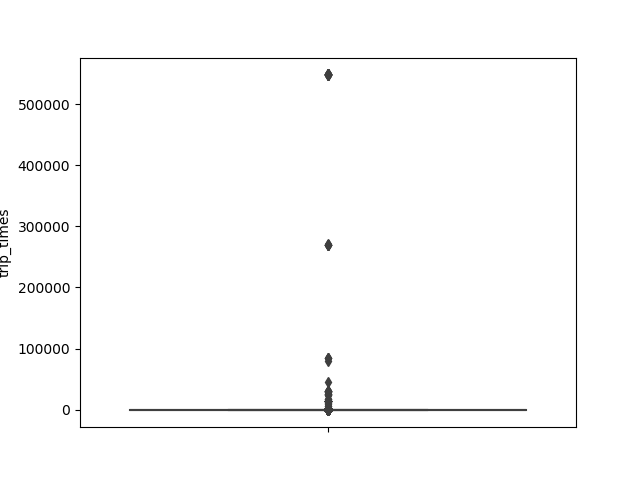

In [9]:
# the skewed box plot shows us the presence of outliers 
sns.boxplot(y="trip_times", data =frame_with_durations)
plt.show()

In [10]:
#calculating 0-100th percentile to find a the correct percentile value for removal of outliers
var =frame_with_durations["trip_times"].values
var = np.sort(var,axis = None)
for i in range(0,100,10):
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1]) 

0 percentile value is -1211.0166666666667
10 percentile value is 3.8333333333333335
20 percentile value is 5.383333333333334
30 percentile value is 6.816666666666666
40 percentile value is 8.3
50 percentile value is 9.95
60 percentile value is 11.866666666666667
70 percentile value is 14.283333333333333
80 percentile value is 17.633333333333333
90 percentile value is 23.45
100 percentile value is  548555.6333333333


In [11]:
#looking further from the 99th percecntile
for i in range(90,100):
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print ("100 percentile value is ",var[-1])

90 percentile value is 23.45
91 percentile value is 24.35
92 percentile value is 25.383333333333333
93 percentile value is 26.55
94 percentile value is 27.933333333333334
95 percentile value is 29.583333333333332
96 percentile value is 31.683333333333334
97 percentile value is 34.46666666666667
98 percentile value is 38.71666666666667
99 percentile value is 46.75
100 percentile value is  548555.6333333333


In [12]:
### No of points that are trip time lessthan 1
len(var[var<1])

103426

In [9]:
#removing data based on our analysis and TLC regulations
frame_with_durations_modified=frame_with_durations[(frame_with_durations.trip_times>1) & (frame_with_durations.trip_times<720)]

<IPython.core.display.Javascript object>


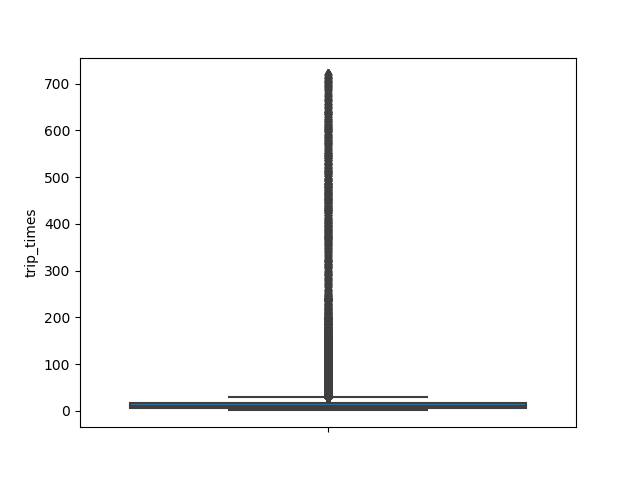

In [14]:
#box-plot after removal of outliers
sns.boxplot(y="trip_times", data =frame_with_durations_modified)
plt.show()

<IPython.core.display.Javascript object>


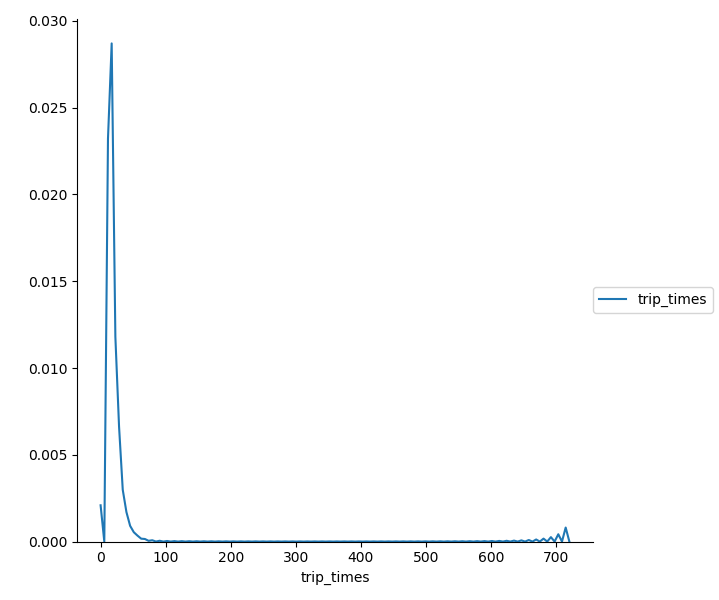

In [15]:
#pdf of trip-times after removing the outliers
sns.FacetGrid(frame_with_durations_modified,size=6) \
      .map(sns.kdeplot,"trip_times") \
      .add_legend();
plt.show();

In [10]:
#converting the values to log-values to chec for log-normal
import math
frame_with_durations_modified['log_times']=[math.log(i) for i in frame_with_durations_modified['trip_times'].values]

<IPython.core.display.Javascript object>


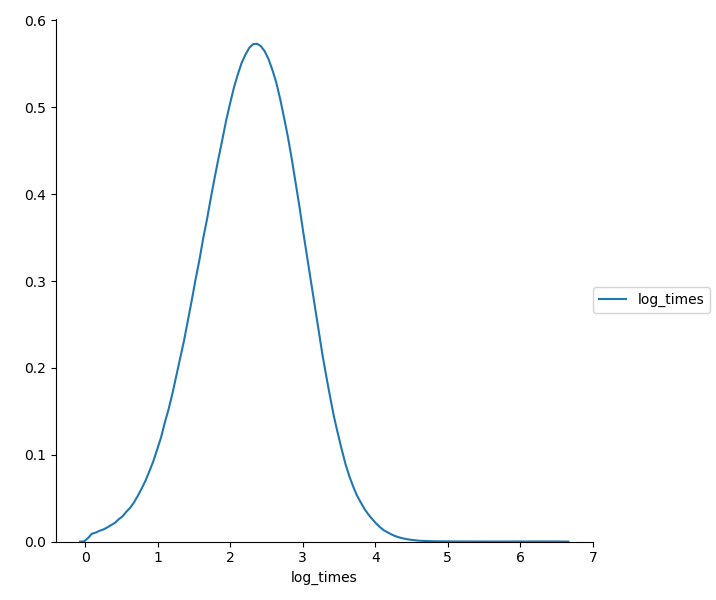

In [17]:
#pdf of log-values
sns.FacetGrid(frame_with_durations_modified,size=6) \
      .map(sns.kdeplot,"log_times") \
      .add_legend();
plt.show();

<IPython.core.display.Javascript object>


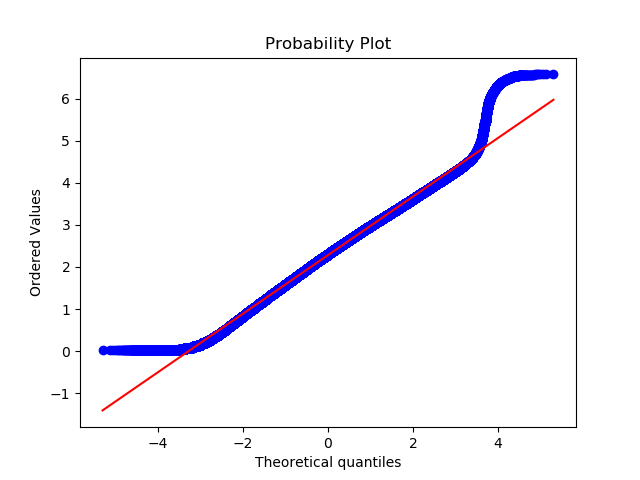

In [18]:
#Q-Q plot for checking if trip-times is log-normal
import scipy
scipy.stats.probplot(frame_with_durations_modified['log_times'].values, plot=plt)
plt.show()

### 4. Speed

<IPython.core.display.Javascript object>


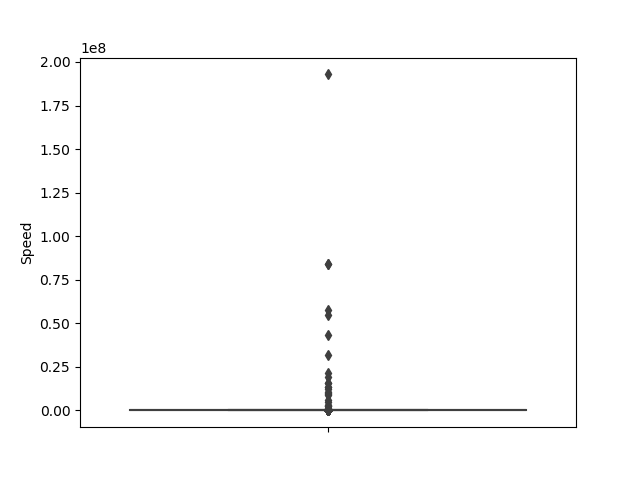

In [20]:
# check for any outliers in the data after trip duration outliers removed
# box-plot for speeds with outliers
frame_with_durations_modified['Speed'] = 60*(frame_with_durations_modified['trip_distance']/frame_with_durations_modified['trip_times'])
sns.boxplot(y="Speed", data =frame_with_durations_modified)
plt.show()

In [21]:
#calculating speed values at each percntile 0,10,20,30,40,50,60,70,80,90,100 
var =frame_with_durations_modified["Speed"].values
var = np.sort(var,axis = None)
for i in range(0,100,10):
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

0 percentile value is 0.0
10 percentile value is 6.409495548961425
20 percentile value is 7.80952380952381
30 percentile value is 8.929133858267717
40 percentile value is 9.98019801980198
50 percentile value is 11.06865671641791
60 percentile value is 12.286689419795222
70 percentile value is 13.796407185628745
80 percentile value is 15.963224893917962
90 percentile value is 20.186915887850468
100 percentile value is  192857142.85714284


In [22]:
#calculating speed values at each percntile 90,91,92,93,94,95,96,97,98,99,100
for i in range(90,100):
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

90 percentile value is 20.186915887850468
91 percentile value is 20.91645569620253
92 percentile value is 21.752988047808763
93 percentile value is 22.721893491124263
94 percentile value is 23.844155844155843
95 percentile value is 25.182552504038775
96 percentile value is 26.80851063829787
97 percentile value is 28.84304932735426
98 percentile value is 31.591128254580514
99 percentile value is 35.7513566847558
100 percentile value is  192857142.85714284


In [23]:
#calculating speed values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(0.0, 1.0, 0.1):
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 35.7513566847558
99.1 percentile value is 36.31084727468969
99.2 percentile value is 36.91470054446461
99.3 percentile value is 37.588235294117645
99.4 percentile value is 38.33035714285714
99.5 percentile value is 39.17580340264651
99.6 percentile value is 40.15384615384615
99.7 percentile value is 41.338301043219076
99.8 percentile value is 42.86631016042781
99.9 percentile value is 45.3107822410148
100 percentile value is  192857142.85714284


In [12]:
#removing further outliers based on the 99.9th percentile value
frame_with_durations_modified=frame_with_durations[(frame_with_durations.Speed>0) & (frame_with_durations.Speed<45.31)]

In [13]:
#avg.speed of cabs in New-York
frame_with_durations_modified.Speed.mean()

12.45017399603333

<b style='font-size:16px'>The avg speed in Newyork speed is 12.45miles/hr, so a cab driver can travel <font color='blue'> 2 miles per 10min on avg.</font> </b>

### 4. Trip Distance

<IPython.core.display.Javascript object>


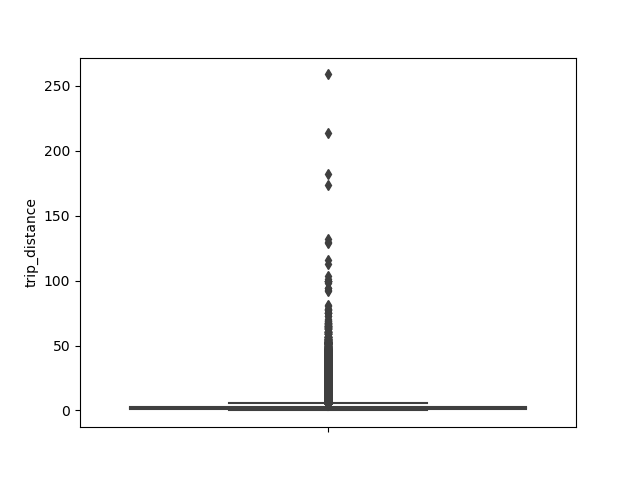

In [26]:
# up to now we have removed the outliers based on trip durations and cab speeds
# lets try if there are any outliers in trip distances
# box-plot showing outliers in trip-distance values
sns.boxplot(y="trip_distance", data =frame_with_durations_modified)
plt.show()

In [27]:
#calculating trip distance values at each percntile 0,10,20,30,40,50,60,70,80,90,100 
var =frame_with_durations_modified["trip_distance"].values
var = np.sort(var,axis = None)
for i in range(0,100,10):
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

0 percentile value is 0.01
10 percentile value is 0.66
20 percentile value is 0.9
30 percentile value is 1.1
40 percentile value is 1.39
50 percentile value is 1.69
60 percentile value is 2.07
70 percentile value is 2.6
80 percentile value is 3.6
90 percentile value is 5.97
100 percentile value is  258.9


In [28]:
#calculating trip distance values at each percntile 90,91,92,93,94,95,96,97,98,99,100
for i in range(90,100):
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

90 percentile value is 5.97
91 percentile value is 6.45
92 percentile value is 7.07
93 percentile value is 7.85
94 percentile value is 8.72
95 percentile value is 9.6
96 percentile value is 10.6
97 percentile value is 12.1
98 percentile value is 16.03
99 percentile value is 18.17
100 percentile value is  258.9


In [29]:
#calculating trip distance values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(0.0, 1.0, 0.1):
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 18.17
99.1 percentile value is 18.37
99.2 percentile value is 18.6
99.3 percentile value is 18.83
99.4 percentile value is 19.13
99.5 percentile value is 19.5
99.6 percentile value is 19.96
99.7 percentile value is 20.5
99.8 percentile value is 21.22
99.9 percentile value is 22.57
100 percentile value is  258.9


In [14]:
#removing further outliers based on the 99.9th percentile value
frame_with_durations_modified=frame_with_durations[(frame_with_durations.trip_distance>0) & (frame_with_durations.trip_distance<23)]

<IPython.core.display.Javascript object>


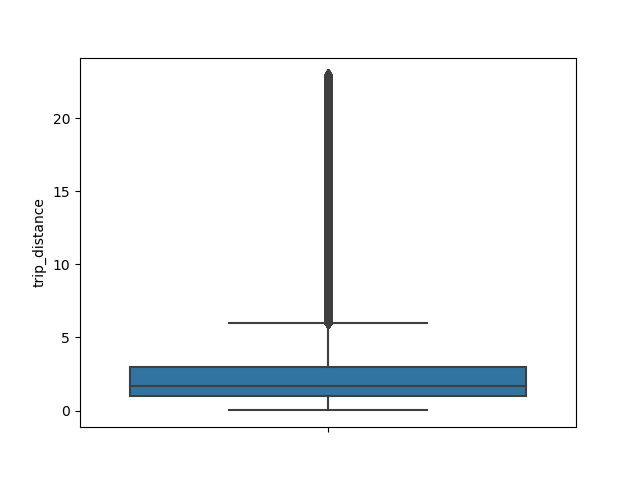

In [31]:
#box-plot after removal of outliers
sns.boxplot(y="trip_distance", data = frame_with_durations_modified)
plt.show()

### 5. Total Fare

<IPython.core.display.Javascript object>


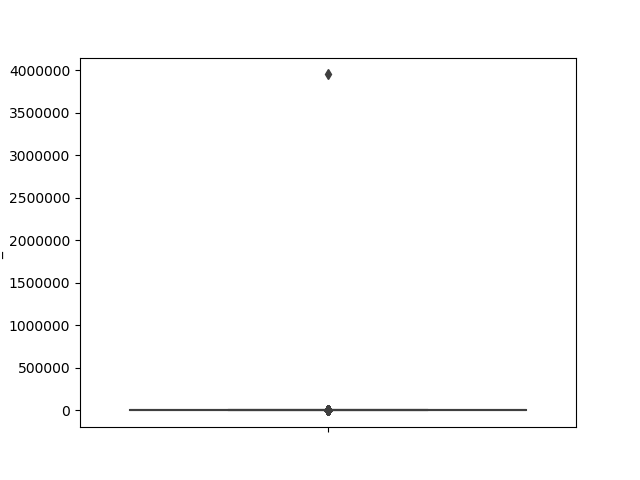

In [32]:
# up to now we have removed the outliers based on trip durations, cab speeds, and trip distances
# lets try if there are any outliers in based on the total_amount
# box-plot showing outliers in fare
sns.boxplot(y="total_amount", data =frame_with_durations_modified)
plt.show()

In [33]:
#calculating total fare amount values at each percntile 0,10,20,30,40,50,60,70,80,90,100 
var = frame_with_durations_modified["total_amount"].values
var = np.sort(var,axis = None)
for i in range(0,100,10):
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

0 percentile value is -242.55
10 percentile value is 6.3
20 percentile value is 7.8
30 percentile value is 8.8
40 percentile value is 9.8
50 percentile value is 11.16
60 percentile value is 12.8
70 percentile value is 14.8
80 percentile value is 18.3
90 percentile value is 25.8
100 percentile value is  3950611.6


In [34]:
#calculating total fare amount values at each percntile 90,91,92,93,94,95,96,97,98,99,100
for i in range(90,100):
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

90 percentile value is 25.8
91 percentile value is 27.3
92 percentile value is 29.3
93 percentile value is 31.8
94 percentile value is 34.8
95 percentile value is 38.53
96 percentile value is 42.6
97 percentile value is 48.13
98 percentile value is 58.13
99 percentile value is 66.13
100 percentile value is  3950611.6


In [35]:
#calculating total fare amount values at each percntile 99.0,99.1,99.2,99.3,99.4,99.5,99.6,99.7,99.8,99.9,100
for i in np.arange(0.0, 1.0, 0.1):
    print("{} percentile value is {}".format(99+i,var[int(len(var)*(float(99+i)/100))]))
print("100 percentile value is ",var[-1])

99.0 percentile value is 66.13
99.1 percentile value is 68.13
99.2 percentile value is 69.6
99.3 percentile value is 69.6
99.4 percentile value is 69.73
99.5 percentile value is 69.75
99.6 percentile value is 69.76
99.7 percentile value is 72.58
99.8 percentile value is 75.35
99.9 percentile value is 88.28
100 percentile value is  3950611.6


<b>Observation:-</b> As even the 99.9th percentile value doesnt look like an outlier,as there is not much difference between the 99.8th percentile and 99.9th percentile, we move on to do graphical analyis

<IPython.core.display.Javascript object>


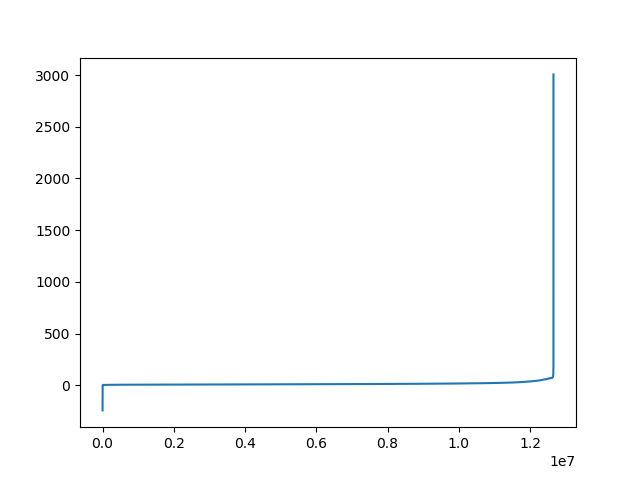

In [36]:
#below plot shows us the fare values(sorted) to find a sharp increase to remove those values as outliers
# plot the fare amount excluding last two values in sorted data
plt.plot(var[:-2])
plt.show()

<IPython.core.display.Javascript object>


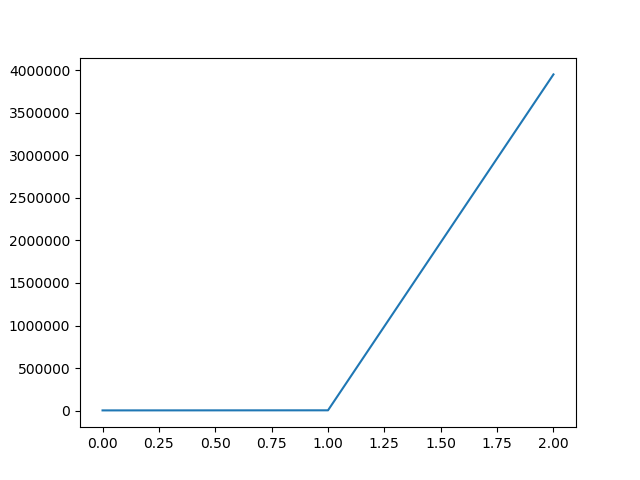

In [37]:
# a very sharp increase in fare values can be seen 
# plotting last three total fare values, and we can observe there is share increase in the values
plt.plot(var[-3:])
plt.show()

<IPython.core.display.Javascript object>


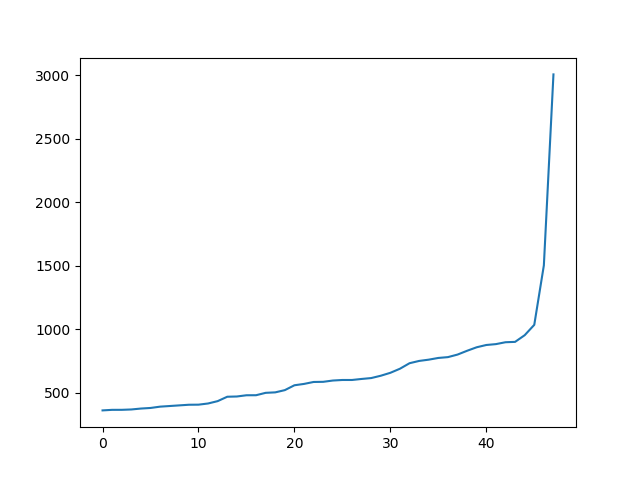

In [38]:
#now looking at values not including the last two points we again find a drastic increase at around 1000 fare value
# we plot last 50 values excluding last two values
plt.plot(var[-50:-2])
plt.show()

## Remove all outliers/erronous points.

In [15]:
#removing all outliers based on our univariate analysis above
def remove_outliers(new_frame):

    
    a = new_frame.shape[0]
    print ("Number of pickup records = ",a)
    temp_frame = new_frame[((new_frame.dropoff_longitude >= -74.15) & (new_frame.dropoff_longitude <= -73.7004) &\
                       (new_frame.dropoff_latitude >= 40.5774) & (new_frame.dropoff_latitude <= 40.9176)) & \
                       ((new_frame.pickup_longitude >= -74.15) & (new_frame.pickup_latitude >= 40.5774)& \
                       (new_frame.pickup_longitude <= -73.7004) & (new_frame.pickup_latitude <= 40.9176))]
    b = temp_frame.shape[0]
    print ("Number of outlier coordinates lying outside NY boundaries:",(a-b))

    
    temp_frame = new_frame[(new_frame.trip_times > 0) & (new_frame.trip_times < 720)]
    c = temp_frame.shape[0]
    print ("Number of outliers from trip times analysis:",(a-c))
    
    
    temp_frame = new_frame[(new_frame.trip_distance > 0) & (new_frame.trip_distance < 23)]
    d = temp_frame.shape[0]
    print ("Number of outliers from trip distance analysis:",(a-d))
    
    temp_frame = new_frame[(new_frame.Speed <= 65) & (new_frame.Speed >= 0)]
    e = temp_frame.shape[0]
    print ("Number of outliers from speed analysis:",(a-e))
    
    temp_frame = new_frame[(new_frame.total_amount <1000) & (new_frame.total_amount >0)]
    f = temp_frame.shape[0]
    print ("Number of outliers from fare analysis:",(a-f))
    
    
    new_frame = new_frame[((new_frame.dropoff_longitude >= -74.15) & (new_frame.dropoff_longitude <= -73.7004) &\
                       (new_frame.dropoff_latitude >= 40.5774) & (new_frame.dropoff_latitude <= 40.9176)) & \
                       ((new_frame.pickup_longitude >= -74.15) & (new_frame.pickup_latitude >= 40.5774)& \
                       (new_frame.pickup_longitude <= -73.7004) & (new_frame.pickup_latitude <= 40.9176))]
    
    new_frame = new_frame[(new_frame.trip_times > 0) & (new_frame.trip_times < 720)]
    new_frame = new_frame[(new_frame.trip_distance > 0) & (new_frame.trip_distance < 23)]
    new_frame = new_frame[(new_frame.Speed < 45.31) & (new_frame.Speed > 0)]
    new_frame = new_frame[(new_frame.total_amount <1000) & (new_frame.total_amount >0)]
    
    print ("Total outliers removed",a - new_frame.shape[0])
    print ("---")
    return new_frame

In [16]:
print ("Removing outliers in the month of Jan-2015")
print ("----")
frame_with_durations_outliers_removed = remove_outliers(frame_with_durations)
print("fraction of data points that remain after removing outliers", float(len(frame_with_durations_outliers_removed))/len(frame_with_durations))

Removing outliers in the month of Jan-2015
----
Number of pickup records =  12748986
Number of outlier coordinates lying outside NY boundaries: 293919
Number of outliers from trip times analysis: 23889
Number of outliers from trip distance analysis: 92597
Number of outliers from speed analysis: 24473
Number of outliers from fare analysis: 5275
Total outliers removed 377910
---
fraction of data points that remain after removing outliers 0.9703576425607495


# Data-preperation
## Clustering/Segmentation

In [43]:
#trying different cluster sizes to choose the right K in K-means
coords = frame_with_durations_outliers_removed[['pickup_latitude', 'pickup_longitude']].values
neighbours=[]

def find_min_distance(cluster_centers, cluster_len):
    nice_points = 0
    wrong_points = 0
    less2 = []
    more2 = []
    min_dist=1000
    for i in range(0, cluster_len):
        nice_points = 0
        wrong_points = 0
        for j in range(0, cluster_len):
            if j!=i:
                distance = gpxpy.geo.haversine_distance(cluster_centers[i][0], cluster_centers[i][1],cluster_centers[j][0], cluster_centers[j][1])
                min_dist = min(min_dist,distance/(1.60934*1000))
                if (distance/(1.60934*1000)) <= 2:
                    nice_points +=1
                else:
                    wrong_points += 1
        less2.append(nice_points)
        more2.append(wrong_points)
    neighbours.append(less2)
    print ("On choosing a cluster size of ",cluster_len,"\nAvg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2):", np.ceil(sum(less2)/len(less2)), "\nAvg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2):", np.ceil(sum(more2)/len(more2)),"\nMin inter-cluster distance = ",min_dist,"\n---")

def find_clusters(increment):
    kmeans = MiniBatchKMeans(n_clusters=increment, batch_size=10000,random_state=42).fit(coords)
    frame_with_durations_outliers_removed['pickup_cluster'] = kmeans.predict(frame_with_durations_outliers_removed[['pickup_latitude', 'pickup_longitude']])
    cluster_centers = kmeans.cluster_centers_
    cluster_len = len(cluster_centers)
    return cluster_centers, cluster_len

# we need to choose number of clusters so that, there are more number of cluster regions 
#that are close to any cluster center
# and make sure that the minimum inter cluster should not be very less
for increment in range(10, 100, 10):
    cluster_centers, cluster_len = find_clusters(increment)
    find_min_distance(cluster_centers, cluster_len)            

On choosing a cluster size of  10 
Avg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2): 2.0 
Avg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2): 8.0 
Min inter-cluster distance =  1.0933194607372518 
---
On choosing a cluster size of  20 
Avg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2): 4.0 
Avg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2): 16.0 
Min inter-cluster distance =  0.7123318236197774 
---
On choosing a cluster size of  30 
Avg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2): 8.0 
Avg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2): 22.0 
Min inter-cluster distance =  0.5179286172497254 
---
On choosing a cluster size of  40 
Avg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2): 9.0 
Avg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2): 31.0 
Min inter-cluster distance 

### Inference:
- The main objective was to find a optimal min. distance(Which roughly estimates to the radius of a cluster) between the clusters which we got was 40

In [18]:
# if check for the 50 clusters you can observe that there are two clusters with only 0.3 miles apart from each other
# so we choose 40 clusters for solve the further problem

# Getting 40 clusters using the kmeans 
kmeans = MiniBatchKMeans(n_clusters=40, batch_size=10000,random_state=0).fit(coords)
frame_with_durations_outliers_removed['pickup_cluster'] = kmeans.predict(frame_with_durations_outliers_removed[['pickup_latitude', 'pickup_longitude']])

### Plotting the cluster centers:

In [20]:
# Plotting the cluster centers on OSM
cluster_centers = kmeans.cluster_centers_
cluster_len = len(cluster_centers)
map_osm = folium.Map(location=[40.734695, -73.990372], tiles='Stamen Toner')
for i in range(cluster_len):
    folium.Marker(list((cluster_centers[i][0],cluster_centers[i][1])), popup=(str(cluster_centers[i][0])+str(cluster_centers[i][1]))).add_to(map_osm)
map_osm

### Plotting the clusters:

<IPython.core.display.Javascript object>


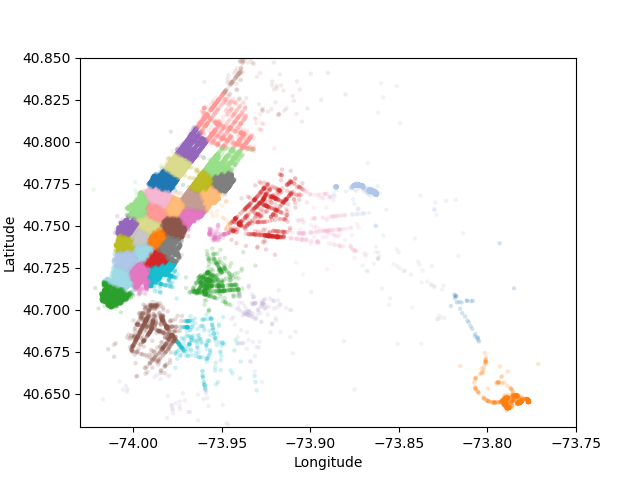

In [20]:
#Visualising the clusters on a map
def plot_clusters(frame):
    city_long_border = (-74.03, -73.75)
    city_lat_border = (40.63, 40.85)
    fig, ax = plt.subplots(ncols=1, nrows=1)
    ax.scatter(frame.pickup_longitude.values[:100000], frame.pickup_latitude.values[:100000], s=10, lw=0,
               c=frame.pickup_cluster.values[:100000], cmap='tab20', alpha=0.2)
    ax.set_xlim(city_long_border)
    ax.set_ylim(city_lat_border)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    plt.show()

plot_clusters(frame_with_durations_outliers_removed)

## Time-binning

In [19]:
#Refer:https://www.unixtimestamp.com/
# 1420070400 : 2015-01-01 00:00:00 
# 1422748800 : 2015-02-01 00:00:00 
# 1425168000 : 2015-03-01 00:00:00
# 1427846400 : 2015-04-01 00:00:00 
# 1430438400 : 2015-05-01 00:00:00 
# 1433116800 : 2015-06-01 00:00:00

# 1451606400 : 2016-01-01 00:00:00 
# 1454284800 : 2016-02-01 00:00:00 
# 1456790400 : 2016-03-01 00:00:00
# 1459468800 : 2016-04-01 00:00:00 
# 1462060800 : 2016-05-01 00:00:00 
# 1464739200 : 2016-06-01 00:00:00

def add_pickup_bins(frame,month,year):
    unix_pickup_times=[i for i in frame['pickup_times'].values]
    unix_times = np.array([[1420070400,1422748800,1425168000,1427846400,1430438400,1433116800],\
                    [1451606400,1454284800,1456790400,1459468800,1462060800,1464739200]])
    unix_times = list(unix_times + 18000)
    
    start_pickup_unix=unix_times[year-2015][month-1]
    # https://www.timeanddate.com/time/zones/est
    # (int((i-start_pickup_unix)/600)+33) : our unix time is in gmt to we are converting it to est
    tenminutewise_binned_unix_pickup_times=[(int((i-start_pickup_unix)/600)) for i in unix_pickup_times]
    frame['pickup_bins'] = np.array(tenminutewise_binned_unix_pickup_times)
    return frame

In [20]:
# clustering, making pickup bins and grouping by pickup cluster and pickup bins
frame_with_durations_outliers_removed['pickup_cluster'] = kmeans.predict(frame_with_durations_outliers_removed[['pickup_latitude', 'pickup_longitude']])
jan_2015_frame = add_pickup_bins(frame_with_durations_outliers_removed,1,2015)
jan_2015_groupby = jan_2015_frame[['pickup_cluster','pickup_bins','trip_distance']].groupby(['pickup_cluster','pickup_bins']).count()

In [21]:
# we add two more columns 'pickup_cluster'(to which cluster it belogns to) 
# and 'pickup_bins' (to which 10min intravel the trip belongs to)
jan_2015_frame.head()

passenger_count  trip_distance  pickup_longitude  pickup_latitude  \
0                1           1.59        -73.993896        40.750111   
1                1           3.30        -74.001648        40.724243   
2                1           1.80        -73.963341        40.802788   
3                1           0.50        -74.009087        40.713818   
4                1           3.00        -73.971176        40.762428   

   dropoff_longitude  dropoff_latitude  total_amount  trip_times  \
0         -73.974785         40.750618         17.05   18.050000   
1         -73.994415         40.759109         17.80   19.833333   
2         -73.951820         40.824413         10.80   10.050000   
3         -74.004326         40.719986          4.80    1.866667   
4         -74.004181         40.742653         16.30   19.316667   

   pickup_times      Speed  pickup_cluster  pickup_bins  
0  1.421367e+09   5.285319              34         2130  
1  1.420940e+09   9.983193               2         1419  
2  1.420940e+09  10.746269              16         1419  
3  1.420940e+09  16.071429              38         1419  
4  1.420940e+09   9.318378              22         1419

In [22]:
# hear the trip_distance represents the number of pickups that are happend in that particular 10min intravel
# this data frame has two indices
# primary index: pickup_cluster (cluster number)
# secondary index : pickup_bins (we devid whole months time into 10min intravels 24*31*60/10 =4464bins)
jan_2015_groupby.head()

trip_distance
pickup_cluster pickup_bins               
0              0                      104
               1                      200
               2                      208
               3                      141
               4                      155

In [27]:
# upto now we cleaned data and prepared data for the month 2015,

# now do the same operations for months Jan, Feb, March of 2016
# 1. get the dataframe which inlcudes only required colums
# 2. adding trip times, speed, unix time stamp of pickup_time
# 4. remove the outliers based on trip_times, speed, trip_duration, total_amount
# 5. add pickup_cluster to each data point
# 6. add pickup_bin (index of 10min intravel to which that trip belongs to)
# 7. group by data, based on 'pickup_cluster' and 'pickuo_bin'

# Data Preparation for the months of Jan,Feb and March 2016
def datapreparation(month,kmeans,month_no,year_no):
    
    print ("Return with trip times..")

    frame_with_durations = return_with_trip_times(month)
    
    print ("Remove outliers..")
    frame_with_durations_outliers_removed = remove_outliers(frame_with_durations)
    
    print ("Estimating clusters..")
    frame_with_durations_outliers_removed['pickup_cluster'] = kmeans.predict(frame_with_durations_outliers_removed[['pickup_latitude', 'pickup_longitude']])
    #frame_with_durations_outliers_removed_2016['pickup_cluster'] = kmeans.predict(frame_with_durations_outliers_removed_2016[['pickup_latitude', 'pickup_longitude']])

    print ("Final groupbying..")
    final_updated_frame = add_pickup_bins(frame_with_durations_outliers_removed,month_no,year_no)
    final_groupby_frame = final_updated_frame[['pickup_cluster','pickup_bins','trip_distance']].groupby(['pickup_cluster','pickup_bins']).count()
    
    return final_updated_frame,final_groupby_frame
    
month_jan_2016 = pd.read_csv('yellow_tripdata_2016-01.csv')
month_feb_2016 = pd.read_csv('yellow_tripdata_2016-02.csv')
month_mar_2016 = pd.read_csv('yellow_tripdata_2016-03.csv')

jan_2016_frame,jan_2016_groupby = datapreparation(month_jan_2016,kmeans,1,2016)
feb_2016_frame,feb_2016_groupby = datapreparation(month_feb_2016,kmeans,2,2016)
mar_2016_frame,mar_2016_groupby = datapreparation(month_mar_2016,kmeans,3,2016)

Return with trip times..
Remove outliers..
Number of pickup records =  10906858
Number of outlier coordinates lying outside NY boundaries: 214677
Number of outliers from trip times analysis: 27190
Number of outliers from trip distance analysis: 79742
Number of outliers from speed analysis: 21047
Number of outliers from fare analysis: 4991
Total outliers removed 297784
---
Estimating clusters..
Final groupbying..
Return with trip times..
Remove outliers..
Number of pickup records =  11382049
Number of outlier coordinates lying outside NY boundaries: 223161
Number of outliers from trip times analysis: 27670
Number of outliers from trip distance analysis: 81902
Number of outliers from speed analysis: 22437
Number of outliers from fare analysis: 5476
Total outliers removed 308177
---
Estimating clusters..
Final groupbying..
Return with trip times..
Remove outliers..
Number of pickup records =  12210952
Number of outlier coordinates lying outside NY boundaries: 232444
Number of outliers fro

## Smoothing

In [26]:
# Gets the unique bins where pickup values are present for each each reigion

# for each cluster region we will collect all the indices of 10min intravels in which the pickups are happened
# we got an observation that there are some pickpbins that doesnt have any pickups
def return_unq_pickup_bins(frame):
    values = []
    for i in range(0,40):
        new = frame[frame['pickup_cluster'] == i]
        list_unq = list(set(new['pickup_bins']))
        list_unq.sort()
        values.append(list_unq)
    return values

In [27]:
# for every month we get all indices of 10min intravels in which atleast one pickup got happened

#jan
jan_2015_unique = return_unq_pickup_bins(jan_2015_frame)
jan_2016_unique = return_unq_pickup_bins(jan_2016_frame)

#feb
feb_2016_unique = return_unq_pickup_bins(feb_2016_frame)

#march
mar_2016_unique = return_unq_pickup_bins(mar_2016_frame)

In [28]:
# for each cluster number of 10min intravels with 0 pickups
for i in range(40):
    print("for the ",i,"th cluster number of 10min intavels with zero pickups: ",4464 - len(set(jan_2015_unique[i])))
    print('-'*60)

for the  0 th cluster number of 10min intavels with zero pickups:  40
------------------------------------------------------------
for the  1 th cluster number of 10min intavels with zero pickups:  1985
------------------------------------------------------------
for the  2 th cluster number of 10min intavels with zero pickups:  29
------------------------------------------------------------
for the  3 th cluster number of 10min intavels with zero pickups:  354
------------------------------------------------------------
for the  4 th cluster number of 10min intavels with zero pickups:  37
------------------------------------------------------------
for the  5 th cluster number of 10min intavels with zero pickups:  153
------------------------------------------------------------
for the  6 th cluster number of 10min intavels with zero pickups:  34
------------------------------------------------------------
for the  7 th cluster number of 10min intavels with zero pickups:  34
---------

there are two ways to fill up these values
<ul>
<li> Fill the missing value with 0's</li>
<li> Fill the missing values with the avg values
<ul>
<li> Case 1:(values missing at the start)  <br>Ex1: \_ \_ \_ x =>ceil(x/4), ceil(x/4), ceil(x/4), ceil(x/4) <br> Ex2: \_ \_ x => ceil(x/3), ceil(x/3), ceil(x/3) </li>
<li> Case 2:(values missing in middle) <br>Ex1: x \_ \_ y => ceil((x+y)/4), ceil((x+y)/4), ceil((x+y)/4), ceil((x+y)/4) <br> Ex2: x \_ \_ \_ y => ceil((x+y)/5), ceil((x+y)/5), ceil((x+y)/5), ceil((x+y)/5), ceil((x+y)/5) </li>
<li> Case 3:(values missing at the end)  <br>Ex1: x \_ \_ \_  => ceil(x/4), ceil(x/4), ceil(x/4), ceil(x/4) <br> Ex2: x \_  => ceil(x/2), ceil(x/2) </li>
</ul>
</li>
</ul>

In [29]:
# Fills a value of zero for every bin where no pickup data is present 
# the count_values: number pickps that are happened in each region for each 10min intravel
# there wont be any value if there are no picksups.
# values: number of unique bins

# for every 10min intravel(pickup_bin) we will check it is there in our unique bin,
# if it is there we will add the count_values[index] to smoothed data
# if not we add 0 to the smoothed data
# we finally return smoothed data
def fill_missing(count_values,values):
    smoothed_regions=[]
    ind=0
    for r in range(0,40):
        smoothed_bins=[]
        for i in range(4464):
            if i in values[r]:
                smoothed_bins.append(count_values[ind])
                ind+=1
            else:
                smoothed_bins.append(0)
        smoothed_regions.extend(smoothed_bins)
    return smoothed_regions

In [30]:
# Fills a value of zero for every bin where no pickup data is present 
# the count_values: number pickps that are happened in each region for each 10min intravel
# there wont be any value if there are no picksups.
# values: number of unique bins

# for every 10min intravel(pickup_bin) we will check it is there in our unique bin,
# if it is there we will add the count_values[index] to smoothed data
# if not we add smoothed data (which is calculated based on the methods that are discussed in the above markdown cell)
# we finally return smoothed data
def smoothing(count_values,values):
    smoothed_regions=[] # stores list of final smoothed values of each reigion
    ind=0
    repeat=0 
    smoothed_value=0
    for r in range(0,40):
        smoothed_bins=[] #stores the final smoothed values
        repeat=0
        for i in range(4464):
            if repeat!=0: # prevents iteration for a value which is already visited/resolved
                repeat-=1
                continue
            if i in values[r]: #checks if the pickup-bin exists 
                smoothed_bins.append(count_values[ind]) # appends the value of the pickup bin if it exists
            else:
                if i!=0:
                    right_hand_limit=0
                    for j in range(i,4464):
                        if  j not in values[r]: #searches for the left-limit or the pickup-bin value which has a pickup value
                            continue
                        else:
                            right_hand_limit=j
                            break
                    if right_hand_limit==0:
                    #Case 1: When we have the last/last few values are found to be missing,hence we have no right-limit here
                        smoothed_value=count_values[ind-1]*1.0/((4463-i)+2)*1.0                               
                        for j in range(i,4464):                              
                            smoothed_bins.append(math.ceil(smoothed_value))
                        smoothed_bins[i-1] = math.ceil(smoothed_value)
                        repeat=(4463-i)
                        ind-=1
                    else:
                    #Case 2: When we have the missing values between two known values
                        smoothed_value=(count_values[ind-1]+count_values[ind])*1.0/((right_hand_limit-i)+2)*1.0             
                        for j in range(i,right_hand_limit+1):
                            smoothed_bins.append(math.ceil(smoothed_value))
                        smoothed_bins[i-1] = math.ceil(smoothed_value)
                        repeat=(right_hand_limit-i)
                else:
                    #Case 3: When we have the first/first few values are found to be missing,hence we have no left-limit here
                    right_hand_limit=0
                    for j in range(i,4464):
                        if  j not in values[r]:
                            continue
                        else:
                            right_hand_limit=j
                            break
                    smoothed_value=count_values[ind]*1.0/((right_hand_limit-i)+1)*1.0
                    for j in range(i,right_hand_limit+1):
                            smoothed_bins.append(math.ceil(smoothed_value))
                    repeat=(right_hand_limit-i)
            ind+=1
        smoothed_regions.extend(smoothed_bins)
    return smoothed_regions


In [31]:
#Filling Missing values of Jan-2015 with 0
# here in jan_2015_groupby dataframe the trip_distance represents the number of pickups that are happened
jan_2015_fill = fill_missing(jan_2015_groupby['trip_distance'].values,jan_2015_unique)

#Smoothing Missing values of Jan-2015
jan_2015_smooth = smoothing(jan_2015_groupby['trip_distance'].values,jan_2015_unique)

In [32]:
# number of 10min indices for jan 2015= 24*31*60/10 = 4464
# number of 10min indices for jan 2016 = 24*31*60/10 = 4464
# number of 10min indices for feb 2016 = 24*29*60/10 = 4176
# number of 10min indices for march 2016 = 24*30*60/10 = 4320
# for each cluster we will have 4464 values, therefore 40*4464 = 178560 (length of the jan_2015_fill)
print("number of 10min intravels among all the clusters ",len(jan_2015_fill))

number of 10min intravels among all the clusters  178560


<IPython.core.display.Javascript object>


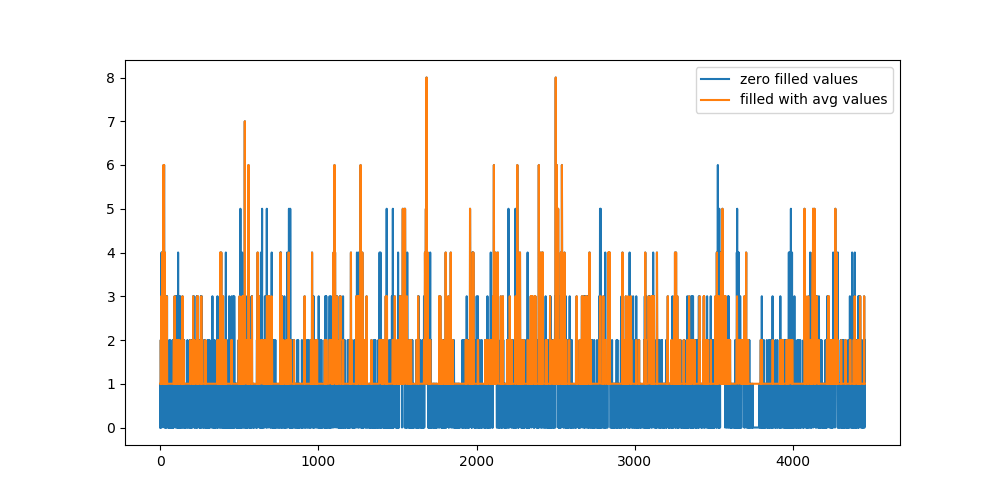

In [33]:
# Smoothing vs Filling
# sample plot that shows two variations of filling missing values
# we have taken the number of pickups for cluster region 2
plt.figure(figsize=(10,5))
plt.plot(jan_2015_fill[4464:8920], label="zero filled values")
plt.plot(jan_2015_smooth[4464:8920], label="filled with avg values")
plt.legend()
plt.show()

In [34]:
# why we choose, these methods and which method is used for which data?

# Ans: consider we have data of some month in 2015 jan 1st, 10 _ _ _ 20, i.e there are 10 pickups that are happened in 1st 
# 10st 10min intravel, 0 pickups happened in 2nd 10mins intravel, 0 pickups happened in 3rd 10min intravel 
# and 20 pickups happened in 4th 10min intravel.
# in fill_missing method we replace these values like 10, 0, 0, 20
# where as in smoothing method we replace these values as 6,6,6,6,6, if you can check the number of pickups 
# that are happened in the first 40min are same in both cases, but if you can observe that we looking at the future values 
# wheen you are using smoothing we are looking at the future number of pickups which might cause a data leakage.

# so we use smoothing for jan 2015th data since it acts as our training data
# and we use simple fill_misssing method for 2016th data.

In [35]:
# Jan-2015 data is smoothed, Jan,Feb & March 2016 data missing values are filled with zero
jan_2015_smooth = smoothing(jan_2015_groupby['trip_distance'].values,jan_2015_unique)
jan_2016_smooth = fill_missing(jan_2016_groupby['trip_distance'].values,jan_2016_unique)
feb_2016_smooth = fill_missing(feb_2016_groupby['trip_distance'].values,feb_2016_unique)
mar_2016_smooth = fill_missing(mar_2016_groupby['trip_distance'].values,mar_2016_unique)

# Making list of all the values of pickup data in every bin for a period of 3 months and storing them region-wise 
regions_cum = []

# a =[1,2,3]
# b = [2,3,4]
# a+b = [1, 2, 3, 2, 3, 4]

# number of 10min indices for jan 2015= 24*31*60/10 = 4464
# number of 10min indices for jan 2016 = 24*31*60/10 = 4464
# number of 10min indices for feb 2016 = 24*29*60/10 = 4176
# number of 10min indices for march 2016 = 24*31*60/10 = 4464
# regions_cum: it will contain 40 lists, each list will contain 4464+4176+4464 values which represents the number of pickups 
# that are happened for three months in 2016 data

for i in range(0,40):
    regions_cum.append(jan_2016_smooth[4464*i:4464*(i+1)]+feb_2016_smooth[4176*i:4176*(i+1)]+mar_2016_smooth[4464*i:4464*(i+1)])

# print(len(regions_cum))
# 40
# print(len(regions_cum[0]))
# 13104

## Time series and Fourier Transforms

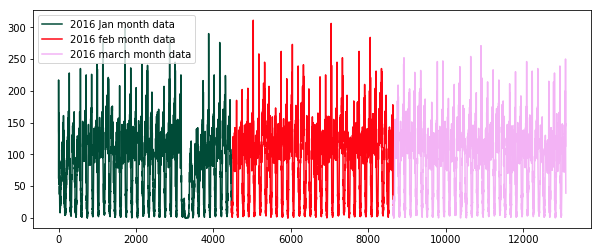

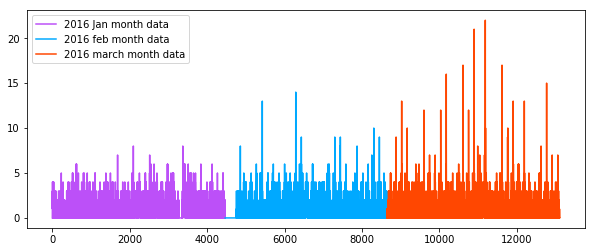

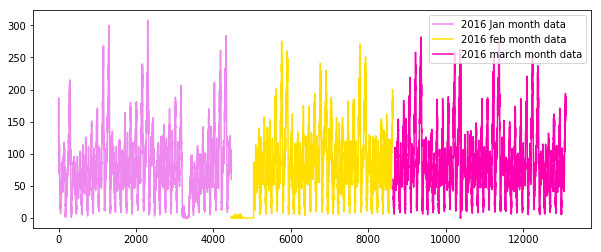

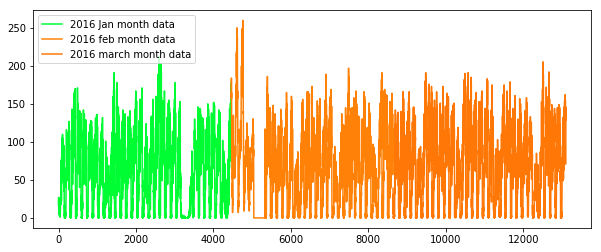

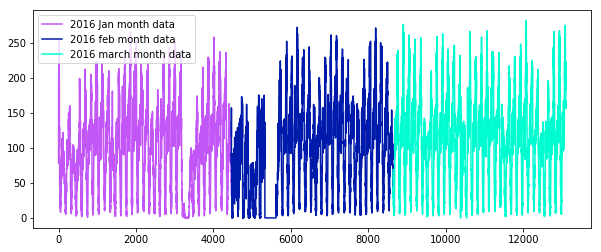

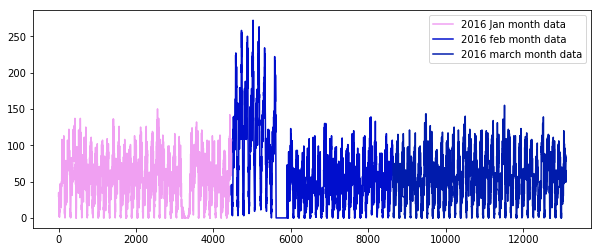

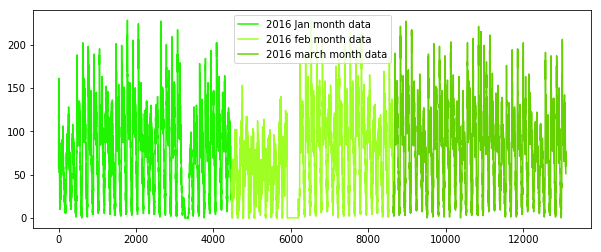

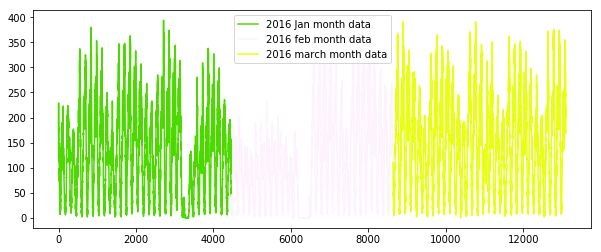

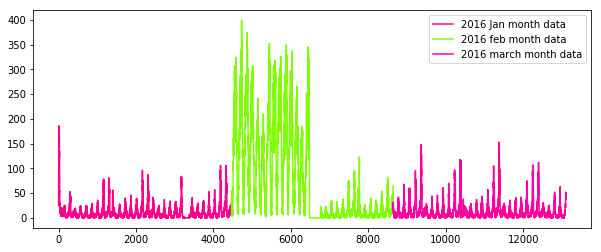

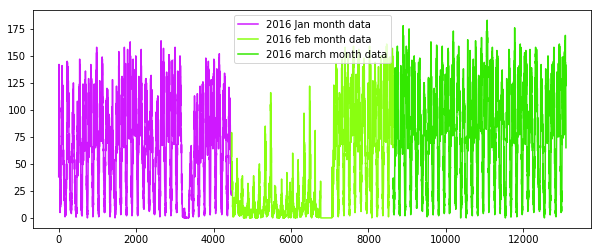

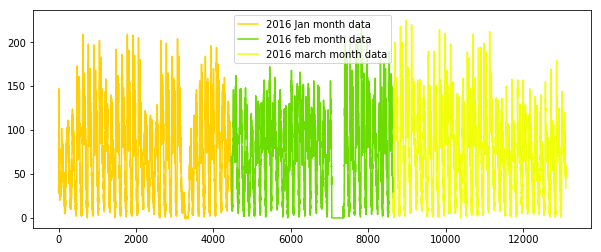

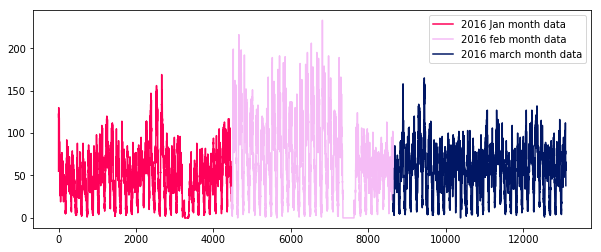

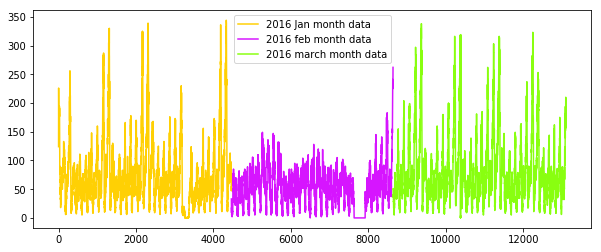

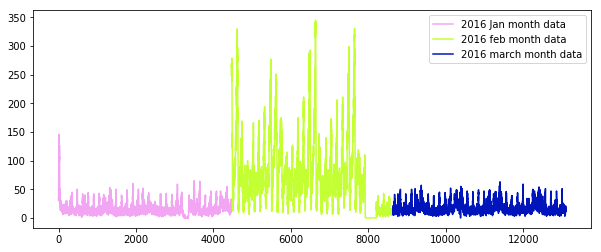

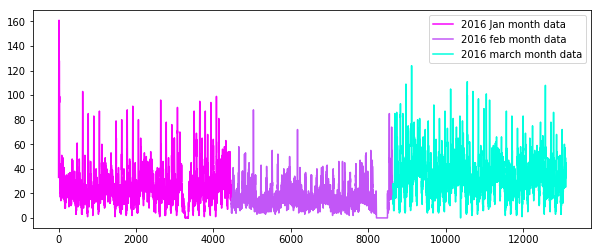

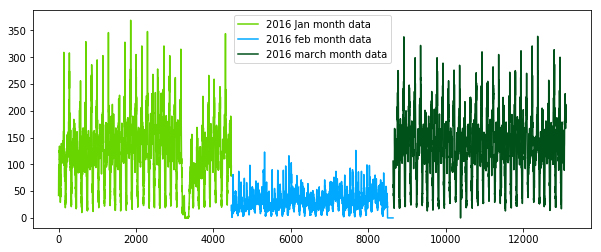

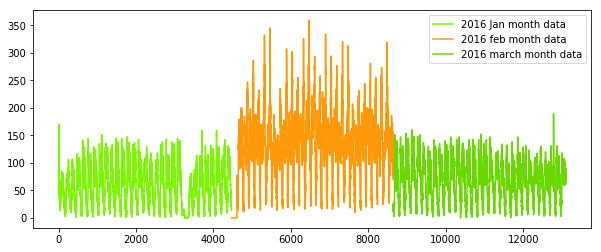

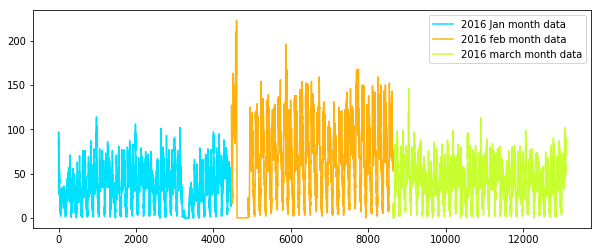

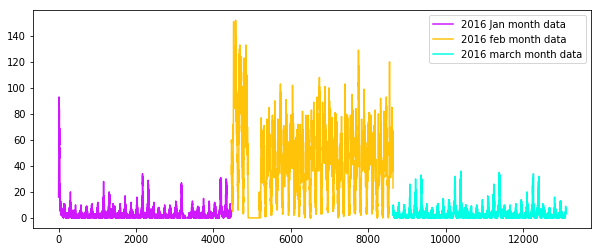

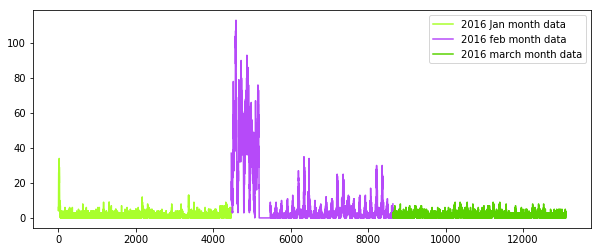

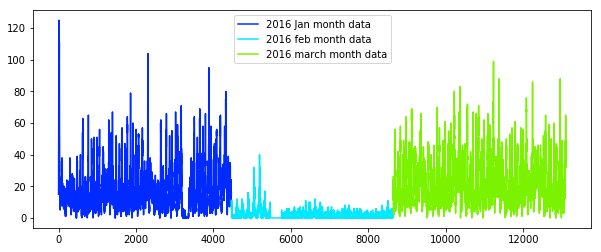

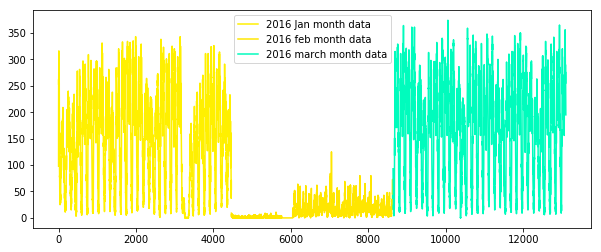

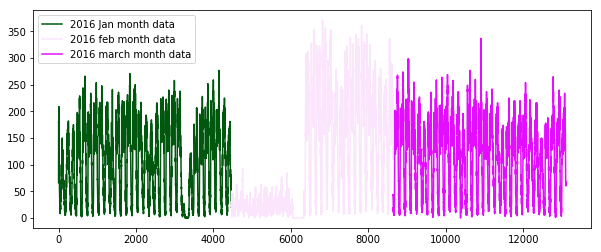

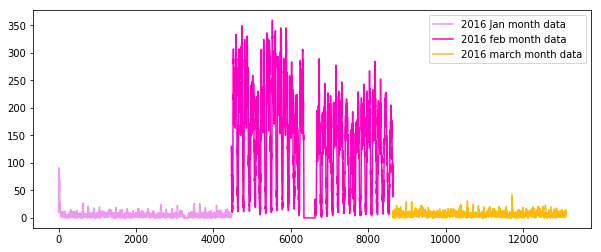

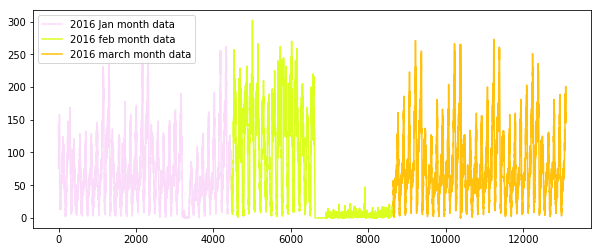

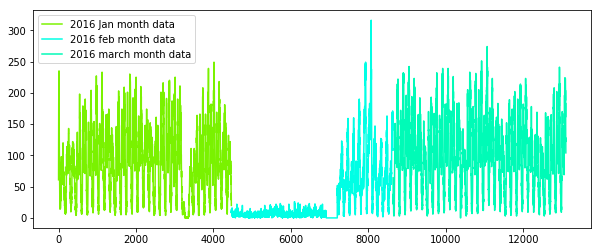

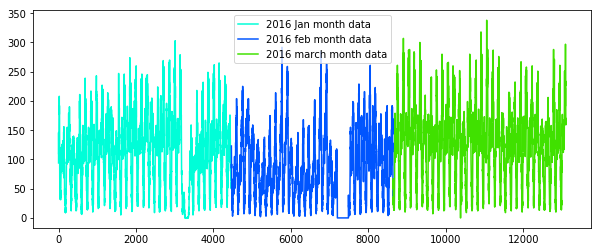

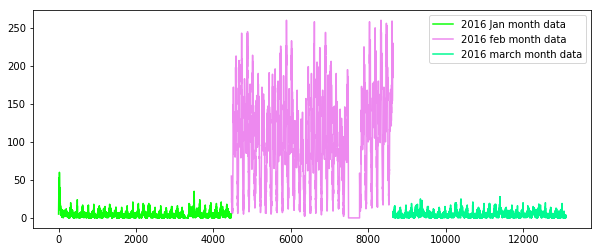

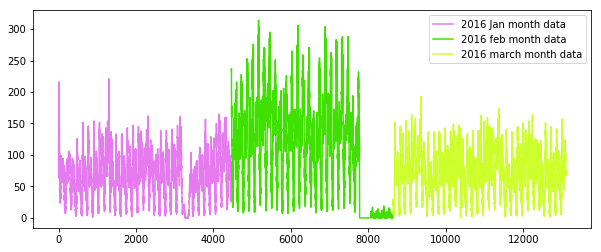

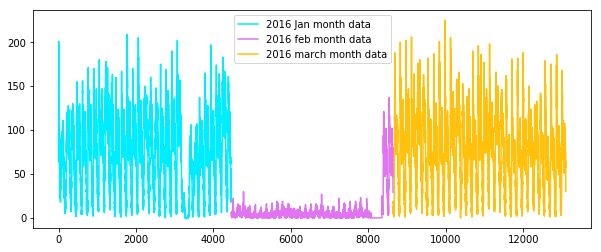

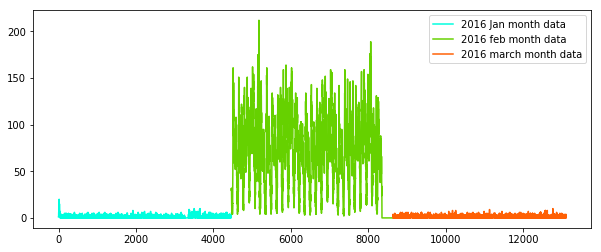

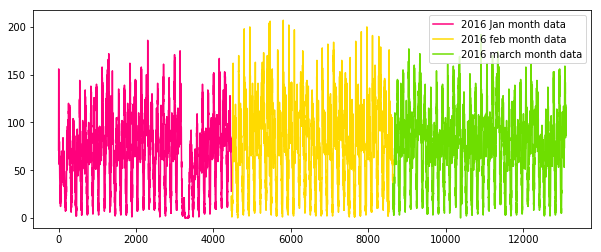

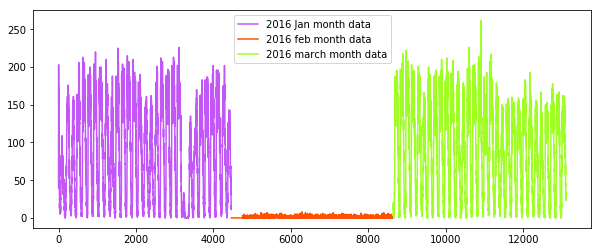

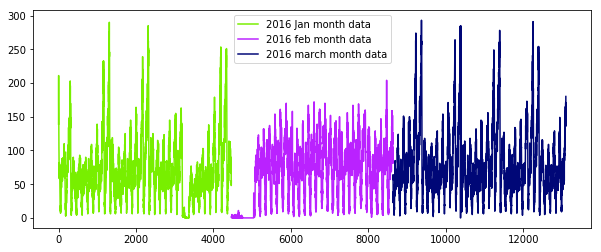

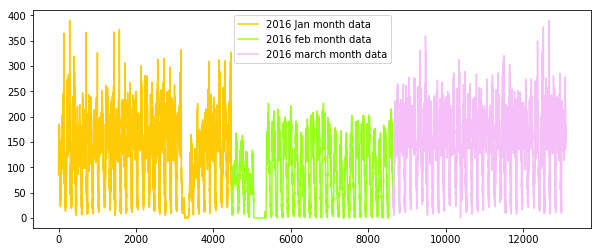

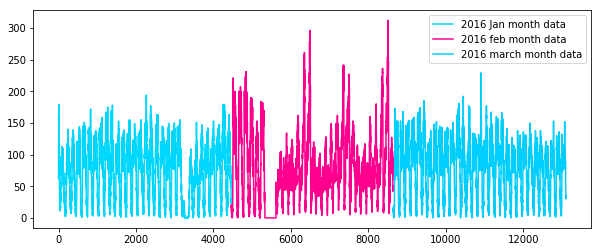

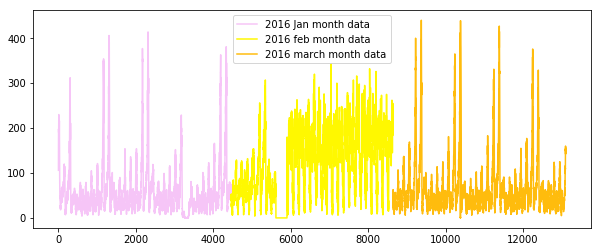

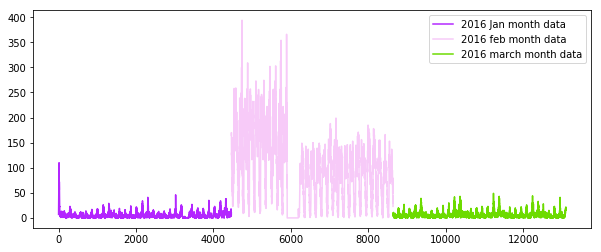

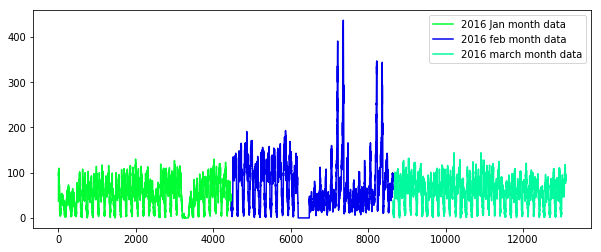

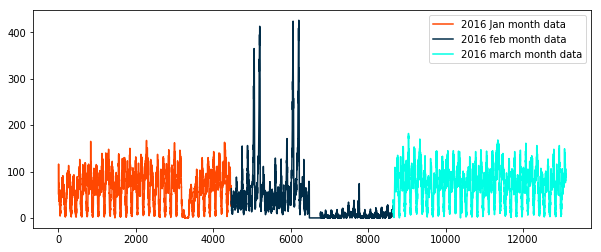

In [37]:
%matplotlib inline
def uniqueish_color():
    """There're better ways to generate unique colors, but this isn't awful."""
    return plt.cm.gist_ncar(np.random.random())
first_x = list(range(0,4464))
second_x = list(range(4464,8640))
third_x = list(range(8640,13104))
for i in range(40):
    plt.figure(figsize=(10,4))
    plt.plot(first_x,regions_cum[i][:4464], color=uniqueish_color(), label='2016 Jan month data')
    plt.plot(second_x,regions_cum[i][4464:8640], color=uniqueish_color(), label='2016 feb month data')
    plt.plot(third_x,regions_cum[i][8640:], color=uniqueish_color(), label='2016 march month data')
    plt.legend()
    plt.show()

In [89]:
# getting peaks: https://blog.ytotech.com/2015/11/01/findpeaks-in-python/
# read more about fft function : https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fft.html
Y    = np.fft.fft(np.array(jan_2016_smooth)[0:4460])
# read more about the fftfreq: https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fftfreq.html  
freq = np.fft.fftfreq(4460, 1)
n = len(freq)
plt.figure()
plt.plot( freq[:int(n/2)], np.abs(Y)[:int(n/2)] )
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.show()

<IPython.core.display.Javascript object>

In [36]:
#Preparing the Dataframe only with x(i) values as jan-2015 data and y(i) values as jan-2016
ratios_jan = pd.DataFrame()
ratios_jan['Given']=jan_2015_smooth
ratios_jan['Prediction']=jan_2016_smooth
ratios_jan['Ratios']=ratios_jan['Prediction']*1.0/ratios_jan['Given']*1.0

## Modelling: Baseline Models

Now we get into modelling in order to forecast the pickup densities for the months of Jan, Feb and March of 2016 for which we are using multiple models with two variations 
1. Using Ratios of the 2016 data to the 2015 data i.e $\begin{aligned} R_{t} = P^{2016}_{t} / P^{2015}_{t} \end{aligned}$
2. Using Previous known values of the 2016 data itself to predict the future values

### Simple Moving Averages
The First Model used is the Moving Averages Model which uses the previous n values in order to predict the next value <br> 

Using Ratio Values - $\begin{aligned}R_{t} = ( R_{t-1} + R_{t-2} + R_{t-3} .... R_{t-n} )/n \end{aligned}$

In [37]:
def MA_R_Predictions(ratios,month):
    predicted_ratio=(ratios['Ratios'].values)[0]
    error=[]
    predicted_values=[]
    window_size=3
    predicted_ratio_values=[]
    for i in range(0,4464*40):
        if i%4464==0:
            predicted_ratio_values.append(0)
            predicted_values.append(0)
            error.append(0)
            continue
        predicted_ratio_values.append(predicted_ratio)
        predicted_values.append(int(((ratios['Given'].values)[i])*predicted_ratio))
        error.append(abs((math.pow(int(((ratios['Given'].values)[i])*predicted_ratio)-(ratios['Prediction'].values)[i],1))))
        if i+1>=window_size:
            predicted_ratio=sum((ratios['Ratios'].values)[(i+1)-window_size:(i+1)])/window_size
        else:
            predicted_ratio=sum((ratios['Ratios'].values)[0:(i+1)])/(i+1)
            
    
    ratios['MA_R_Predicted'] = predicted_values
    ratios['MA_R_Error'] = error
    mape_err = (sum(error)/len(error))/(sum(ratios['Prediction'].values)/len(ratios['Prediction'].values))
    mse_err = sum([e**2 for e in error])/len(error)
    return ratios,mape_err,mse_err

For the above the Hyperparameter is the window-size (n) which is tuned manually and it is found that the window-size of 3 is optimal for getting the best results using Moving Averages using previous Ratio values therefore we get $\begin{aligned}R_{t} = ( R_{t-1} + R_{t-2} + R_{t-3})/3 \end{aligned}$

Next we use the Moving averages of the 2016  values itself to predict the future value using $\begin{aligned}P_{t} = ( P_{t-1} + P_{t-2} + P_{t-3} .... P_{t-n} )/n \end{aligned}$

In [38]:
def MA_P_Predictions(ratios,month):
    predicted_value=(ratios['Prediction'].values)[0]
    error=[]
    predicted_values=[]
    window_size=1
    predicted_ratio_values=[]
    for i in range(0,4464*40):
        predicted_values.append(predicted_value)
        error.append(abs((math.pow(predicted_value-(ratios['Prediction'].values)[i],1))))
        if i+1>=window_size:
            predicted_value=int(sum((ratios['Prediction'].values)[(i+1)-window_size:(i+1)])/window_size)
        else:
            predicted_value=int(sum((ratios['Prediction'].values)[0:(i+1)])/(i+1))
            
    ratios['MA_P_Predicted'] = predicted_values
    ratios['MA_P_Error'] = error
    mape_err = (sum(error)/len(error))/(sum(ratios['Prediction'].values)/len(ratios['Prediction'].values))
    mse_err = sum([e**2 for e in error])/len(error)
    return ratios,mape_err,mse_err

For the above the Hyperparameter is the window-size (n) which is tuned manually and it is found that the window-size of 1 is optimal for getting the best results using Moving Averages using previous 2016 values therefore we get $\begin{aligned}P_{t} = P_{t-1} \end{aligned}$

### Weighted Moving Averages
The Moving Avergaes Model used gave equal importance to all the values in the window used, but we know intuitively that the future is more likely to be similar to the latest values and less similar to the older values. Weighted Averages converts this analogy into a mathematical relationship giving the highest weight while computing the averages to the latest previous value and decreasing weights to the subsequent older ones<br>

Weighted Moving Averages using Ratio Values - $\begin{aligned}R_{t} = ( N*R_{t-1} + (N-1)*R_{t-2} + (N-2)*R_{t-3} .... 1*R_{t-n} )/(N*(N+1)/2) \end{aligned}$

In [39]:
def WA_R_Predictions(ratios,month):
    predicted_ratio=(ratios['Ratios'].values)[0]
    alpha=0.5
    error=[]
    predicted_values=[]
    window_size=5
    predicted_ratio_values=[]
    for i in range(0,4464*40):
        if i%4464==0:
            predicted_ratio_values.append(0)
            predicted_values.append(0)
            error.append(0)
            continue
        predicted_ratio_values.append(predicted_ratio)
        predicted_values.append(int(((ratios['Given'].values)[i])*predicted_ratio))
        error.append(abs((math.pow(int(((ratios['Given'].values)[i])*predicted_ratio)-(ratios['Prediction'].values)[i],1))))
        if i+1>=window_size:
            sum_values=0
            sum_of_coeff=0
            for j in range(window_size,0,-1):
                sum_values += j*(ratios['Ratios'].values)[i-window_size+j]
                sum_of_coeff+=j
            predicted_ratio=sum_values/sum_of_coeff
        else:
            sum_values=0
            sum_of_coeff=0
            for j in range(i+1,0,-1):
                sum_values += j*(ratios['Ratios'].values)[j-1]
                sum_of_coeff+=j
            predicted_ratio=sum_values/sum_of_coeff
            
    ratios['WA_R_Predicted'] = predicted_values
    ratios['WA_R_Error'] = error
    mape_err = (sum(error)/len(error))/(sum(ratios['Prediction'].values)/len(ratios['Prediction'].values))
    mse_err = sum([e**2 for e in error])/len(error)
    return ratios,mape_err,mse_err

For the above the Hyperparameter is the window-size (n) which is tuned manually and it is found that the window-size of 5 is optimal for getting the best results using Weighted Moving Averages using previous Ratio values therefore we get $\begin{aligned} R_{t} = ( 5*R_{t-1} + 4*R_{t-2} + 3*R_{t-3} + 2*R_{t-4} + R_{t-5} )/15 \end{aligned}$

Weighted Moving Averages using Previous 2016 Values - $\begin{aligned}P_{t} = ( N*P_{t-1} + (N-1)*P_{t-2} + (N-2)*P_{t-3} .... 1*P_{t-n} )/(N*(N+1)/2) \end{aligned}$

In [40]:
def WA_P_Predictions(ratios,month):
    predicted_value=(ratios['Prediction'].values)[0]
    error=[]
    predicted_values=[]
    window_size=2
    for i in range(0,4464*40):
        predicted_values.append(predicted_value)
        error.append(abs((math.pow(predicted_value-(ratios['Prediction'].values)[i],1))))
        if i+1>=window_size:
            sum_values=0
            sum_of_coeff=0
            for j in range(window_size,0,-1):
                sum_values += j*(ratios['Prediction'].values)[i-window_size+j]
                sum_of_coeff+=j
            predicted_value=int(sum_values/sum_of_coeff)

        else:
            sum_values=0
            sum_of_coeff=0
            for j in range(i+1,0,-1):
                sum_values += j*(ratios['Prediction'].values)[j-1]
                sum_of_coeff+=j
            predicted_value=int(sum_values/sum_of_coeff)
    
    ratios['WA_P_Predicted'] = predicted_values
    ratios['WA_P_Error'] = error
    mape_err = (sum(error)/len(error))/(sum(ratios['Prediction'].values)/len(ratios['Prediction'].values))
    mse_err = sum([e**2 for e in error])/len(error)
    return ratios,mape_err,mse_err

For the above the Hyperparameter is the window-size (n) which is tuned manually and it is found that the window-size of 2 is optimal for getting the best results using Weighted Moving Averages using previous 2016 values therefore we get $\begin{aligned} P_{t} = ( 2*P_{t-1} + P_{t-2} )/3 \end{aligned}$

### Exponential  Weighted Moving Averages
 https://en.wikipedia.org/wiki/Moving_average#Exponential_moving_average
Through weighted averaged we have satisfied the analogy of giving higher weights to the latest value and decreasing weights to the subsequent ones but we still do not know which is the correct weighting scheme as there are infinetly many possibilities in which we can assign weights in a non-increasing order and tune the the hyperparameter window-size. To simplify this process we use Exponential Moving Averages which is a more logical way towards assigning weights and at the same time also using an optimal window-size.

In exponential moving averages we use a single hyperparameter alpha $\begin{aligned}(\alpha)\end{aligned}$ which is a value between 0 & 1 and based on the value of the hyperparameter alpha the weights and the window sizes are configured.<br>
For eg. If $\begin{aligned}\alpha=0.9\end{aligned}$ then the number of days on which the value of the current iteration is based is~$\begin{aligned}1/(1-\alpha)=10\end{aligned}$ i.e. we consider values 10 days prior before we predict the value for the current iteration. Also the weights are assigned using $\begin{aligned}2/(N+1)=0.18\end{aligned}$ ,where N = number of prior values being considered, hence from this it is implied that the first or latest value is assigned a weight of 0.18 which keeps exponentially decreasing for the subsequent values.

$\begin{aligned}R^{'}_{t} = \alpha*R_{t-1} + (1-\alpha)*R^{'}_{t-1}  \end{aligned}$

In [41]:
def EA_R1_Predictions(ratios,month):
    predicted_ratio=(ratios['Ratios'].values)[0]
    alpha=0.6
    error=[]
    predicted_values=[]
    predicted_ratio_values=[]
    for i in range(0,4464*40):
        if i%4464==0:
            predicted_ratio_values.append(0)
            predicted_values.append(0)
            error.append(0)
            continue
        predicted_ratio_values.append(predicted_ratio)
        predicted_values.append(int(((ratios['Given'].values)[i])*predicted_ratio))
        error.append(abs((math.pow(int(((ratios['Given'].values)[i])*predicted_ratio)-(ratios['Prediction'].values)[i],1))))
        predicted_ratio = (alpha*predicted_ratio) + (1-alpha)*((ratios['Ratios'].values)[i])
    
    ratios['EA_R1_Predicted'] = predicted_values
    ratios['EA_R1_Error'] = error
    mape_err = (sum(error)/len(error))/(sum(ratios['Prediction'].values)/len(ratios['Prediction'].values))
    mse_err = sum([e**2 for e in error])/len(error)
    return ratios,mape_err,mse_err

$\begin{aligned}P^{'}_{t} = \alpha*P_{t-1} + (1-\alpha)*P^{'}_{t-1}  \end{aligned}$

In [42]:
def EA_P1_Predictions(ratios,month):
    predicted_value= (ratios['Prediction'].values)[0]
    alpha=0.3
    error=[]
    predicted_values=[]
    for i in range(0,4464*40):
        if i%4464==0:
            predicted_values.append(0)
            error.append(0)
            continue
        predicted_values.append(predicted_value)
        error.append(abs((math.pow(predicted_value-(ratios['Prediction'].values)[i],1))))
        predicted_value =int((alpha*predicted_value) + (1-alpha)*((ratios['Prediction'].values)[i]))
    
    ratios['EA_P1_Predicted'] = predicted_values
    ratios['EA_P1_Error'] = error
    mape_err = (sum(error)/len(error))/(sum(ratios['Prediction'].values)/len(ratios['Prediction'].values))
    mse_err = sum([e**2 for e in error])/len(error)
    return ratios,mape_err,mse_err

In [43]:
mean_err=[0]*10
median_err=[0]*10
ratios_jan,mean_err[0],median_err[0]=MA_R_Predictions(ratios_jan,'jan')
ratios_jan,mean_err[1],median_err[1]=MA_P_Predictions(ratios_jan,'jan')
ratios_jan,mean_err[2],median_err[2]=WA_R_Predictions(ratios_jan,'jan')
ratios_jan,mean_err[3],median_err[3]=WA_P_Predictions(ratios_jan,'jan')
ratios_jan,mean_err[4],median_err[4]=EA_R1_Predictions(ratios_jan,'jan')
ratios_jan,mean_err[5],median_err[5]=EA_P1_Predictions(ratios_jan,'jan')

## Comparison between baseline models
We have chosen our error metric for comparison between models as <b>MAPE (Mean Absolute Percentage Error)</b> so that we can know that on an average how good is our model with predictions and <b>MSE (Mean Squared Error)</b> is also used so that we have a clearer understanding as to how well our forecasting model performs with outliers so that we make sure that there is not much of a error margin between our prediction and the actual value

In [45]:
print ("Error Metric Matrix (Forecasting Methods) - MAPE & MSE")
print ("--------------------------------------------------------------------------------------------------------")
print ("Moving Averages (Ratios) -                             MAPE: ",mean_err[0],"      MSE: ",median_err[0])
print ("Moving Averages (2016 Values) -                        MAPE: ",mean_err[1],"       MSE: ",median_err[1])
print ("--------------------------------------------------------------------------------------------------------")
print ("Weighted Moving Averages (Ratios) -                    MAPE: ",mean_err[2],"      MSE: ",median_err[2])
print ("Weighted Moving Averages (2016 Values) -               MAPE: ",mean_err[3],"      MSE: ",median_err[3])
print ("--------------------------------------------------------------------------------------------------------")
print ("Exponential Moving Averages (Ratios) -              MAPE: ",mean_err[4],"      MSE: ",median_err[4])
print ("Exponential Moving Averages (2016 Values) -         MAPE: ",mean_err[5],"      MSE: ",median_err[5])

Error Metric Matrix (Forecasting Methods) - MAPE & MSE
--------------------------------------------------------------------------------------------------------
Moving Averages (Ratios) -                             MAPE:  0.18210684551733733       MSE:  404.20655801971327
Moving Averages (2016 Values) -                        MAPE:  0.14259943893312463        MSE:  173.49872311827957
--------------------------------------------------------------------------------------------------------
Weighted Moving Averages (Ratios) -                    MAPE:  0.17856610294168937       MSE:  388.5371807795699
Weighted Moving Averages (2016 Values) -               MAPE:  0.13518503122892725       MSE:  161.13224686379928
--------------------------------------------------------------------------------------------------------
Exponential Moving Averages (Ratios) -              MAPE:  0.17801742169014942       MSE:  383.0665770609319
Exponential Moving Averages (2016 Values) -         MAPE:  0.13489103

<b>Plese Note:-</b> The above comparisons are made using Jan 2015 and Jan 2016 only

From the above matrix it is inferred that the best forecasting model for our prediction would be:-
$\begin{aligned}P^{'}_{t} = \alpha*P_{t-1} + (1-\alpha)*P^{'}_{t-1}  \end{aligned}$ i.e Exponential Moving Averages using 2016 Values

## Regression Models

### Train-Test Split
Before we start predictions using the tree based regression models we take 3 months of 2016 pickup data and split it such that for every region we have 70% data in train and 30% in test, ordered date-wise for every region

In [46]:
# Preparing data to be split into train and test, The below prepares data in cumulative form which will be later split into test and train
# number of 10min indices for jan 2015= 24*31*60/10 = 4464
# number of 10min indices for jan 2016 = 24*31*60/10 = 4464
# number of 10min indices for feb 2016 = 24*29*60/10 = 4176
# number of 10min indices for march 2016 = 24*31*60/10 = 4464
# regions_cum: it will contain 40 lists, each list will contain 4464+4176+4464 values which represents the number of pickups 
# that are happened for three months in 2016 data

# print(len(regions_cum))
# 40
# print(len(regions_cum[0]))
# 12960

# we take number of pickups that are happened in last 5 10min intravels
number_of_time_stamps = 5

# output varaible
# it is list of lists
# it will contain number of pickups 13099 for each cluster
output = []


# tsne_lat will contain 13104-5=13099 times lattitude of cluster center for every cluster
# Ex: [[cent_lat 13099times],[cent_lat 13099times], [cent_lat 13099times].... 40 lists]
# it is list of lists
tsne_lat = []


# tsne_lon will contain 13104-5=13099 times logitude of cluster center for every cluster
# Ex: [[cent_long 13099times],[cent_long 13099times], [cent_long 13099times].... 40 lists]
# it is list of lists
tsne_lon = []

# we will code each day 
# sunday = 0, monday=1, tue = 2, wed=3, thur=4, fri=5,sat=6
# for every cluster we will be adding 13099 values, each value represent to which day of the week that pickup bin belongs to
# it is list of lists
tsne_weekday = []

# its an numbpy array, of shape (523960, 5)
# each row corresponds to an entry in out data
# for the first row we will have [f0,f1,f2,f3,f4] fi=number of pickups happened in i+1th 10min intravel(bin)
# the second row will have [f1,f2,f3,f4,f5]
# the third row will have [f2,f3,f4,f5,f6]
# and so on...
tsne_feature = []


tsne_feature = [0]*number_of_time_stamps
for i in range(0,40):
    tsne_lat.append([kmeans.cluster_centers_[i][0]]*13099)
    tsne_lon.append([kmeans.cluster_centers_[i][1]]*13099)
    # jan 1st 2016 is thursday, so we start our day from 4: "(int(k/144))%7+4"
    # our prediction start from 5th 10min intravel since we need to have number of pickups that are happened in last 5 pickup bins
    tsne_weekday.append([int(((int(k/144))%7+4)%7) for k in range(5,4464+4176+4464)])
    # regions_cum is a list of lists [[x1,x2,x3..x13104], [x1,x2,x3..x13104], [x1,x2,x3..x13104], [x1,x2,x3..x13104], [x1,x2,x3..x13104], .. 40 lsits]
    tsne_feature = np.vstack((tsne_feature, [regions_cum[i][r:r+number_of_time_stamps] for r in range(0,len(regions_cum[i])-number_of_time_stamps)]))
    output.append(regions_cum[i][5:])
tsne_feature = tsne_feature[1:]

In [48]:
len(tsne_lat[0])*len(tsne_lat) == tsne_feature.shape[0] == len(tsne_weekday)*len(tsne_weekday[0]) == 40*13099 == len(output)*len(output[0])

True

In [49]:
# Getting the predictions of exponential moving averages to be used as a feature in cumulative form

# upto now we computed 8 features for every data point that starts from 50th min of the day
# 1. cluster center lattitude
# 2. cluster center longitude
# 3. day of the week 
# 4. f_t_1: number of pickups that are happened previous t-1th 10min intravel
# 5. f_t_2: number of pickups that are happened previous t-2th 10min intravel
# 6. f_t_3: number of pickups that are happened previous t-3th 10min intravel
# 7. f_t_4: number of pickups that are happened previous t-4th 10min intravel
# 8. f_t_5: number of pickups that are happened previous t-5th 10min intravel

# from the baseline models we said the exponential weighted moving avarage gives us the best error
# we will try to add the same exponential weighted moving avarage at t as a feature to our data
# exponential weighted moving avarage => p'(t) = alpha*p'(t-1) + (1-alpha)*P(t-1) 
alpha=0.3

# it is a temporary array that store exponential weighted moving avarage for each 10min intravel, 
# for each cluster it will get reset
# for every cluster it contains 13104 values
predicted_values=[]

# it is similar like tsne_lat
# it is list of lists
# predict_list is a list of lists [[x5,x6,x7..x13104], [x5,x6,x7..x13104], [x5,x6,x7..x13104], [x5,x6,x7..x13104], [x5,x6,x7..x13104], .. 40 lsits]
predict_list = []
tsne_flat_exp_avg = []
for r in range(0,40):
    for i in range(0,13104):
        if i==0:
            predicted_value= regions_cum[r][0]
            predicted_values.append(0)
            continue
        predicted_values.append(predicted_value)
        predicted_value =int((alpha*predicted_value) + (1-alpha)*(regions_cum[r][i]))
    predict_list.append(predicted_values[5:])
    predicted_values=[]

In [50]:
# train, test split : 70% 30% split
# Before we start predictions using the tree based regression models we take 3 months of 2016 pickup data 
# and split it such that for every region we have 70% data in train and 30% in test,
# ordered date-wise for every region
print("size of train data :", int(13099*0.7))
print("size of test data :", int(13099*0.3))

size of train data : 9169
size of test data : 3929


In [51]:
# extracting first 9169 timestamp values i.e 70% of 13099 (total timestamps) for our training data
train_features =  [tsne_feature[i*13099:(13099*i+9169)] for i in range(0,40)]
# temp = [0]*(12955 - 9068)
test_features = [tsne_feature[(13099*(i))+9169:13099*(i+1)] for i in range(0,40)]

In [52]:
print("Number of data clusters",len(train_features), "Number of data points in trian data", len(train_features[0]), "Each data point contains", len(train_features[0][0]),"features")
print("Number of data clusters",len(train_features), "Number of data points in test data", len(test_features[0]), "Each data point contains", len(test_features[0][0]),"features")

Number of data clusters 40 Number of data points in trian data 9169 Each data point contains 5 features
Number of data clusters 40 Number of data points in test data 3930 Each data point contains 5 features


In [53]:
# extracting first 9169 timestamp values i.e 70% of 13099 (total timestamps) for our training data
tsne_train_flat_lat = [i[:9169] for i in tsne_lat]
tsne_train_flat_lon = [i[:9169] for i in tsne_lon]
tsne_train_flat_weekday = [i[:9169] for i in tsne_weekday]
tsne_train_flat_output = [i[:9169] for i in output]
tsne_train_flat_exp_avg = [i[:9169] for i in predict_list]

In [54]:
# extracting the rest of the timestamp values i.e 30% of 12956 (total timestamps) for our test data
tsne_test_flat_lat = [i[9169:] for i in tsne_lat]
tsne_test_flat_lon = [i[9169:] for i in tsne_lon]
tsne_test_flat_weekday = [i[9169:] for i in tsne_weekday]
tsne_test_flat_output = [i[9169:] for i in output]
tsne_test_flat_exp_avg = [i[9169:] for i in predict_list]

In [55]:
# the above contains values in the form of list of lists (i.e. list of values of each region), here we make all of them in one list
train_new_features = []
for i in range(0,40):
    train_new_features.extend(train_features[i])
test_new_features = []
for i in range(0,40):
    test_new_features.extend(test_features[i])

In [56]:
# converting lists of lists into sinle list i.e flatten
# a  = [[1,2,3,4],[4,6,7,8]]
# print(sum(a,[]))
# [1, 2, 3, 4, 4, 6, 7, 8]

tsne_train_lat = sum(tsne_train_flat_lat, [])
tsne_train_lon = sum(tsne_train_flat_lon, [])
tsne_train_weekday = sum(tsne_train_flat_weekday, [])
tsne_train_output = sum(tsne_train_flat_output, [])
tsne_train_exp_avg = sum(tsne_train_flat_exp_avg,[])

In [57]:
# converting lists of lists into sinle list i.e flatten
# a  = [[1,2,3,4],[4,6,7,8]]
# print(sum(a,[]))
# [1, 2, 3, 4, 4, 6, 7, 8]

tsne_test_lat = sum(tsne_test_flat_lat, [])
tsne_test_lon = sum(tsne_test_flat_lon, [])
tsne_test_weekday = sum(tsne_test_flat_weekday, [])
tsne_test_output = sum(tsne_test_flat_output, [])
tsne_test_exp_avg = sum(tsne_test_flat_exp_avg,[])

In [58]:
# Preparing the data frame for our train data
columns = ['ft_5','ft_4','ft_3','ft_2','ft_1']
df_train = pd.DataFrame(data=train_new_features, columns=columns) 
df_train['lat'] = tsne_train_lat
df_train['lon'] = tsne_train_lon
df_train['weekday'] = tsne_train_weekday
df_train['exp_avg'] = tsne_train_exp_avg

print(df_train.shape)

(366760, 9)


In [59]:
# Preparing the data frame for our train data
df_test = pd.DataFrame(data=test_new_features, columns=columns) 
df_test['lat'] = tsne_test_lat
df_test['lon'] = tsne_test_lon
df_test['weekday'] = tsne_test_weekday
df_test['exp_avg'] = tsne_test_exp_avg
print(df_test.shape)

(157200, 9)


In [60]:
df_test.head()

ft_5  ft_4  ft_3  ft_2  ft_1        lat        lon  weekday  exp_avg
0   118   106   104    93   102  40.776228 -73.982119        4      100
1   106   104    93   102   101  40.776228 -73.982119        4      100
2   104    93   102   101   120  40.776228 -73.982119        4      114
3    93   102   101   120   131  40.776228 -73.982119        4      125
4   102   101   120   131   164  40.776228 -73.982119        4      152

In [86]:
df_train = pd.read_csv('df_train.csv')

In [88]:
df_test = pd.read_csv('df_test.csv')

### Using Linear Regression

In [63]:
# find more about LinearRegression function here http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
# -------------------------
# default paramters
# sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)

# some of methods of LinearRegression()
# fit(X, y[, sample_weight])	Fit linear model.
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict using the linear model
# score(X, y[, sample_weight])	Returns the coefficient of determination R^2 of the prediction.
# set_params(**params)	Set the parameters of this estimator.
# -----------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1-2-copy-8/
# -----------------------

from sklearn.linear_model import LinearRegression
lr_reg=LinearRegression().fit(df_train, tsne_train_output)

y_pred = lr_reg.predict(df_test)
lr_test_predictions = [round(value) for value in y_pred]
y_pred = lr_reg.predict(df_train)
lr_train_predictions = [round(value) for value in y_pred]
print('Train MAPE = ',(mean_absolute_error(tsne_train_output, lr_train_predictions))/(sum(tsne_train_output)/len(tsne_train_output)))
print('Test MAPE = ',(mean_absolute_error(tsne_test_output, lr_test_predictions))/(sum(tsne_test_output)/len(tsne_test_output)))

Train MAPE =  0.1331672957224943
Test MAPE =  0.12912870954053876


In [111]:
from sklearn.linear_model import Ridge
for alpha in [10**i for i in range(-4,4)]:
    lr_reg = Ridge(alpha=alpha).fit(df_train, tsne_train_output)

    y_pred = lr_reg.predict(df_test)
    lr_ridge_test_predictions = [round(value) for value in y_pred]
    y_pred = lr_reg.predict(df_train)
    lr_ridge_train_predictions = [round(value) for value in y_pred]
    print('alpha = ',alpha)
    print('Train MAPE = ',(mean_absolute_error(tsne_train_output, lr_ridge_train_predictions))/(sum(tsne_train_output)/len(tsne_train_output)))
    print('Test MAPE = ',(mean_absolute_error(tsne_test_output, lr_ridge_test_predictions))/(sum(tsne_test_output)/len(tsne_test_output)))
    print('------')

alpha =  0.0001
Train MAPE =  0.1331672957224943
Test MAPE =  0.12912870954053876
------
alpha =  0.001
Train MAPE =  0.1331672957224943
Test MAPE =  0.12912870954053876
------
alpha =  0.01
Train MAPE =  0.1331672957224943
Test MAPE =  0.12912870954053876
------
alpha =  0.1
Train MAPE =  0.13316738445730014
Test MAPE =  0.1291285184010031
------
alpha =  1
Train MAPE =  0.13316738445730014
Test MAPE =  0.12912842283123527
------
alpha =  10
Train MAPE =  0.13316742882470306
Test MAPE =  0.12913052536612776
------
alpha =  100
Train MAPE =  0.13317341842409647
Test MAPE =  0.1291321500521811
------
alpha =  1000
Train MAPE =  0.13324649153669607
Test MAPE =  0.12920182041293785
------


### Using Random Forest Regressor

In [61]:
def MAPE(y,y_pred):
    y = np.array(y)
    y_pred = np.array(y_pred)
    y_pred = np.round(y_pred)
    return (mean_absolute_error(y,y_pred))/(sum(y.ravel())/len(y.ravel()))
from sklearn.metrics import make_scorer
mape_score = make_scorer(MAPE,greater_is_better=False)

In [135]:
rf_reg = RandomForestRegressor(random_state=25,n_jobs=-1)
rf_reg.fit(df_train, tsne_train_output)
y_pred = rf_reg.predict(df_test)
rndf_test_predictions = [round(value) for value in y_pred]
y_pred = rf_reg.predict(df_train)
rndf_train_predictions = [round(value) for value in y_pred]
print('Train MAPE = ',MAPE(tsne_train_output,rndf_train_predictions))
print('Test MAPE = ',MAPE(tsne_test_output, rndf_test_predictions))

Train MAPE =  0.05515742220064981
Test MAPE =  0.1352156436241585


Depth =  3
Train MAPE =  0.16728436443917163 Test MAPE =  0.16101068852283543
---
Depth =  5
Train MAPE =  0.13439156983850709 Test MAPE =  0.13046582616241506
---
Depth =  8
Train MAPE =  0.1306510428336218 Test MAPE =  0.1283376785721112
---
Depth =  9
Train MAPE =  0.12979111383033995 Test MAPE =  0.1281213086177171
---
Depth =  10
Train MAPE =  0.1287573977098434 Test MAPE =  0.12790589436100142
---
Depth =  11
Train MAPE =  0.12747287266067323 Test MAPE =  0.12773520675563574
---
Depth =  12
Train MAPE =  0.12595617299205336 Test MAPE =  0.12772478965094097
---
Depth =  13
Train MAPE =  0.12414789075148176 Test MAPE =  0.1276850326275187
---
Depth =  15
Train MAPE =  0.11938917621711989 Test MAPE =  0.12799458310555872
---
Depth =  20
Train MAPE =  0.10032530179816648 Test MAPE =  0.12987711639250885
---
Depth =  30
Train MAPE =  0.06292469032661951 Test MAPE =  0.1344909380746132
---
Depth =  40
Train MAPE =  0.05542109767616854 Test MAPE =  0.13521717274044398
---
Depth =  70
Tr

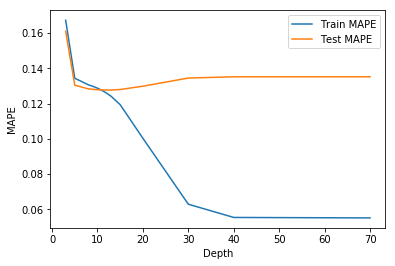

In [94]:
%matplotlib inline
train_errors = []
test_errors = []
depths = [3,5,8,9,10,11,12,13,15,20,30,40,70]
for depth in depths:
    rf_reg = RandomForestRegressor(max_depth=depth,random_state=25,n_jobs=-1)
    rf_reg.fit(df_train, tsne_train_output)
    y_pred = rf_reg.predict(df_test)
    rndf_test_predictions = [round(value) for value in y_pred]
    y_pred = rf_reg.predict(df_train)
    rndf_train_predictions = [round(value) for value in y_pred]
    train_err = MAPE(tsne_train_output,rndf_train_predictions)
    test_err = MAPE(tsne_test_output, rndf_test_predictions)
    train_errors.append(train_err)
    test_errors.append(test_err)
    print('Depth = ',depth)
    print('Train MAPE = ',train_err,'Test MAPE = ',test_err)
    print('---')
plt.figure()
plt.plot(depths,train_errors,label='Train MAPE')
plt.plot(depths,test_errors,label='Test MAPE')
plt.xlabel('Depth')
plt.ylabel('MAPE')
plt.legend()

Depth of 10-13 may be best depth without overfitting to the data.

Estimators =  5
Train MAPE =  0.12772723098157998 Test MAPE =  0.12808126488499133
---
Estimators =  10
Train MAPE =  0.12747287266067323 Test MAPE =  0.12773520675563574
---
Estimators =  20
Train MAPE =  0.12731110910964827 Test MAPE =  0.12752686466174035
---
Estimators =  30
Train MAPE =  0.12722277361044623 Test MAPE =  0.12746990508010658
---
Estimators =  40
Train MAPE =  0.12719260377646463 Test MAPE =  0.12744381453348572
---
Estimators =  50
Train MAPE =  0.12717286028216782 Test MAPE =  0.12740348409145644
---
Estimators =  60
Train MAPE =  0.12715356046190016 Test MAPE =  0.12737299733551485
---
Estimators =  70
Train MAPE =  0.12715542389282256 Test MAPE =  0.12738207646345984
---
Estimators =  80
Train MAPE =  0.12715977189830815 Test MAPE =  0.12736678530060513
---
Estimators =  120
Train MAPE =  0.1271377212990598 Test MAPE =  0.12735722832382093
---
Estimators =  150
Train MAPE =  0.12714153689571045 Test MAPE =  0.12735627262614252
---
Estimators =  200
Train MAPE =  

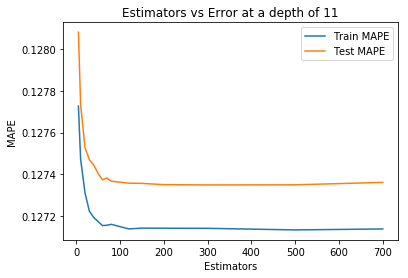

In [95]:
train_errors = []
test_errors = []
estimators = [5,10,20,30,40,50,60,70,80,120,150,200,300,500,700]
for i in estimators:
    rf_reg = RandomForestRegressor(n_estimators=i,max_depth=11,random_state=25,n_jobs=-1)
    rf_reg.fit(df_train, tsne_train_output)
    y_pred = rf_reg.predict(df_test)
    rndf_test_predictions = [round(value) for value in y_pred]
    y_pred = rf_reg.predict(df_train)
    rndf_train_predictions = [round(value) for value in y_pred]
    train_err = MAPE(tsne_train_output,rndf_train_predictions)
    test_err = MAPE(tsne_test_output, rndf_test_predictions)
    train_errors.append(train_err)
    test_errors.append(test_err)
    print('Estimators = ',i)
    print('Train MAPE = ',train_err,'Test MAPE = ',test_err)
    print('---')
plt.figure()
plt.plot(estimators,train_errors,label='Train MAPE')
plt.plot(estimators,test_errors,label='Test MAPE')
plt.xlabel('Estimators')
plt.ylabel('MAPE')
plt.title('Estimators vs Error at a depth of 11')
plt.legend()

Even incresing no of Estimators also there is no such inmprovement in the train or test scores so may be 100-150 be better choice. we will decide this with randomsearch .

In [62]:
## for cross validation we need a custom cv folds because 
##in every fold we have to include data from each cluster (Region) 
## and we need to consider it as time series data so written a custom cv iterable
## for 10 fold cv
from sklearn.model_selection import TimeSeriesSplit
def custom_cv_10fold():
    '''
    Gives a iterable with train and test indeces for 10 fold cv
    '''
    tscv = TimeSeriesSplit(n_splits=10)
    train_cv= []
    test_cv = []
    for train, test in tscv.split(df_train[0:9169]):
        train_temp = []
        test_temp = []
        for i in range(0,40):
            train_temp.extend(list(np.array(train)+i*9169))
        for i in range(0,40):
            test_temp.extend(list(np.array(test)+i*9169))
        train_cv.append(np.array(train_temp))
        test_cv.append(np.array(test_temp))
    return zip(np.array(train_cv),np.array(test_cv))
cv_custom = custom_cv_10fold()

In [63]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform
param_dist = {"max_depth": sp_randint(8,14),
              "n_estimators":sp_randint(90,160),
              "max_features": sp_randint(3,9),
              "min_samples_split": sp_randint(2, 8),
              "min_samples_leaf": sp_randint(1, 12),
              "bootstrap": [True, False]}
model_rs_rf = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1), 
                                 param_distributions=param_dist,
                                 n_iter=50,scoring=mape_score,
                                 cv=cv_custom,n_jobs=-1)
model_rs_rf.fit(df_train,tsne_train_output)
model_rs_rf = pickle.dump(model_rs_rf,open('model_rs_rf.p','wb'))

In [119]:
dict_scores = []
idx = 0
for i in model_rs_rf.grid_scores_:
    dict_score = []
    dict_score.append(i[0]['n_estimators'])
    dict_score.append(i[0]['max_depth'])
    dict_score.append(i[0]['max_features'])
    dict_score.append(i[0]['min_samples_leaf'])
    dict_score.append(i[0]['min_samples_split'])
    dict_score.append(i[0]['bootstrap'])
    dict_score.append(-i[1])
    dict_score.append((np.abs(i[2]).std()))
    dict_score.append(-model_rs_rf.cv_results_['mean_train_score'][idx])
    dict_scores.append(dict_score)
    idx = idx + 1
scores_df = pd.DataFrame(dict_scores,columns=['n_estimators','depth','max_features','min_samples_leaf',
                                               'min_samples_split','bootstrap','Test_score',
                                               'Test_std','Train_score'])

In [127]:
scores_df.sort_values('Test_score',ascending=True).head(15)

n_estimators  depth  max_features  min_samples_leaf  min_samples_split  \
21           154     13             3                 5                  6   
20           112     14             3                 8                  5   
41            91     12             3                 6                  5   
45            92     12             3                 2                  5   
2            145     14             4                 8                  6   
18           106     12             4                 9                  3   
25           115     11             3                 3                  4   
14           126     12             3                 6                  3   
54            94     12             4                 5                  5   
16           108     14             3                 8                  6   
50           144     13             5                 6                  6   
9            107     12             5                11                  7   
47           104     14             5                10                  7   
33           107     12             5                10                  7   
36           112     14             5                10                  3   

    bootstrap  Test_score  Test_std  Train_score  
21       True    0.130042  0.002303     0.120083  
20       True    0.130079  0.002313     0.119649  
41       True    0.130096  0.002214     0.123596  
45       True    0.130153  0.002315     0.121832  
2        True    0.130199  0.002348     0.119241  
18       True    0.130207  0.002281     0.124457  
25       True    0.130213  0.002203     0.125369  
14      False    0.130218  0.002405     0.121311  
54       True    0.130238  0.002276     0.122998  
16      False    0.130243  0.002465     0.115099  
50       True    0.130265  0.002369     0.120540  
9        True    0.130286  0.002270     0.124939  
47       True    0.130297  0.002361     0.120400  
33       True    0.130298  0.002280     0.124669  
36       True    0.130306  0.002330     0.120406

In [122]:
#with max features = auto and bootstrap = True
model_rs_rf1 = pickle.load(open('/home/u15918/model_rs_rf1.p','rb'))
param_dist = {"max_depth": sp_randint(11,16),
              "n_estimators":sp_randint(100,220),
              "min_samples_split": sp_randint(3, 8),
              "min_samples_leaf": sp_randint(2, 12)}
model_rs_rf1 = RandomizedSearchCV(RandomForestRegressor(bootstrap=True,max_features='auto',
                                                       n_jobs=-1), param_distributions=param_dist,
                                   n_iter=80,scoring=mape_score,cv=cv_custom,random_state=25,n_jobs=-1)
model_rs_rf1.fit(df_train, np.array(tsne_train_output).reshape(-1,1))

pickle.dump(model_rs_rf1,open('model_rs_rf1.p','wb'))

In [125]:
dict_scores = []
idx = 0
for i in model_rs_rf1.grid_scores_:
    dict_score = []
    dict_score.append(i[0]['n_estimators'])
    dict_score.append(i[0]['max_depth'])
    dict_score.append(i[0]['min_samples_leaf'])
    dict_score.append(i[0]['min_samples_split'])
    dict_score.append(-i[1])
    dict_score.append((np.abs(i[2]).std()))
    dict_score.append(-model_rs_rf1.cv_results_['mean_train_score'][idx])
    dict_scores.append(dict_score)
    idx = idx + 1
scores_df1 = pd.DataFrame(dict_scores,columns=['n_estimators','depth','min_samples_leaf',
                                               'min_samples_split','Test_score',
                                               'Test_std','Train_score'])

In [128]:
scores_df1.sort_values('Test_score',ascending=True).head(15)

n_estimators  depth  min_samples_leaf  min_samples_split  Test_score  \
37           198     12                10                  5    0.130591   
19           186     13                 9                  4    0.130608   
68           174     12                11                  5    0.130631   
55           144     12                11                  3    0.130631   
38           184     13                 7                  4    0.130633   
32           163     13                10                  6    0.130635   
49           193     13                11                  3    0.130639   
78           157     13                 8                  7    0.130640   
50           130     11                10                  3    0.130644   
61           140     12                 8                  6    0.130646   
67           154     13                 7                  6    0.130648   
41           168     11                 8                  3    0.130653   
52           162     13                 9                  4    0.130655   
70           174     13                 6                  6    0.130657   
72           190     14                11                  7    0.130659   

    Test_std  Train_score  
37  0.002364     0.124920  
19  0.002398     0.122397  
68  0.002323     0.125141  
55  0.002358     0.125141  
38  0.002435     0.121649  
32  0.002398     0.122750  
49  0.002377     0.123061  
78  0.002420     0.122058  
50  0.002271     0.127027  
61  0.002359     0.124483  
67  0.002433     0.121672  
41  0.002307     0.126714  
52  0.002418     0.122407  
70  0.002417     0.121272  
72  0.002443     0.121033

Got good cv scores at n_estimators = 154, depth = 13, max_features = 3, min_samples_leaf = 5, min_samples_split = 6, bootstrap = True and the Test Score  = 0.130042, test std = 0.002303, Train score  = 0.120083.

In [64]:
regr1 = RandomForestRegressor(max_features=3,min_samples_leaf=5,
                              min_samples_split=6,n_estimators=154,
                              bootstrap = True,max_depth = 13,n_jobs=-1)
regr1.fit(df_train, tsne_train_output)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=6, min_weight_fraction_leaf=0.0,
           n_estimators=154, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [65]:
rndf_test_predictions = regr1.predict(df_test)
rndf_train_predictions = regr1.predict(df_train)
print('Train MAPE for Random Forest',MAPE(tsne_train_output,rndf_train_predictions))
print('Test MAPE for Random Forest',MAPE(tsne_test_output,rndf_test_predictions))

Train MAPE for Random Forest 0.12262595572931803
Test MAPE for Random Forest 0.12646250415728488


In [66]:
#feature importances based on analysis using random forest
print (df_train.columns)
print (regr1.feature_importances_)

Index(['ft_5', 'ft_4', 'ft_3', 'ft_2', 'ft_1', 'lat', 'lon', 'weekday',
       'exp_avg'],
      dtype='object')
[0.02036286 0.08988435 0.10135364 0.17920857 0.26774517 0.00067306
 0.00104094 0.00034333 0.33938808]


### Using XgBoost Regressor

In [64]:
import xgboost as xgb

In [25]:
#basic xgboost without any change
xgb_reg = xgb.XGBRegressor(random_state=25,n_jobs=-1)
xgb_reg.fit(df_train, tsne_train_output)
xgb_test_predictions = xgb_reg.predict(df_test)
xgb_train_predictions = xgb_reg.predict(df_train)
print('Train MAPE = ',MAPE(tsne_train_output,xgb_train_predictions))
print('Test MAPE = ',MAPE(tsne_test_output, xgb_test_predictions))

Train MAPE =  0.1314521406606395
Test MAPE =  0.12796734572172377


In [28]:
%matplotlib inline
train_errors = []
test_errors = []
estimators = [10,50,100,150,200,300,500,700,1000,1300]
for i in estimators:
    xgb_reg = xgb.XGBRegressor(n_estimators=i,random_state=25,n_jobs=-1)
    xgb_reg.fit(df_train, tsne_train_output)
    xgb_test_predictions = xgb_reg.predict(df_test)
    xgb_train_predictions = xgb_reg.predict(df_train)
    train_err = MAPE(tsne_train_output,xgb_train_predictions)
    test_err = MAPE(tsne_test_output, xgb_test_predictions)
    train_errors.append(train_err)
    test_errors.append(test_err)
    print('Estimators = ',i)
    print('Train MAPE = ',train_err,'Test MAPE = ',test_err)
    print('---')
plt.figure()
plt.plot(estimators,train_errors,label='Train MAPE')
plt.plot(estimators,test_errors,label='Test MAPE')
plt.xlabel('Estimators')
plt.ylabel('MAPE')
plt.title('Estimators vs Error')
plt.legend()

Estimators =  10
Train MAPE =  0.3589861959699313 Test MAPE =  0.35803225670804195
---
Estimators =  50
Train MAPE =  0.13224330018940447 Test MAPE =  0.12853550799154398
---
Estimators =  100
Train MAPE =  0.1314521406606395 Test MAPE =  0.12796734572172377
---
Estimators =  150
Train MAPE =  0.13088268504423653 Test MAPE =  0.12775623210456097
---
Estimators =  200
Train MAPE =  0.13049003352844638 Test MAPE =  0.12756203433630617
---
Estimators =  300
Train MAPE =  0.12994653284274818 Test MAPE =  0.12732091181204103
---
Estimators =  500
Train MAPE =  0.12915905580842513 Test MAPE =  0.1270299974387302
---
Estimators =  700
Train MAPE =  0.12866648890127233 Test MAPE =  0.1268873117753422
---
Estimators =  1000
Train MAPE =  0.1280621161387759 Test MAPE =  0.1267545653678098
---
Estimators =  1300
Train MAPE =  0.1275066806216938 Test MAPE =  0.12667830069307193
---


depth =  3
Train MAPE =  0.12767709581628703 Test MAPE =  0.12669311400708744
---
depth =  5
Train MAPE =  0.120841676253723 Test MAPE =  0.126057383911403
---
depth =  8
Train MAPE =  0.09528787123869796 Test MAPE =  0.12698259483388064
---
depth =  9
Train MAPE =  0.08055212570882472 Test MAPE =  0.12766333829021861
---


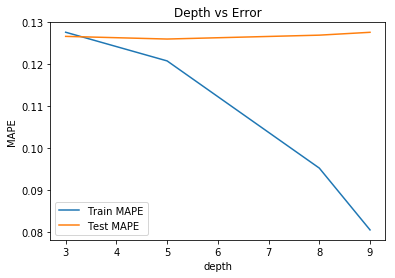

In [31]:
%matplotlib inline
train_errors = []
test_errors = []
depths = [3,5,8,9]
for i in depths:
    xgb_reg = xgb.XGBRegressor(n_estimators=1200,max_depth=i,random_state=25,n_jobs=-1)
    xgb_reg.fit(df_train, tsne_train_output)
    xgb_test_predictions = xgb_reg.predict(df_test)
    xgb_train_predictions = xgb_reg.predict(df_train)
    train_err = MAPE(tsne_train_output,xgb_train_predictions)
    test_err = MAPE(tsne_test_output, xgb_test_predictions)
    train_errors.append(train_err)
    test_errors.append(test_err)
    print('depth = ',i)
    print('Train MAPE = ',train_err,'Test MAPE = ',test_err)
    print('---')
plt.figure()
plt.plot(depths,train_errors,label='Train MAPE')
plt.plot(depths,test_errors,label='Test MAPE')
plt.xlabel('depth')
plt.ylabel('MAPE')
plt.title('Depth vs Error')
plt.legend()

We can observe that, if depth is incresing then model is overfitting to the data. 

In [33]:
%matplotlib inline
train_errors = []
test_errors = []
learning_rates = [0.1,0.2,0.3,0.4,0.5,0.6,0.7]
for i in learning_rates:
    xgb_reg = xgb.XGBRegressor(n_estimators=1200,max_depth=3,learning_rate=i,random_state=25,n_jobs=-1)
    xgb_reg.fit(df_train, tsne_train_output)
    xgb_test_predictions = xgb_reg.predict(df_test)
    xgb_train_predictions = xgb_reg.predict(df_train)
    train_err = MAPE(tsne_train_output,xgb_train_predictions)
    test_err = MAPE(tsne_test_output, xgb_test_predictions)
    train_errors.append(train_err)
    test_errors.append(test_err)
    print('learning rate = ',i)
    print('Train MAPE = ',train_err,'Test MAPE = ',test_err)
    print('---')
plt.figure()
plt.plot(learning_rates,train_errors,label='Train MAPE')
plt.plot(learning_rates,test_errors,label='Test MAPE')
plt.xlabel('learning rate')
plt.ylabel('MAPE')
plt.title('learning rate vs Error')
plt.legend()

learning rate =  0.1
Train MAPE =  0.12767709581628703 Test MAPE =  0.12669311400708744
---
learning rate =  0.2
Train MAPE =  0.12606789011259117 Test MAPE =  0.12674691978638244
---
learning rate =  0.3
Train MAPE =  0.12481282501895599 Test MAPE =  0.1267493090305785
---
learning rate =  0.4
Train MAPE =  0.1238859456046767 Test MAPE =  0.12707711333427626
---
learning rate =  0.5
Train MAPE =  0.12315215312787972 Test MAPE =  0.12743530882414777
---
learning rate =  0.6
Train MAPE =  0.12248899355652208 Test MAPE =  0.12779952520939336
---
learning rate =  0.7
Train MAPE =  0.12181988875317394 Test MAPE =  0.1281174858270034
---


alpha =  0.5
Train MAPE =  0.12768610239907857 Test MAPE =  0.12673879635611587
---
alpha =  1
Train MAPE =  0.1276490999850482 Test MAPE =  0.1266720886581622
---
alpha =  10
Train MAPE =  0.12768290794606876 Test MAPE =  0.12676096854225521
---
alpha =  20
Train MAPE =  0.1276625876755341 Test MAPE =  0.12669817920478307
---
alpha =  50
Train MAPE =  0.12770256270555974 Test MAPE =  0.12654880365764615
---
alpha =  100
Train MAPE =  0.12777732177947007 Test MAPE =  0.1265480390995034
---
alpha =  150
Train MAPE =  0.12784817652192393 Test MAPE =  0.12645810794796417
---
alpha =  250
Train MAPE =  0.12795687665906358 Test MAPE =  0.12633434509860886
---
alpha =  350
Train MAPE =  0.12810222427101028 Test MAPE =  0.12632994888928817
---


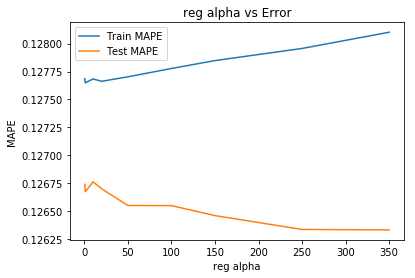

In [35]:
%matplotlib inline
train_errors = []
test_errors = []
alphas = [0.5,1,10,20,50,100,150,250,350]
for i in alphas:
    xgb_reg = xgb.XGBRegressor(n_estimators=1200,max_depth=3,learning_rate=0.1,reg_alpha=i,random_state=25,n_jobs=-1)
    xgb_reg.fit(df_train, tsne_train_output)
    xgb_test_predictions = xgb_reg.predict(df_test)
    xgb_train_predictions = xgb_reg.predict(df_train)
    train_err = MAPE(tsne_train_output,xgb_train_predictions)
    test_err = MAPE(tsne_test_output, xgb_test_predictions)
    train_errors.append(train_err)
    test_errors.append(test_err)
    print('alpha = ',i)
    print('Train MAPE = ',train_err,'Test MAPE = ',test_err)
    print('---')
plt.figure()
plt.plot(alphas,train_errors,label='Train MAPE')
plt.plot(alphas,test_errors,label='Test MAPE')
plt.xlabel('reg alpha')
plt.ylabel('MAPE')
plt.title('reg alpha vs Error')
plt.legend()

In [91]:
param_dist = {"max_depth": sp_randint(2,5),
              "learning_rate":uniform(0,0.4),
              "n_estimators":sp_randint(500,1500),
              "min_child_weight": sp_randint(2, 8),
              "gamma": uniform(0,4),
              "subsample":uniform(0.7,0.3),
              "colsample_bytree": uniform(0.7,0.3),
              "reg_alpha":uniform(50,300),
              "reg_lambda":uniform(50,300)}
model_rs_xgb = RandomizedSearchCV(xgb.XGBRegressor(n_jobs=-1,random_state=25), param_distributions=param_dist,
                                   n_iter=60,scoring=mape_score,cv=cv_random,n_jobs=-1,)
model_rs_xgb.fit(df_train, np.array(tsne_train_output).reshape(-1,1))

pickle.dump(model_rs_xgb,open('model_rs_xgb.p','wb'))

In [94]:
dict_scores = []
idx = 0
for i in model_rs_xgb.grid_scores_:
    dict_score = []
    dict_score.append(i[0]['n_estimators'])
    dict_score.append(i[0]['max_depth'])
    dict_score.append(i[0]['subsample'])
    dict_score.append(i[0]['min_child_weight'])
    dict_score.append(i[0]['learning_rate'])
    dict_score.append(i[0]['reg_alpha'])
    dict_score.append(i[0]['reg_lambda'])
    dict_score.append(i[0]['gamma'])
    dict_score.append(i[0]['colsample_bytree'])
    dict_score.append(-i[1])
    dict_score.append((np.abs(i[2]).std()))
    dict_score.append(-model_rs_xgb.cv_results_['mean_train_score'][idx])
    dict_scores.append(dict_score)
    idx = idx + 1
scores_df = pd.DataFrame(dict_scores,columns=['n_estimators','depth','subsample','min_child_weight',
                                               'learning_rate','reg_alpha','reg_lambda','colsample_bytree',
                                               'gamma','Test_score',
                                               'Test_std','Train_score'])

In [95]:
scores_df.sort_values('Test_score')

n_estimators  depth  subsample  min_child_weight  learning_rate  \
45           796      4   0.933216                 2       0.081514   
39          1269      4   0.750671                 5       0.019686   
47           613      4   0.935360                 7       0.088536   
0            701      4   0.882286                 7       0.114138   
53          1032      4   0.992537                 4       0.159035   
49          1104      4   0.778829                 6       0.052591   
2            608      3   0.944728                 5       0.046327   
59           503      3   0.977901                 7       0.081593   
25          1347      3   0.951024                 5       0.023088   
33          1119      3   0.806651                 3       0.124731   
41           568      3   0.962890                 3       0.233031   
4            808      3   0.701262                 5       0.110865   
6            513      4   0.866341                 5       0.364493   
21           532      3   0.990889                 4       0.324569   
28          1390      4   0.702220                 7       0.158471   
48          1058      3   0.958791                 3       0.134699   
36          1429      3   0.701496                 6       0.176591   
54          1096      2   0.992240                 4       0.350167   
24           891      4   0.922409                 2       0.180075   
15           510      4   0.813808                 3       0.213109   
40           598      3   0.837293                 6       0.311250   
58           610      3   0.933162                 2       0.393003   
52          1147      3   0.729421                 2       0.173638   
35          1411      2   0.933978                 5       0.059402   
37          1255      2   0.926283                 7       0.043733   
51           868      3   0.870342                 7       0.370501   
14          1398      3   0.853813                 7       0.290587   
3            878      3   0.705963                 5       0.261680   
17           735      3   0.798319                 7       0.269010   
12          1087      4   0.729657                 6       0.164418   
8            844      2   0.951920                 4       0.054009   
38          1227      3   0.869399                 7       0.276098   
27          1462      4   0.722860                 6       0.214687   
10          1198      2   0.911253                 2       0.059024   
34           689      2   0.973945                 6       0.322509   
16          1076      3   0.998999                 2       0.370001   
31          1196      3   0.862370                 4       0.291155   
46          1026      3   0.883843                 6       0.323351   
43          1123      2   0.785158                 4       0.112809   
1            981      2   0.902372                 3       0.234643   
11          1212      2   0.866583                 7       0.389662   
57           874      2   0.792305                 5       0.354907   
30           612      2   0.886479                 2       0.382674   
44           750      2   0.941443                 4       0.097955   
5           1004      4   0.884257                 7       0.372866   
55          1369      2   0.767052                 4       0.297252   
23           990      3   0.751789                 4       0.368227   
13          1218      2   0.864430                 6       0.240162   
7           1451      3   0.717069                 7       0.262637   
26           937      2   0.800293                 4       0.266372   
18          1161      3   0.948821                 6       0.307687   
56           850      4   0.820970                 2       0.365787   
42           523      2   0.827874                 2       0.095348   
50           872      2   0.731666                 3       0.162513   
22          1314      4   0.707236                 6       0.221981   
32           666      4   0.

In [80]:
param_dist = {"max_depth": sp_randint(3,5),
              "learning_rate":uniform(0,0.25),
              "n_estimators":sp_randint(600,1500),
              "min_child_weight": sp_randint(2, 6),
              "gamma": uniform(1,5),
              "subsample":uniform(0.7,0.3),
              "colsample_bytree": uniform(0.7,0.3),
              "reg_alpha":uniform(50,300),
              "reg_lambda":uniform(50,300)}
model_rs_xgb1 = RandomizedSearchCV(xgb.XGBRegressor(n_jobs=-1,random_state=25), param_distributions=param_dist,
                                   n_iter=60,scoring=mape_score,cv=cv_random,n_jobs=-1,)
model_rs_xgb1.fit(df_train, np.array(tsne_train_output).reshape(-1,1))

pickle.dump(model_rs_xgb1,open('model_rs_xgb1.p','wb'))

In [82]:
dict_scores = []
idx = 0
for i in model_rs_xgb1.grid_scores_:
    dict_score = []
    dict_score.append(i[0]['n_estimators'])
    dict_score.append(i[0]['max_depth'])
    dict_score.append(i[0]['subsample'])
    dict_score.append(i[0]['min_child_weight'])
    dict_score.append(i[0]['learning_rate'])
    dict_score.append(i[0]['reg_alpha'])
    dict_score.append(i[0]['reg_lambda'])
    dict_score.append(i[0]['gamma'])
    dict_score.append(i[0]['colsample_bytree'])
    dict_score.append(-i[1])
    dict_score.append((np.abs(i[2]).std()))
    dict_score.append(-model_rs_xgb1.cv_results_['mean_train_score'][idx])
    dict_scores.append(dict_score)
    idx = idx + 1
scores_df1 = pd.DataFrame(dict_scores,columns=['n_estimators','depth','subsample','min_child_weight',
                                               'learning_rate','reg_alpha','reg_lambda','gamma',
                                              'colsample_bytree','Test_score',
                                               'Test_std','Train_score'])

In [84]:
scores_df1.sort_values('Test_score').head(15)

n_estimators  depth  subsample  min_child_weight  learning_rate  \
54          1300      4   0.970102                 4       0.046343   
53           840      4   0.772684                 4       0.079339   
35           806      4   0.920082                 5       0.094608   
51          1005      4   0.955422                 4       0.087905   
36           703      4   0.762869                 5       0.077343   
25          1082      4   0.899544                 4       0.031255   
33          1260      4   0.897162                 4       0.082450   
17           896      4   0.898376                 3       0.075462   
10          1191      3   0.857143                 4       0.034896   
4           1335      3   0.809783                 2       0.084558   
45          1099      4   0.763994                 5       0.107428   
46          1499      3   0.849022                 5       0.124632   
59          1305      3   0.929542                 3       0.050319   
48          1153      4   0.873212                 5       0.126770   
34           774      3   0.747812                 3       0.101997   

     reg_alpha  reg_lambda     gamma  colsample_bytree  Test_score  Test_std  \
54  180.790625   58.127168  2.626861          0.961831    0.130605  0.003077   
53  221.182717  112.644784  1.249390          0.800053    0.130846  0.002975   
35  235.892488  160.175510  2.773804          0.994072    0.130857  0.003270   
51  142.492381  141.716180  3.276192          0.999961    0.130918  0.003446   
36  132.485974  129.748329  4.773886          0.978133    0.130930  0.002931   
25  198.113250  185.534899  1.105037          0.996339    0.130931  0.002785   
33   65.511045   87.027911  5.718612          0.757984    0.130963  0.003282   
17  318.566059  299.690894  4.569821          0.885391    0.131026  0.003378   
10  271.281741  114.521138  1.050294          0.887457    0.131027  0.002500   
4   344.877534  143.344217  1.446662          0.934201    0.131052  0.002942   
45  237.694511  195.608075  3.833065          0.933837    0.131108  0.003277   
46  324.032336  134.870329  2.437720          0.780461    0.131129  0.003035   
59  266.114150  285.350913  5.157400          0.832989    0.131138  0.002839   
48  180.673541  188.886060  2.751861          0.794426    0.131139  0.003346   
34  288.012746  197.818088  4.001075          0.816006    0.131186  0.002750   

    Train_score  
54     0.128536  
53     0.129305  
35     0.128856  
51     0.128096  
36     0.129785  
25     0.131097  
33     0.127267  
17     0.129948  
10     0.131993  
4      0.130351  
45     0.128067  
46     0.129365  
59     0.131592  
48     0.127081  
34     0.131372

got good cv scores at n_estimators = 1300, depth = 4, subsample =0.970102, min_child_weight = 4, learning_rate = 0.046343,	reg_alpha = 180.790625, reg_lambda =58.127168, gamma =2.626861,	colsample_bytree = 0.961831, Test_score = 0.130605, Test_std = 0.003077,Train_score = 0.128536

In [68]:
regr_xgb = xgb.XGBRegressor(
 learning_rate =  0.046343,
 n_estimators=1300,
 max_depth=4,
 min_child_weight=4,
 gamma=2.626861,
 subsample=0.970102,
 reg_alpha=180.790625, reg_lambda=58.127168,
 colsample_bytree=0.961831,njobs=-1,random_state=25)
regr_xgb.fit(df_train, tsne_train_output)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.961831, gamma=2.626861, learning_rate=0.046343,
       max_delta_step=0, max_depth=4, min_child_weight=4, missing=None,
       n_estimators=1300, n_jobs=1, njobs=-1, nthread=None,
       objective='reg:linear', random_state=25, reg_alpha=180.790625,
       reg_lambda=58.127168, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.970102)

In [69]:
xgb_test_predictions = regr_xgb.predict(df_test)
xgb_train_predictions = regr_xgb.predict(df_train)
print('Train MAPE for Random Forest',MAPE(tsne_train_output,xgb_train_predictions))
print('Test MAPE for Random Forest',MAPE(tsne_test_output,xgb_test_predictions))

Train MAPE for Random Forest 0.12787426455483747
Test MAPE for Random Forest 0.12624422280753395


### Calculating the error metric values for various models

In [70]:
train_mape=[]
test_mape=[]

train_mape.append(MAPE(tsne_train_output,df_train['ft_1'].values))
train_mape.append(MAPE(tsne_train_output,df_train['exp_avg'].values))
train_mape.append(MAPE(tsne_train_output,rndf_train_predictions))
train_mape.append(MAPE(tsne_train_output, xgb_train_predictions))
train_mape.append(MAPE(tsne_train_output, lr_train_predictions))

test_mape.append(MAPE(tsne_test_output, df_test['ft_1'].values))
test_mape.append(MAPE(tsne_test_output, df_test['exp_avg'].values))
test_mape.append(MAPE(tsne_test_output, rndf_test_predictions))
test_mape.append(MAPE(tsne_test_output, xgb_test_predictions))
test_mape.append(MAPE(tsne_test_output, lr_test_predictions))

In [71]:
print ("Error Metric Matrix (Tree Based Regression Methods) -  MAPE")
print ("--------------------------------------------------------------------------------------------------------")
print ("Baseline Model -                             Train: ",train_mape[0],"      Test: ",test_mape[0])
print ("Exponential Averages Forecasting -           Train: ",train_mape[1],"      Test: ",test_mape[1])
print ("Linear Regression -                         Train: ",train_mape[3],"      Test: ",test_mape[3])
print ("Random Forest Regression -                   Train: ",train_mape[2],"     Test: ",test_mape[2])

Error Metric Matrix (Tree Based Regression Methods) -  MAPE
--------------------------------------------------------------------------------------------------------
Baseline Model -                             Train:  0.13985452815932514       Test:  0.13653125704827038
Exponential Averages Forecasting -           Train:  0.13275578806046567       Test:  0.1293618042043052
Linear Regression -                         Train:  0.12787426455483747       Test:  0.12624422280753395
Random Forest Regression -                   Train:  0.12262595572931803      Test:  0.12646250415728488


### Error Metric Matrix

In [72]:
print ("Error Metric Matrix (Tree Based Regression Methods) -  MAPE")
print ("--------------------------------------------------------------------------------------------------------")
print ("Baseline Model -                             Train: ",train_mape[0],"      Test: ",test_mape[0])
print ("Exponential Averages Forecasting -           Train: ",train_mape[1],"      Test: ",test_mape[1])
print ("Linear Regression -                         Train: ",train_mape[4],"      Test: ",test_mape[4])
print ("Random Forest Regression -                   Train: ",train_mape[2],"     Test: ",test_mape[2])
print ("XgBoost Regression -                         Train: ",train_mape[3],"      Test: ",test_mape[3])
print ("--------------------------------------------------------------------------------------------------------")

Error Metric Matrix (Tree Based Regression Methods) -  MAPE
--------------------------------------------------------------------------------------------------------
Baseline Model -                             Train:  0.13985452815932514       Test:  0.13653125704827038
Exponential Averages Forecasting -           Train:  0.13275578806046567       Test:  0.1293618042043052
Linear Regression -                         Train:  0.1331672957224943       Test:  0.12912870954053876
Random Forest Regression -                   Train:  0.12262595572931803      Test:  0.12646250415728488
XgBoost Regression -                         Train:  0.12787426455483747       Test:  0.12624422280753395
--------------------------------------------------------------------------------------------------------


#### Fourier Analysis:

<IPython.core.display.Javascript object>


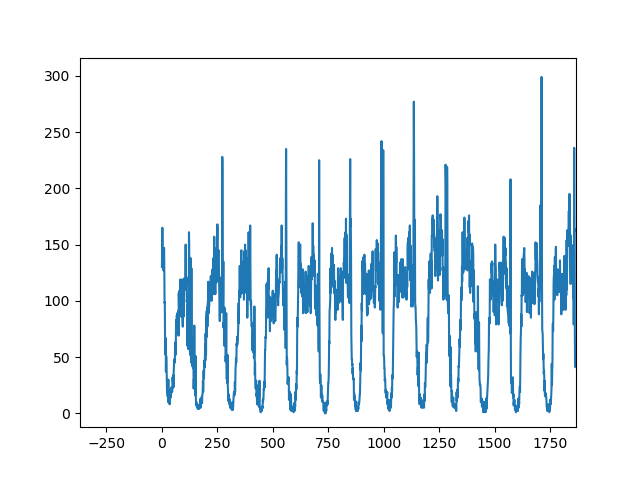

In [111]:
### Cluster 0 data
plt.plot(regions_cum[0][5:])
plt.show()

We can observe that there is so much seasonal component i.e periodic in nature so for the test samples got only seasonal components and restored that seasonal somponent with four transforms and inverse of that so that i can predict seasonl term in the series.  
First tried total values to decompose ito sum ofwaves using fourier for training samples but it is highly overfitting. so got seasonal components and decomposed and that series used as feature to predict. 

In [93]:
def fourier_transform(X,n_predict=0,n_wave=144):
    ##fft
    fft_x = np.fft.fft(X)
    ##fft freq
    freq = np.fft.fftfreq(len(X),1)
    idx = list(range(len(X)))
    ##sorting
    idx.sort(key=lambda i:np.absolute(freq[i]))
    t = np.arange(0,len(X)+n_predict)
    ##restoring series
    restored_series = np.zeros(t.size)
    for j in idx[:1+n_wave*2]:
        #amplitude
        ampl = np.absolute(fft_x[j])/len(X)
        #phase
        phase = np.angle(fft_x[j])
        restored_series += ampl * np.cos(2 * np.pi * freq[j] * t + phase)
    #return np.absolute(np.fft.ifft(np.array(xf)[idx[:1+n_harm*2]]))
    return restored_series

In [94]:
from statsmodels.tsa.seasonal import seasonal_decompose
final_fourier_train = []
final_fourier_test = []
for i in range(40):
    #for each cluster
    temp_data = tsne_train_output[9169*i:9169*(i+1)]
    #sesonal decompose to get seasonal 
    result = seasonal_decompose(x=temp_data, model='additive',freq=144)
    #getting top harmonics and predicting test samples aslo
    fourier_decom = fourier_transform(result.seasonal,n_predict=3930,n_wave=440)
    #training data
    train_fourier = fourier_decom[0:9169]
    #testing data
    test_fourier = fourier_decom[9169:]
    final_fourier_train.extend(train_fourier)
    final_fourier_test.extend(test_fourier)

In [95]:
print('train',len(final_fourier_train))
print('Test',len(final_fourier_test))

train 366760
Test 157200


In [96]:
df_train['fourier_decom'] = final_fourier_train
df_test['fourier_decom'] = final_fourier_test

#### Random Forest:

In [114]:
%matplotlib inline
train_errors = []
test_errors = []
depths = [3,5,8,9,10,11,12,13,15,20,30,40,70]
for depth in depths:
    rf_reg = RandomForestRegressor(max_depth=depth,random_state=25,n_jobs=-1)
    rf_reg.fit(df_train, tsne_train_output)
    rndf_test_predictions = rf_reg.predict(df_test)
    rndf_train_predictions = rf_reg.predict(df_train)
    train_err = MAPE(tsne_train_output,rndf_train_predictions)
    test_err = MAPE(tsne_test_output, rndf_test_predictions)
    train_errors.append(train_err)
    test_errors.append(test_err)
    print('Depth = ',depth)
    print('Train MAPE = ',train_err,'Test MAPE = ',test_err)
    print('---')
plt.figure()
plt.plot(depths,train_errors,label='Train MAPE')
plt.plot(depths,test_errors,label='Test MAPE')
plt.xlabel('Depth')
plt.ylabel('MAPE')
plt.legend()

Depth =  3
Train MAPE =  0.16728436443917163 Test MAPE =  0.16101068852283543
---
Depth =  5
Train MAPE =  0.13439156983850709 Test MAPE =  0.13046582616241506
---
Depth =  8
Train MAPE =  0.12961825842858646 Test MAPE =  0.13221093012320853
---
Depth =  9
Train MAPE =  0.1284598699059012 Test MAPE =  0.13329144191842926
---
Depth =  10
Train MAPE =  0.12711815527437467 Test MAPE =  0.13445452599306545
---
Depth =  11
Train MAPE =  0.12553184315058252 Test MAPE =  0.13545007626467473
---
Depth =  12
Train MAPE =  0.12361623616236164 Test MAPE =  0.13654540137391097
---
Depth =  13
Train MAPE =  0.1213754161107801 Test MAPE =  0.13706816800400626
---
Depth =  15
Train MAPE =  0.11565534869007461 Test MAPE =  0.13882149096483415
---
Depth =  20
Train MAPE =  0.0948047545883659 Test MAPE =  0.142745203353352
---
Depth =  30
Train MAPE =  0.059301071428412976 Test MAPE =  0.14634197156608267
---
Depth =  40
Train MAPE =  0.05319305543662627 Test MAPE =  0.14655881936931597
---
Depth =  70


Estimators =  5
Train MAPE =  0.12582812866724316 Test MAPE =  0.1360186208135663
---
Estimators =  10
Train MAPE =  0.12553184315058252 Test MAPE =  0.13545007626467473
---
Estimators =  20
Train MAPE =  0.12531737112489558 Test MAPE =  0.1352079024729633
---
Estimators =  30
Train MAPE =  0.12524940026363113 Test MAPE =  0.13497404325105414
---
Estimators =  40
Train MAPE =  0.12522814827763526 Test MAPE =  0.1350576667979158
---
Estimators =  50
Train MAPE =  0.1251975347696245 Test MAPE =  0.13493027229738253
---
Estimators =  60
Train MAPE =  0.1251615084384582 Test MAPE =  0.13481348604107968
---
Estimators =  70
Train MAPE =  0.12516536840251172 Test MAPE =  0.1347733467385861
---
Estimators =  80
Train MAPE =  0.12515689422855514 Test MAPE =  0.13470386751736502
---
Estimators =  120
Train MAPE =  0.1251540103473657 Test MAPE =  0.1346693668311741
---
Estimators =  150
Train MAPE =  0.1251482869523898 Test MAPE =  0.1346810263428508
---
Estimators =  200
Train MAPE =  0.1251373

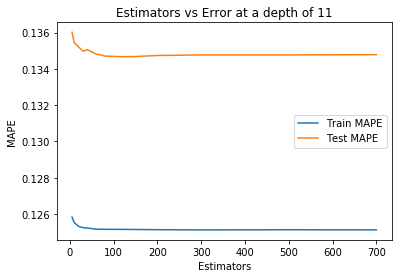

In [115]:
train_errors = []
test_errors = []
estimators = [5,10,20,30,40,50,60,70,80,120,150,200,300,500,700]
for i in estimators:
    rf_reg = RandomForestRegressor(n_estimators=i,max_depth=11,random_state=25,n_jobs=-1)
    rf_reg.fit(df_train, tsne_train_output)
    rndf_test_predictions = rf_reg.predict(df_test)
    rndf_train_predictions = rf_reg.predict(df_train)
    train_err = MAPE(tsne_train_output,rndf_train_predictions)
    test_err = MAPE(tsne_test_output, rndf_test_predictions)
    train_errors.append(train_err)
    test_errors.append(test_err)
    print('Estimators = ',i)
    print('Train MAPE = ',train_err,'Test MAPE = ',test_err)
    print('---')
plt.figure()
plt.plot(estimators,train_errors,label='Train MAPE')
plt.plot(estimators,test_errors,label='Test MAPE')
plt.xlabel('Estimators')
plt.ylabel('MAPE')
plt.title('Estimators vs Error at a depth of 11')
plt.legend()

In [135]:
param_dist = {"max_depth": sp_randint(8,14),
              "n_estimators":sp_randint(90,160),
              "max_features": sp_randint(3,9),
              "min_samples_split": sp_randint(2, 8),
              "min_samples_leaf": sp_randint(1, 12),
              "bootstrap": [True, False]}
model_rs_rf_fd = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1), 
                                 param_distributions=param_dist,
                                 n_iter=50,scoring=mape_score,
                                 cv=cv_custom,n_jobs=-1)
model_rs_rf_fd.fit(df_train, np.array(tsne_train_output).reshape(-1,1))
pickle.dump(model_rs_rf_fd,open('model_rs_rf_fd.p','wb'))

In [136]:
dict_scores = []
idx = 0
for i in model_rs_rf_fd.grid_scores_:
    dict_score = []
    dict_score.append(i[0]['n_estimators'])
    dict_score.append(i[0]['max_depth'])
    dict_score.append(i[0]['max_features'])
    dict_score.append(i[0]['min_samples_leaf'])
    dict_score.append(i[0]['min_samples_split'])
    dict_score.append(i[0]['bootstrap'])
    dict_score.append(-i[1])
    dict_score.append((np.abs(i[2]).std()))
    dict_score.append(-model_rs_rf_fd.cv_results_['mean_train_score'][idx])
    dict_scores.append(dict_score)
    idx = idx + 1
scores_df = pd.DataFrame(dict_scores,columns=['n_estimators','depth','max_features','min_samples_leaf',
                                               'min_samples_split','bootstrap','Test_score',
                                               'Test_std','Train_score'])

In [139]:
scores_df.sort_values('Test_score').head(10)

n_estimators  depth  max_features  min_samples_leaf  min_samples_split  \
10           142     13             3                 4                  2   
25           148     13             3                10                  2   
35           105     13             3                 2                  2   
45           122     13             4                 2                  7   
11           125     12             3                 6                  4   
31           136     13             6                 4                  6   
2             94     13             7                10                  2   
3            112     11             3                 6                  7   
9            140     12             7                 4                  4   
13            91     11             3                 9                  7   

    bootstrap  Test_score  Test_std  Train_score  
10       True    0.128380  0.002400     0.116656  
25      False    0.128453  0.002460     0.116979  
35      False    0.128492  0.002525     0.110787  
45       True    0.128520  0.002457     0.115801  
11      False    0.128580  0.002423     0.118743  
31       True    0.128603  0.002533     0.116353  
2        True    0.128619  0.002485     0.119601  
3        True    0.128831  0.002186     0.124180  
9        True    0.128844  0.002504     0.120044  
13       True    0.128848  0.002230     0.124886

In [97]:
regr1 = RandomForestRegressor(max_features=3,min_samples_leaf=4,
                              min_samples_split=2,n_estimators=142,
                              bootstrap = True,max_depth = 13,n_jobs=-1)
regr1.fit(df_train, tsne_train_output)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=4,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=142, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [98]:
rndf_test_predictions = regr1.predict(df_test)
rndf_train_predictions = regr1.predict(df_train)
print('Train MAPE for Random Forest',MAPE(tsne_train_output,rndf_train_predictions))
print('Test MAPE for Random Forest',MAPE(tsne_test_output,rndf_test_predictions))

Train MAPE for Random Forest 0.12014275655561656
Test MAPE for Random Forest 0.13062953717472828


In [99]:
print(df_train.columns)
print(regr1.feature_importances_)

Index(['ft_5', 'ft_4', 'ft_3', 'ft_2', 'ft_1', 'lat', 'lon', 'weekday',
       'exp_avg', 'fourier_decom'],
      dtype='object')
[3.15421085e-02 6.37782561e-02 1.07422849e-01 1.99216923e-01
 2.58368465e-01 2.30382953e-03 1.08840568e-03 3.11120457e-04
 3.28983210e-01 6.98483286e-03]


#### XGBoost:

In [123]:
param_dist = {"learning_rate":uniform(0,0.4),
              "n_estimators":sp_randint(900,1400),
              "gamma": uniform(1,5),
              "max_depth":sp_randint(2,5),
              "min_child_weight":sp_randint(3,10),
              "subsample":uniform(0.8,0.2),
              "colsample_bytree": uniform(0.8,0.2),
              "reg_alpha":uniform(60,300),
              "reg_lambda":uniform(60,300)}
model_rs_xgb_fd = RandomizedSearchCV(xgb.XGBRegressor(n_jobs=-1,random_state=25), 
                                      param_distributions=param_dist,
                                   n_iter=50,scoring=mape_score,cv=cv_custom,n_jobs=-1,)
model_rs_xgb_fd.fit(df_train, np.array(tsne_train_output).reshape(-1,1))

pickle.dump(model_rs_xgb_fd,open('model_rs_xgb_fd.p','wb'))

In [128]:
dict_scores = []
idx = 0
for i in model_rs_xgb_fd.grid_scores_:
    dict_score = []
    dict_score.append(i[0]['n_estimators'])
    dict_score.append(i[0]['max_depth'])
    dict_score.append(i[0]['subsample'])
    dict_score.append(i[0]['min_child_weight'])
    dict_score.append(i[0]['learning_rate'])
    dict_score.append(i[0]['reg_alpha'])
    dict_score.append(i[0]['reg_lambda'])
    dict_score.append(i[0]['gamma'])
    dict_score.append(i[0]['colsample_bytree'])
    dict_score.append(-i[1])
    dict_score.append((np.abs(i[2]).std()))
    dict_score.append(-model_rs_xgb_fd.cv_results_['mean_train_score'][idx])
    dict_scores.append(dict_score)
    idx = idx + 1
scores_df1 = pd.DataFrame(dict_scores,columns=['n_estimators','depth','subsample','min_child_weight',
                                               'learning_rate','reg_alpha','reg_lambda','gamma',
                                              'colsample_bytree','Test_score',
                                               'Test_std','Train_score'])

In [130]:
scores_df1.sort_values('Test_score').head(10)

n_estimators  depth  subsample  min_child_weight  learning_rate  \
46          1095      4   0.850206                 3       0.049602   
36          1128      4   0.952067                 8       0.075744   
18           949      4   0.901559                 6       0.062635   
0           1289      4   0.886377                 9       0.098831   
1           1235      3   0.931745                 8       0.059308   
40           925      4   0.889576                 7       0.105524   
9            973      3   0.971690                 6       0.058182   
35          1337      4   0.843928                 9       0.110045   
2           1204      4   0.948913                 8       0.143786   
34          1159      4   0.953729                 7       0.136508   

     reg_alpha  reg_lambda     gamma  colsample_bytree  Test_score  Test_std  \
46  180.459898  154.947350  5.790371          0.822383    0.129703  0.004196   
36  115.390252  246.410363  1.023009          0.946372    0.129777  0.004983   
18  304.497039  161.793246  5.783577          0.987440    0.129857  0.004796   
0   310.871741  102.326289  4.592620          0.928766    0.129979  0.005775   
1   136.535256   99.040945  3.913000          0.920730    0.130119  0.003970   
40  152.192937  337.337267  1.196343          0.908711    0.130154  0.005488   
9   279.760074  165.013872  2.103654          0.856333    0.130167  0.003338   
35   90.992150  113.570674  3.786735          0.820471    0.130256  0.005774   
2   237.767302  134.165719  4.539142          0.851575    0.130260  0.006323   
34  245.655238  247.288400  4.349678          0.988563    0.130270  0.006270   

    Train_score  
46     0.126990  
36     0.125588  
18     0.126656  
0      0.123361  
1      0.128281  
40     0.125586  
9      0.129449  
35     0.122285  
2      0.121866  
34     0.123063

In [100]:
regr_xgb = xgb.XGBRegressor(
 learning_rate =  0.049602,
 n_estimators=1095,
 max_depth=4,
 min_child_weight=3,
 gamma=5.790371,
 subsample=0.850206,
 reg_alpha=180.459898, reg_lambda=154.947350,
 colsample_bytree=0.822383,njobs=-1,random_state=25)
regr_xgb.fit(df_train, tsne_train_output)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.822383, gamma=5.790371, learning_rate=0.049602,
       max_delta_step=0, max_depth=4, min_child_weight=3, missing=None,
       n_estimators=1095, n_jobs=1, njobs=-1, nthread=None,
       objective='reg:linear', random_state=25, reg_alpha=180.459898,
       reg_lambda=154.94735, scale_pos_weight=1, seed=None, silent=True,
       subsample=0.850206)

In [101]:
xgb_test_predictions = regr_xgb.predict(df_test)
xgb_train_predictions = regr_xgb.predict(df_train)
print('Train MAPE for Random Forest',MAPE(tsne_train_output,xgb_train_predictions))
print('Test MAPE for Random Forest',MAPE(tsne_test_output,xgb_test_predictions))

Train MAPE for Random Forest 0.12644239536058943
Test MAPE for Random Forest 0.13697059127103967


In [102]:
print(df_train.columns)
print(regr_xgb.feature_importances_)

Index(['ft_5', 'ft_4', 'ft_3', 'ft_2', 'ft_1', 'lat', 'lon', 'weekday',
       'exp_avg', 'fourier_decom'],
      dtype='object')
[0.11961907 0.07837334 0.08699569 0.10913069 0.12907793 0.08532269
 0.08242713 0.03693456 0.08956952 0.18254939]


### Error Metric

In [105]:
print ("Error Metric Matrix (Tree Based Regression Methods With Some fourier Feature) -  MAPE")
print ("--------------------------------------------------------------------------------------------------------")
print ("XGBoost Regression -                   Train: ",MAPE(tsne_train_output,xgb_train_predictions),"     Test: ",MAPE(tsne_test_output,xgb_test_predictions))
print ("Random Forest Regression -             Train: ",MAPE(tsne_train_output,rndf_train_predictions),"      Test: ",MAPE(tsne_test_output,rndf_test_predictions))
print ("--------------------------------------------------------------------------------------------------------")

Error Metric Matrix (Tree Based Regression Methods With Some fourier Feature) -  MAPE
--------------------------------------------------------------------------------------------------------
XGBoost Regression -                   Train:  0.12644239536058943      Test:  0.13697059127103967
Random Forest Regression -             Train:  0.12014275655561656       Test:  0.13062953717472828
--------------------------------------------------------------------------------------------------------


### Some Transformations and Extra Features:

In [106]:
df_train = df_train.drop('fourier_decom',axis=1)
df_test = df_test.drop('fourier_decom',axis=1)

In [107]:
df_train.columns

Index(['ft_5', 'ft_4', 'ft_3', 'ft_2', 'ft_1', 'lat', 'lon', 'weekday',
       'exp_avg'],
      dtype='object')

Got Weather data from https://www.wunderground.com/

In [108]:
#2016 weather data(hourly data)
df_weather = pd.read_csv('Weather-2016.csv')

In [109]:
#columns
df_weather.columns

Index(['pickup_datetime', 'tempm', 'tempi', 'dewptm', 'dewpti', 'hum', 'wspdm',
       'wspdi', 'wgustm', 'wgusti', 'wdird', 'wdire', 'vism', 'visi',
       'pressurem', 'pressurei', 'windchillm', 'windchilli', 'heatindexm',
       'heatindexi', 'precipm', 'precipi', 'conds', 'icon', 'fog', 'rain',
       'snow', 'hail', 'thunder', 'tornado'],
      dtype='object')

#### Column Descriptions :   
tempm --	Temp in C  
tempi --	Temp in F  
dewptm --	Dewpoint in C  
dewpti --	Duepoint in F  
hum --	Humidity %  
wspdm --	WindSpeed kph  
wspdi --	Windspeed in mph  
wgustm --	Wind gust in kph  
wgusti --	Wind gust in mph  
wdird --	Wind direction in degrees  
wdire --	Wind direction description (ie, SW, NNE)  
vism --	Visibility in Km  
visi --	Visability in Miles  
pressurem --	Pressure in mBar  
pressurei --	Pressure in inHg  
windchillm --	Wind chill in C  
windchilli --	Wind chill in F  
heatindexm --	Heat index C  
heatindexi --	Heat Index F  
precipm --	Precipitation in mm  
precipi --	Precipitation in inches  

In [110]:
#converting to unix time in EST format
def convert_to_unix_from_date(s):
    return time.mktime(s.timetuple())
from datetime import date

In [111]:
#converting to date time obj
df_weather['pickup_datetime'] = pd.to_datetime(df_weather['pickup_datetime'])

In [112]:
#unix time stamp
df_weather['date_unix'] = df_weather.pickup_datetime.apply(convert_to_unix_from_date)

In [113]:
#getting only jan feb mar data
df_weather_req = df_weather[df_weather.date_unix < 1459486800]

In [114]:
#sorting by time to use for time binning 
df_weather_req = df_weather_req.sort_values('date_unix')

In [115]:
#adding extra feature  as month
df_weather_req['Month'] = df_weather_req.pickup_datetime.dt.month

In [116]:
#adding extra feature as Hour no 1-24
df_weather_req['Hour'] = df_weather_req.pickup_datetime.dt.hour

In [117]:
##converting to bins for weather data
def convert_weather_to_bins(df,month,year):
    unix_times = np.array([[1420070400,1422748800,1425168000,1427846400,1430438400,1433116800],\
                    [1451606400,1454284800,1456790400,1459468800,1462060800,1464739200]])
    unix_times = list(unix_times + 18000)
    start_time = unix_times[year-2015][month-1]
    df_temp_month = df[df.Month == month]
    unix_time_array = df_temp_month.date_unix.values
    final_array = []
    n = (date(year,month+1, 1) - date(year,month, 1)).days
    for i in range(n*144):
        time_req = start_time + 600*i
        #print(i)
        unix_time_temp = np.min(unix_time_array[unix_time_array>time_req])
        val_temp = list(df_temp_month[df_temp_month.date_unix==unix_time_temp].values)
        val_temp = np.append(val_temp,[i])
        final_array.append(val_temp)
    cols = list(df_temp_month.columns)
    cols.append('Time_bin')
    return pd.DataFrame(final_array,columns=cols) 

In [118]:
jan_weather_2016 = convert_weather_to_bins(df_weather_req,1,2016)
feb_weather_2016 = convert_weather_to_bins(df_weather_req,2,2016)
mar_weather_2016 = convert_weather_to_bins(df_weather_req,3,2016)

In [119]:
#stacking all df
df_concat_weather = pd.concat([jan_weather_2016.iloc[5:],feb_weather_2016,mar_weather_2016], axis=0)

In [120]:
#train and test
train_weather_df = df_concat_weather[:9169]
test_weather_df = df_concat_weather[9169:]

In [121]:
#for each cluster train and test
train_weather_final = train_weather_df.copy()
test_weather_final = test_weather_df.copy()
for i in range(39):
    train_weather_final = pd.concat([train_weather_final,train_weather_df],axis=0)
    test_weather_final = pd.concat([test_weather_final,test_weather_df],axis=0)

In [122]:
#test and train size 
print('Length of train data',len(train_weather_final))
print('Length of test data',len(test_weather_final))

Length of train data 366760
Length of test data 157200


In [123]:
df_train_new = df_train.copy()
df_test_new = df_test.copy()

In [124]:
#Mean of values in last 5 values 
df_train_new['roll_mean'] = df_train[['ft_5', 'ft_4', 'ft_3', 'ft_2', 'ft_1']].mean(axis=1)
df_test_new['roll_mean'] = df_test[['ft_5', 'ft_4', 'ft_3', 'ft_2', 'ft_1']].mean(axis=1)

In [125]:
#Variance of values in last 5 values 
df_train_new['roll_variance'] = df_train[['ft_5', 'ft_4', 'ft_3', 'ft_2', 'ft_1']].var(axis=1)
df_test_new['roll_variance'] = df_test[['ft_5', 'ft_4', 'ft_3', 'ft_2', 'ft_1']].var(axis=1)

In [126]:
#temparature
df_train_new['temp'] = train_weather_final['tempi'].values
df_test_new['temp'] = test_weather_final['tempi'].values

In [127]:
#Hour no 1-24
df_train_new['hour'] = train_weather_final['Hour'].values
df_test_new['hour'] = test_weather_final['Hour'].values

In [128]:
#rain or no rain 0 or 1
df_train_new['rain'] = train_weather_final['rain'].values
df_test_new['rain'] = test_weather_final['rain'].values

In [129]:
### final df columns
df_train_new.columns

Index(['ft_5', 'ft_4', 'ft_3', 'ft_2', 'ft_1', 'lat', 'lon', 'weekday',
       'exp_avg', 'roll_mean', 'roll_variance', 'temp', 'hour', 'rain'],
      dtype='object')

#### Random Forests

In [133]:
###stardard model
rf_reg = RandomForestRegressor(random_state=25,n_jobs=-1)
rf_reg.fit(df_train_new, tsne_train_output)
y_pred = rf_reg.predict(df_test_new)
rndf_test_predictions = [round(value) for value in y_pred]
y_pred = rf_reg.predict(df_train_new)
rndf_train_predictions = [round(value) for value in y_pred]
print('Train MAPE = ',MAPE(tsne_train_output,rndf_train_predictions))
print('Test MAPE = ',MAPE(tsne_test_output, rndf_test_predictions))

Train MAPE =  0.05137496800001066
Test MAPE =  0.12582180443367266


Depth =  3
Train MAPE =  0.16728436443917163 Test MAPE =  0.16101068852283543
---
Depth =  5
Train MAPE =  0.13380756171394828 Test MAPE =  0.12994172155557
---
Depth =  8
Train MAPE =  0.12709996463917989 Test MAPE =  0.12469322104522743
---
Depth =  9
Train MAPE =  0.12540331078434028 Test MAPE =  0.12363430801753895
---
Depth =  10
Train MAPE =  0.12370417235493746 Test MAPE =  0.12292957654947265
---
Depth =  11
Train MAPE =  0.12175710887805043 Test MAPE =  0.12232815600044344
---
Depth =  12
Train MAPE =  0.11940239770318829 Test MAPE =  0.12188691038231729
---
Depth =  13
Train MAPE =  0.11670162078559587 Test MAPE =  0.12161405869512862
---
Depth =  15
Train MAPE =  0.10998120153138528 Test MAPE =  0.12130450821708862
---
Depth =  20
Train MAPE =  0.08629348948292898 Test MAPE =  0.12270928823459701
---
Depth =  30
Train MAPE =  0.05467812114696836 Test MAPE =  0.12562120349097247
---
Depth =  40
Train MAPE =  0.05143814718176039 Test MAPE =  0.1258316481197604
---
Depth =  70


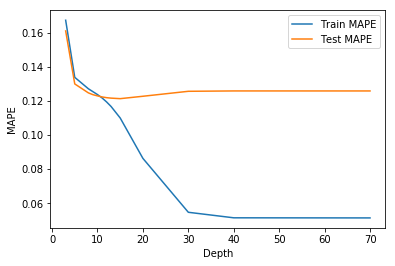

In [134]:
%matplotlib inline
train_errors = []
test_errors = []
depths = [3,5,8,9,10,11,12,13,15,20,30,40,70]
for depth in depths:
    rf_reg = RandomForestRegressor(max_depth=depth,random_state=25,n_jobs=-1)
    rf_reg.fit(df_train_new, tsne_train_output)
    y_pred = rf_reg.predict(df_test_new)
    rndf_test_predictions = [round(value) for value in y_pred]
    y_pred = rf_reg.predict(df_train_new)
    rndf_train_predictions = [round(value) for value in y_pred]
    train_err = MAPE(tsne_train_output,rndf_train_predictions)
    test_err = MAPE(tsne_test_output, rndf_test_predictions)
    train_errors.append(train_err)
    test_errors.append(test_err)
    print('Depth = ',depth)
    print('Train MAPE = ',train_err,'Test MAPE = ',test_err)
    print('---')
plt.figure()
plt.plot(depths,train_errors,label='Train MAPE')
plt.plot(depths,test_errors,label='Test MAPE')
plt.xlabel('Depth')
plt.ylabel('MAPE')
plt.legend()

Estimators =  5
Train MAPE =  0.12209731812359606 Test MAPE =  0.12268702047868983
---
Estimators =  10
Train MAPE =  0.12175710887805043 Test MAPE =  0.12232815600044344
---
Estimators =  20
Train MAPE =  0.1215116684051294 Test MAPE =  0.12206467015050326
---
Estimators =  30
Train MAPE =  0.12141428195573288 Test MAPE =  0.12200446119676285
---
Estimators =  40
Train MAPE =  0.12139547017689728 Test MAPE =  0.12194597249884359
---
Estimators =  50
Train MAPE =  0.1213654334451244 Test MAPE =  0.12190191483586849
---
Estimators =  60
Train MAPE =  0.12134577868563344 Test MAPE =  0.12188280088230008
---
Estimators =  70
Train MAPE =  0.12133131491228344 Test MAPE =  0.12189417368467326
---
Estimators =  80
Train MAPE =  0.12133113744267178 Test MAPE =  0.12186129768453566
---
Estimators =  120
Train MAPE =  0.12130877627160305 Test MAPE =  0.12182278306809535
---
Estimators =  150
Train MAPE =  0.12128903277730627 Test MAPE =  0.12183558941698618
---
Estimators =  200
Train MAPE =  0

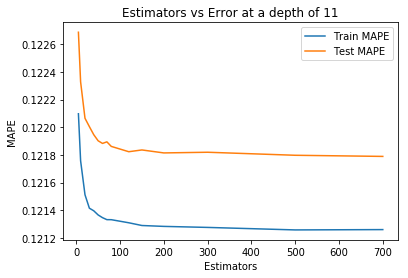

In [135]:
train_errors = []
test_errors = []
estimators = [5,10,20,30,40,50,60,70,80,120,150,200,300,500,700]
for i in estimators:
    rf_reg = RandomForestRegressor(n_estimators=i,max_depth=11,random_state=25,n_jobs=-1)
    rf_reg.fit(df_train_new, tsne_train_output)
    rndf_test_predictions = rf_reg.predict(df_test_new)
    rndf_train_predictions = rf_reg.predict(df_train_new)
    train_err = MAPE(tsne_train_output,rndf_train_predictions)
    test_err = MAPE(tsne_test_output, rndf_test_predictions)
    train_errors.append(train_err)
    test_errors.append(test_err)
    print('Estimators = ',i)
    print('Train MAPE = ',train_err,'Test MAPE = ',test_err)
    print('---')
plt.figure()
plt.plot(estimators,train_errors,label='Train MAPE')
plt.plot(estimators,test_errors,label='Test MAPE')
plt.xlabel('Estimators')
plt.ylabel('MAPE')
plt.title('Estimators vs Error at a depth of 11')
plt.legend()

Estimators =  5
Train MAPE =  0.11436297061058864 Test MAPE =  0.12228304707002205
---
Estimators =  10
Train MAPE =  0.11351493207128778 Test MAPE =  0.12131396962410497
---
Estimators =  20
Train MAPE =  0.1130703706940881 Test MAPE =  0.12074083772635698
---
Estimators =  30
Train MAPE =  0.11287746122621742 Test MAPE =  0.1205823830512751
---
Estimators =  40
Train MAPE =  0.1127964463484962 Test MAPE =  0.12048174808573756
---
Estimators =  50
Train MAPE =  0.11271365677465842 Test MAPE =  0.12041637836453366
---
Estimators =  60
Train MAPE =  0.1126812685705311 Test MAPE =  0.1203537801665972
---
Estimators =  70
Train MAPE =  0.11265176424759318 Test MAPE =  0.12034565673633066
---
Estimators =  80
Train MAPE =  0.11263383981681588 Test MAPE =  0.12032635164322657
---
Estimators =  120
Train MAPE =  0.11259847899669331 Test MAPE =  0.12028363195700124
---
Estimators =  150
Train MAPE =  0.11257030569584282 Test MAPE =  0.12024731544522131
---
Estimators =  200
Train MAPE =  0.11

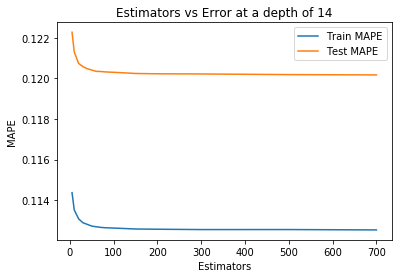

In [136]:
train_errors = []
test_errors = []
estimators = [5,10,20,30,40,50,60,70,80,120,150,200,300,500,700]
for i in estimators:
    rf_reg = RandomForestRegressor(n_estimators=i,max_depth=14,random_state=25,n_jobs=-1)
    rf_reg.fit(df_train_new, tsne_train_output)
    rndf_test_predictions = rf_reg.predict(df_test_new)
    rndf_train_predictions = rf_reg.predict(df_train_new)
    train_err = MAPE(tsne_train_output,rndf_train_predictions)
    test_err = MAPE(tsne_test_output, rndf_test_predictions)
    train_errors.append(train_err)
    test_errors.append(test_err)
    print('Estimators = ',i)
    print('Train MAPE = ',train_err,'Test MAPE = ',test_err)
    print('---')
plt.figure()
plt.plot(estimators,train_errors,label='Train MAPE')
plt.plot(estimators,test_errors,label='Test MAPE')
plt.xlabel('Estimators')
plt.ylabel('MAPE')
plt.title('Estimators vs Error at a depth of 14')
plt.legend()

In [153]:
param_dist = {"max_depth": sp_randint(8,14),
              "n_estimators":sp_randint(90,160),
              "max_features": sp_randint(3,14),
              "min_samples_split": sp_randint(2, 8),
              "min_samples_leaf": sp_randint(1, 12),
              "bootstrap": [True, False]}
model_rs_rf_new = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1), 
                                 param_distributions=param_dist,
                                 n_iter=60,scoring=mape_score,
                                 cv=cv_custom,n_jobs=-1)
model_rs_rf_new.fit(df_train_new, np.array(tsne_train_output).reshape(-1,1))

pickle.dump(model_rs_rf_new,open('model_rs_rf_new.p','wb'))

In [156]:
dict_scores = []
idx = 0
for i in model_rs_rf_new.grid_scores_:
    dict_score = []
    dict_score.append(i[0]['n_estimators'])
    dict_score.append(i[0]['max_depth'])
    dict_score.append(i[0]['max_features'])
    dict_score.append(i[0]['min_samples_leaf'])
    dict_score.append(i[0]['min_samples_split'])
    dict_score.append(i[0]['bootstrap'])
    dict_score.append(-i[1])
    dict_score.append((np.abs(i[2]).std()))
    dict_score.append(-model_rs_rf_new.cv_results_['mean_train_score'][idx])
    dict_scores.append(dict_score)
    idx = idx + 1
scores_df = pd.DataFrame(dict_scores,columns=['n_estimators','depth','max_features','min_samples_leaf',
                                               'min_samples_split','bootstrap','Test_score',
                                               'Test_std','Train_score'])

In [158]:
scores_df.sort_values('Test_score').head(15)

n_estimators  depth  max_features  min_samples_leaf  min_samples_split  \
6            107     13             8                 5                  6   
15           156     13             8                 4                  6   
39           131     13             8                11                  7   
46            96     13             7                 9                  2   
11           101     12            11                 6                  7   
50           112     12             7                 8                  2   
57           148     13             4                 5                  2   
35           137     11            12                11                  3   
34           139     13             4                 8                  7   
44           103     12             7                 6                  3   
38           129     12             6                 9                  2   
1            133     11             9                11                  5   
45           138     11            12                 8                  7   
0             97     11            11                 7                  4   
3            156     11             9                 6                  5   

    bootstrap  Test_score  Test_std  Train_score  
6        True    0.125383  0.002714     0.113323  
15       True    0.125401  0.002706     0.112598  
39      False    0.125413  0.002947     0.112946  
46       True    0.125433  0.002691     0.115951  
11       True    0.125562  0.002636     0.117205  
50      False    0.125670  0.002723     0.115739  
57      False    0.125718  0.002631     0.110677  
35       True    0.125720  0.002577     0.121396  
34      False    0.125735  0.002674     0.113055  
44      False    0.125754  0.002745     0.114898  
38       True    0.125762  0.002594     0.119046  
1        True    0.125765  0.002567     0.121588  
45       True    0.125797  0.002614     0.120847  
0        True    0.125836  0.002576     0.120742  
3        True    0.125845  0.002535     0.120583

Got good cv scores at n_estimators = 107, depth = 13, max_features = 8, min_samples_leaf = 5, min_samples_split = 6, bootstrap = True and the Test Score =0.125383, test std = 0.002714, Train score = 0.113323.

In [130]:
regr1 = RandomForestRegressor(max_features=8,min_samples_leaf=5,
                              min_samples_split=6,n_estimators=107,
                              bootstrap = True,max_depth =13,n_jobs=-1)
regr1.fit(df_train_new, tsne_train_output)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=13,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=5,
           min_samples_split=6, min_weight_fraction_leaf=0.0,
           n_estimators=107, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [131]:
rndf_test_predictions = regr1.predict(df_test_new)
rndf_train_predictions = regr1.predict(df_train_new)
print('Train MAPE for Random Forest',MAPE(tsne_train_output,rndf_train_predictions))
print('Test MAPE for Random Forest',MAPE(tsne_test_output,rndf_test_predictions))

Train MAPE for Random Forest 0.11621908091150168
Test MAPE for Random Forest 0.12085752841289196


In [132]:
regr1.feature_importances_

array([8.28583401e-04, 7.54277782e-04, 1.59839695e-02, 3.13384496e-02,
       2.76114140e-01, 4.65444360e-04, 5.36476313e-04, 2.34988906e-04,
       5.63100612e-01, 1.06142785e-01, 1.03588264e-03, 3.77136722e-04,
       3.07513427e-03, 1.21201399e-05])

### XGBoost

In [163]:
#basic xgboost without any change
xgb_reg = xgb.XGBRegressor(random_state=25,n_jobs=-1)
xgb_reg.fit(df_train_new, tsne_train_output)
xgb_test_predictions = xgb_reg.predict(df_test_new)
xgb_train_predictions = xgb_reg.predict(df_train_new)
print('Train MAPE = ',MAPE(tsne_train_output,xgb_train_predictions))
print('Test MAPE = ',MAPE(tsne_test_output, xgb_test_predictions))

Train MAPE =  0.12733697530554722
Test MAPE =  0.12393554392577667


Estimators =  10
Train MAPE =  0.35878827298553134 Test MAPE =  0.3578414994514295
---
Estimators =  50
Train MAPE =  0.1297407568280324 Test MAPE =  0.12585162220123933
---
Estimators =  100
Train MAPE =  0.12733697530554722 Test MAPE =  0.12393554392577667
---
Estimators =  150
Train MAPE =  0.12625587479873837 Test MAPE =  0.12303957735225869
---
Estimators =  200
Train MAPE =  0.12559626461961387 Test MAPE =  0.12242038082641088
---
Estimators =  300
Train MAPE =  0.12465727290433902 Test MAPE =  0.12164120050919572
---
Estimators =  500
Train MAPE =  0.12345260918041429 Test MAPE =  0.12069009017963292
---
Estimators =  700
Train MAPE =  0.12267019003002343 Test MAPE =  0.12027359713137785
---
Estimators =  1000
Train MAPE =  0.12167853420748949 Test MAPE =  0.11967322784979491
---
Estimators =  1300
Train MAPE =  0.12093356114515817 Test MAPE =  0.11926428481319933
---


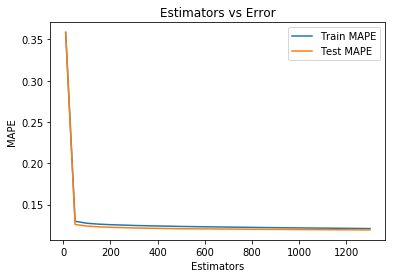

In [166]:
%matplotlib inline
train_errors = []
test_errors = []
estimators = [10,50,100,150,200,300,500,700,1000,1300]
for i in estimators:
    xgb_reg = xgb.XGBRegressor(n_estimators=i,random_state=25,n_jobs=-1)
    xgb_reg.fit(df_train_new, tsne_train_output)
    xgb_test_predictions = xgb_reg.predict(df_test_new)
    xgb_train_predictions = xgb_reg.predict(df_train_new)
    train_err = MAPE(tsne_train_output,xgb_train_predictions)
    test_err = MAPE(tsne_test_output, xgb_test_predictions)
    train_errors.append(train_err)
    test_errors.append(test_err)
    print('Estimators = ',i)
    print('Train MAPE = ',train_err,'Test MAPE = ',test_err)
    print('---')
plt.figure()
plt.plot(estimators,train_errors,label='Train MAPE')
plt.plot(estimators,test_errors,label='Test MAPE')
plt.xlabel('Estimators')
plt.ylabel('MAPE')
plt.title('Estimators vs Error')
plt.legend()

learning rate =  0.1
Train MAPE =  0.12122172742708551 Test MAPE =  0.11945580662795453
---
learning rate =  0.2
Train MAPE =  0.11912869519461096 Test MAPE =  0.1188641341952452
---
learning rate =  0.3
Train MAPE =  0.11765538684604113 Test MAPE =  0.11881367335782467
---
learning rate =  0.4
Train MAPE =  0.11643071342340212 Test MAPE =  0.11915629097553795
---
learning rate =  0.5
Train MAPE =  0.11554269985407563 Test MAPE =  0.11944720534884876
---
learning rate =  0.6
Train MAPE =  0.11489169695111645 Test MAPE =  0.11986971929247789
---
learning rate =  0.7
Train MAPE =  0.11422747256208886 Test MAPE =  0.12022657680559962
---


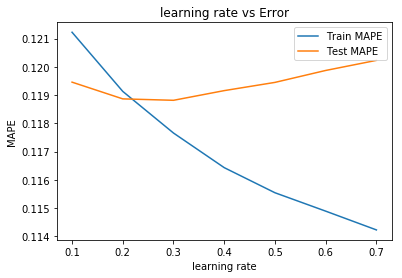

In [167]:
%matplotlib inline
train_errors = []
test_errors = []
learning_rates = [0.1,0.2,0.3,0.4,0.5,0.6,0.7]
for i in learning_rates:
    xgb_reg = xgb.XGBRegressor(n_estimators=1200,max_depth=3,learning_rate=i,random_state=25,n_jobs=-1)
    xgb_reg.fit(df_train_new, tsne_train_output)
    xgb_test_predictions = xgb_reg.predict(df_test_new)
    xgb_train_predictions = xgb_reg.predict(df_train_new)
    train_err = MAPE(tsne_train_output,xgb_train_predictions)
    test_err = MAPE(tsne_test_output, xgb_test_predictions)
    train_errors.append(train_err)
    test_errors.append(test_err)
    print('learning rate = ',i)
    print('Train MAPE = ',train_err,'Test MAPE = ',test_err)
    print('---')
plt.figure()
plt.plot(learning_rates,train_errors,label='Train MAPE')
plt.plot(learning_rates,test_errors,label='Test MAPE')
plt.xlabel('learning rate')
plt.ylabel('MAPE')
plt.title('learning rate vs Error')
plt.legend()

In [169]:
%matplotlib inline
train_errors = []
test_errors = []
depths = [3,5,8,9]
for i in depths:
    xgb_reg = xgb.XGBRegressor(n_estimators=1200,max_depth=i,learning_rate=0.25,random_state=25,n_jobs=-1)
    xgb_reg.fit(df_train_new, tsne_train_output)
    xgb_test_predictions = xgb_reg.predict(df_test_new)
    xgb_train_predictions = xgb_reg.predict(df_train_new)
    train_err = MAPE(tsne_train_output,xgb_train_predictions)
    test_err = MAPE(tsne_test_output, xgb_test_predictions)
    train_errors.append(train_err)
    test_errors.append(test_err)
    print('depth = ',i)
    print('Train MAPE = ',train_err,'Test MAPE = ',test_err)
    print('---')
plt.figure()
plt.plot(depths,train_errors,label='Train MAPE')
plt.plot(depths,test_errors,label='Test MAPE')
plt.xlabel('depth')
plt.ylabel('MAPE')
plt.title('Depth vs Error')
plt.legend()

depth =  3
Train MAPE =  0.11833766876805478 Test MAPE =  0.11877028468322443
---
depth =  5
Train MAPE =  0.10318841904302174 Test MAPE =  0.11799234677299121
---
depth =  8
Train MAPE =  0.057591772863742834 Test MAPE =  0.12136318805454355
---
depth =  9
Train MAPE =  0.03852625685088161 Test MAPE =  0.12243815680322949
---


In [171]:
%matplotlib inline
train_errors = []
test_errors = []
alphas = [0.5,1,10,20,50,100,150,250,350]
for i in alphas:
    xgb_reg = xgb.XGBRegressor(n_estimators=1200,max_depth=3,learning_rate=0.25,reg_alpha=i,random_state=25,n_jobs=-1)
    xgb_reg.fit(df_train_new, tsne_train_output)
    xgb_test_predictions = xgb_reg.predict(df_test_new)
    xgb_train_predictions = xgb_reg.predict(df_train_new)
    train_err = MAPE(tsne_train_output,xgb_train_predictions)
    test_err = MAPE(tsne_test_output, xgb_test_predictions)
    train_errors.append(train_err)
    test_errors.append(test_err)
    print('alpha = ',i)
    print('Train MAPE = ',train_err,'Test MAPE = ',test_err)
    print('---')
plt.figure()
plt.plot(alphas,train_errors,label='Train MAPE')
plt.plot(alphas,test_errors,label='Test MAPE')
plt.xlabel('reg alpha')
plt.ylabel('MAPE')
plt.title('reg alpha vs Error')
plt.legend()

alpha =  0.5
Train MAPE =  0.11831087085669463 Test MAPE =  0.11870768648528798
---
alpha =  1
Train MAPE =  0.11831748159972884 Test MAPE =  0.11892443871875345
---
alpha =  10
Train MAPE =  0.11830585734016533 Test MAPE =  0.11889691462561498
---
alpha =  20
Train MAPE =  0.11823393778004151 Test MAPE =  0.1187056795201633
---
alpha =  50
Train MAPE =  0.11850307044611869 Test MAPE =  0.11860858063603591
---
alpha =  100
Train MAPE =  0.11857884997029602 Test MAPE =  0.11846016078657741
---
alpha =  150
Train MAPE =  0.11878644504853128 Test MAPE =  0.11832273146042073
---
alpha =  250
Train MAPE =  0.119036189159535 Test MAPE =  0.11823929905309473
---
alpha =  350
Train MAPE =  0.11932400050223901 Test MAPE =  0.11821789142509814
---


In [101]:
param_dist = {"max_depth": sp_randint(2,5),
              "learning_rate":uniform(0,0.4),
              "n_estimators":sp_randint(500,1500),
              "min_child_weight": sp_randint(2, 8),
              "gamma": uniform(0,4),
              "subsample":uniform(0.8,0.2),
              "colsample_bytree": uniform(0.7,0.3),
              "reg_alpha":uniform(50,300),
              "reg_lambda":uniform(50,300)}
model_rs_xgb_new = RandomizedSearchCV(xgb.XGBRegressor(n_jobs=-1,random_state=25), param_distributions=param_dist,
                                   n_iter=60,scoring=mape_score,cv=cv_cus,n_jobs=-1,)
model_rs_xgb_new.fit(df_train_new, np.array(tsne_train_output).reshape(-1,1))

pickle.dump(model_rs_xgb_new,open('model_rs_xgb_new.p','wb'))

In [104]:
dict_scores = []
idx = 0
for i in model_rs_xgb_new.grid_scores_:
    dict_score = []
    dict_score.append(i[0]['n_estimators'])
    dict_score.append(i[0]['max_depth'])
    dict_score.append(i[0]['subsample'])
    dict_score.append(i[0]['min_child_weight'])
    dict_score.append(i[0]['learning_rate'])
    dict_score.append(i[0]['reg_alpha'])
    dict_score.append(i[0]['reg_lambda'])
    dict_score.append(i[0]['gamma'])
    dict_score.append(i[0]['colsample_bytree'])
    dict_score.append(-i[1])
    dict_score.append((np.abs(i[2]).std()))
    dict_score.append(-model_rs_xgb_new.cv_results_['mean_train_score'][idx])
    dict_scores.append(dict_score)
    idx = idx + 1
scores_df1 = pd.DataFrame(dict_scores,columns=['n_estimators','depth','subsample','min_child_weight',
                                               'learning_rate','reg_alpha','reg_lambda','gamma',
                                              'colsample_bytree','Test_score',
                                               'Test_std','Train_score'])

In [106]:
scores_df1.sort_values('Test_score').head(15)

n_estimators  depth  subsample  min_child_weight  learning_rate  \
6           1316      4   0.842178                 4       0.057302   
31           774      4   0.895843                 3       0.072612   
41           963      4   0.958552                 7       0.053748   
44          1259      4   0.914763                 4       0.090186   
25          1057      4   0.893215                 2       0.089675   
12          1338      4   0.850788                 4       0.106222   
35          1205      4   0.893485                 3       0.103720   
40           976      4   0.991355                 2       0.099804   
2           1139      3   0.931902                 3       0.079522   
45          1172      3   0.962525                 4       0.065034   
18          1486      3   0.938193                 4       0.071167   
28          1272      4   0.815958                 2       0.109780   
23           883      3   0.871986                 6       0.081953   
43          1315      4   0.836418                 7       0.134539   
32          1064      3   0.820826                 6       0.156207   

     reg_alpha  reg_lambda     gamma  colsample_bytree  Test_score  Test_std  \
6   273.050386   84.261124  3.683958          0.861056    0.124538  0.004169   
31  266.242736  163.834405  0.772127          0.705739    0.124626  0.003585   
41  138.866715  344.123186  1.755301          0.945922    0.124819  0.003734   
44  190.422001  128.879774  2.219924          0.861579    0.124878  0.004657   
25  336.481407  315.245742  3.830071          0.748091    0.124890  0.004723   
12  341.693610  190.218137  2.600864          0.782034    0.124910  0.004503   
35  341.470386  238.515595  1.460080          0.820331    0.124912  0.004818   
40   73.057919  344.787223  0.444643          0.783801    0.125070  0.004933   
2   337.335268  195.960869  1.365512          0.881720    0.125224  0.003258   
45  308.163289  207.963717  0.688847          0.933498    0.125276  0.003097   
18  140.522831  313.159977  0.796910          0.958962    0.125427  0.003519   
28  170.124582  287.404926  1.091602          0.719427    0.125470  0.005322   
23  234.482717  111.506303  2.754981          0.776214    0.125471  0.002968   
43  161.557205  211.436723  3.210371          0.868878    0.125535  0.004980   
32  295.609720  275.285258  0.676589          0.894995    0.125585  0.003661   

    Train_score  
6      0.120288  
31     0.122253  
41     0.123021  
44     0.118398  
25     0.120825  
12     0.118775  
35     0.119306  
40     0.120578  
2      0.123742  
45     0.124263  
18     0.123556  
28     0.119124  
23     0.124578  
43     0.117183  
32     0.122656

In [142]:
param_dist = {"max_depth": sp_randint(2,5),
              "learning_rate":uniform(0.2,0.4),
              "n_estimators":sp_randint(900,1600),
              "min_child_weight": sp_randint(2, 8),
              "gamma": uniform(0,4),
              "subsample":uniform(0.8,0.2),
              "colsample_bytree": uniform(0.8,0.2),
              "reg_alpha":uniform(50,300),
              "reg_lambda":uniform(50,300)}
model_rs_xgb_new1 = RandomizedSearchCV(xgb.XGBRegressor(n_jobs=-1,random_state=25), param_distributions=param_dist,
                                   n_iter=60,scoring=mape_score,cv=cv_custom,n_jobs=-1,)
model_rs_xgb_new1.fit(df_train_new, np.array(tsne_train_output).reshape(-1,1))

pickle.dump(model_rs_xgb_new1,open('model_rs_xgb_new1.p','wb'))

In [144]:
dict_scores = []
idx = 0
for i in model_rs_xgb_new1.grid_scores_:
    dict_score = []
    dict_score.append(i[0]['n_estimators'])
    dict_score.append(i[0]['max_depth'])
    dict_score.append(i[0]['subsample'])
    dict_score.append(i[0]['min_child_weight'])
    dict_score.append(i[0]['learning_rate'])
    dict_score.append(i[0]['reg_alpha'])
    dict_score.append(i[0]['reg_lambda'])
    dict_score.append(i[0]['gamma'])
    dict_score.append(i[0]['colsample_bytree'])
    dict_score.append(-i[1])
    dict_score.append((np.abs(i[2]).std()))
    dict_score.append(-model_rs_xgb_new1.cv_results_['mean_train_score'][idx])
    dict_scores.append(dict_score)
    idx = idx + 1
scores_df1 = pd.DataFrame(dict_scores,columns=['n_estimators','depth','subsample','min_child_weight',
                                               'learning_rate','reg_alpha','reg_lambda','gamma',
                                              'colsample_bytree','Test_score',
                                               'Test_std','Train_score'])

In [146]:
scores_df1.sort_values('Test_score').head()

n_estimators  depth  subsample  min_child_weight  learning_rate  \
13          1293      3   0.935721                 6       0.238606   
10           964      3   0.823203                 4       0.288716   
1            936      4   0.857527                 2       0.267529   
28           949      3   0.913689                 6       0.351802   
22          1142      3   0.943972                 5       0.276006   

     reg_alpha  reg_lambda     gamma  colsample_bytree  Test_score  Test_std  \
13  131.101072  125.089120  3.486901          0.897799    0.126437  0.004755   
10  197.908653  212.185805  0.614218          0.879060    0.126532  0.004807   
1   324.277975  257.261088  0.187194          0.911496    0.126618  0.006069   
28  204.852790  185.866971  1.214635          0.846680    0.126661  0.005094   
22  171.311130  103.686593  3.467762          0.948933    0.126750  0.005086   

    Train_score  
13     0.118760  
10     0.120626  
1      0.116400  
28     0.119369  
22     0.118513

i tried with some models which i got best above with anoter grid search

In [169]:
param_dist = {"learning_rate":uniform(0,0.2),
              "n_estimators":sp_randint(1250,1400),
              "gamma": uniform(1,5),
              "subsample":uniform(0.8,0.2),
              "colsample_bytree": uniform(0.8,0.2),
              "reg_alpha":uniform(60,300),
              "reg_lambda":uniform(60,300)}
model_rs_xgb_new = RandomizedSearchCV(xgb.XGBRegressor(max_depth=4,min_child_weight=4,n_jobs=-1,random_state=25), 
                                      param_distributions=param_dist,
                                   n_iter=50,scoring=mape_score,cv=cv_custom,n_jobs=-1,)
model_rs_xgb_new.fit(df_train_new, np.array(tsne_train_output).reshape(-1,1))

pickle.dump(model_rs_xgb_new,open('model_rs_xgb_new2.p','wb'))

In [172]:
dict_scores = []
idx = 0
for i in model_rs_xgb_new.grid_scores_:
    dict_score = []
    dict_score.append(i[0]['n_estimators'])
    dict_score.append(i[0]['subsample'])
    dict_score.append(i[0]['learning_rate'])
    dict_score.append(i[0]['reg_alpha'])
    dict_score.append(i[0]['reg_lambda'])
    dict_score.append(i[0]['gamma'])
    dict_score.append(i[0]['colsample_bytree'])
    dict_score.append(-i[1])
    dict_score.append((np.abs(i[2]).std()))
    dict_score.append(-model_rs_xgb_new.cv_results_['mean_train_score'][idx])
    dict_scores.append(dict_score)
    idx = idx + 1
scores_df = pd.DataFrame(dict_scores,columns=['n_estimators','subsample',
                                               'learning_rate','reg_alpha','reg_lambda','gamma',
                                               'colsample_bytree','Test_score',
                                               'Test_std','Train_score'])

In [179]:
scores_df.sort_values('Test_score').head(15)

n_estimators  subsample  learning_rate   reg_alpha  reg_lambda     gamma  \
44          1386   0.949161       0.040684  195.885297  116.788343  2.753796   
48          1322   0.917723       0.039795  130.175836   65.360413  1.659372   
2           1338   0.850493       0.051658  265.886586  119.270517  5.567378   
13          1353   0.820879       0.054719  150.610498  223.669957  2.910631   
29          1380   0.977296       0.085404  231.868072  202.971487  5.506059   
46          1373   0.898217       0.052024  326.747005  240.010386  5.060630   
6           1323   0.844394       0.040253  192.627763  221.719652  3.028794   
17          1286   0.991152       0.102631  289.538655  180.378760  3.748313   
18          1250   0.855049       0.089251  288.767520  269.148419  5.049806   
3           1279   0.957445       0.083952  244.565312   65.617164  4.692559   
34          1344   0.814841       0.025335  162.525218  185.955949  5.438559   
23          1379   0.895193       0.050555  162.494825  324.540639  4.785130   
1           1293   0.868781       0.086114   78.769599   91.868768  4.717780   
40          1289   0.812960       0.127935  342.008892  187.546503  5.845458   
35          1318   0.820046       0.085085  154.072737  359.612608  5.649383   

    colsample_bytree  Test_score  Test_std  Train_score  
44          0.821209    0.124367  0.003538     0.121500  
48          0.842337    0.124441  0.003454     0.121353  
2           0.891632    0.124447  0.003811     0.120904  
13          0.835675    0.124562  0.003627     0.121400  
29          0.838655    0.124587  0.004547     0.118759  
46          0.930818    0.124598  0.004083     0.121298  
6           0.967625    0.124603  0.003495     0.122479  
17          0.837826    0.124671  0.004747     0.118171  
18          0.896539    0.124746  0.004338     0.119837  
3           0.969939    0.124864  0.004773     0.117890  
34          0.999185    0.124913  0.003275     0.124100  
23          0.955013    0.124928  0.004529     0.121733  
1           0.974852    0.124987  0.004404     0.117950  
40          0.856565    0.125013  0.004469     0.118192  
35          0.925100    0.125017  0.004514     0.120233

In [133]:
regr_xgb = xgb.XGBRegressor(
 learning_rate = 0.040684,
 n_estimators=1386,
 max_depth=4,
 min_child_weight=4,
 gamma=2.753796,
 subsample=0.949161,
 reg_alpha=195.885297, reg_lambda=116.788343,
 colsample_bytree=0.821209,njobs=-1,random_state=25)
regr_xgb.fit(df_train_new, tsne_train_output)

xgb_test_predictions = regr_xgb.predict(df_test_new)
xgb_train_predictions = regr_xgb.predict(df_train_new)
print('Train MAPE for Random Forest',MAPE(tsne_train_output,xgb_train_predictions))
print('Test MAPE for Random Forest',MAPE(tsne_test_output,xgb_test_predictions))

Train MAPE for Random Forest 0.11862352794503056
Test MAPE for Random Forest 0.11776966921391954


In [134]:
print(df_train_new.columns)
regr_xgb.feature_importances_

Index(['ft_5', 'ft_4', 'ft_3', 'ft_2', 'ft_1', 'lat', 'lon', 'weekday',
       'exp_avg', 'roll_mean', 'roll_variance', 'temp', 'hour', 'rain'],
      dtype='object')


array([0.08062341, 0.07103252, 0.07238124, 0.08247165, 0.09880614,
       0.06773565, 0.07083271, 0.0333683 , 0.05954343, 0.06583746,
       0.10899645, 0.04605625, 0.1392677 , 0.00304711], dtype=float32)

### Error Metric:

In [136]:
print ("Error Metric Matrix (Tree Based Regression Methods With Extra Weather Features) -  MAPE")
print ("--------------------------------------------------------------------------------------------------------")
print ("XGBoost Regression -                   Train: ",MAPE(tsne_train_output,xgb_train_predictions),"     Test: ",MAPE(tsne_test_output,xgb_test_predictions))
print ("Random Forest Regression -             Train: ",MAPE(tsne_train_output,rndf_train_predictions),"      Test: ",MAPE(tsne_test_output,rndf_test_predictions))
print ("--------------------------------------------------------------------------------------------------------")

Error Metric Matrix (Tree Based Regression Methods With Extra Weather Features) -  MAPE
--------------------------------------------------------------------------------------------------------
XGBoost Regression -                   Train:  0.11862352794503056      Test:  0.11776966921391954
Random Forest Regression -             Train:  0.11621908091150168       Test:  0.12085752841289196
--------------------------------------------------------------------------------------------------------
